# Предсказание успешности стартапов.

Прогнозирование закрытия стартапов является актуальной задачей в современной экономике, где инновации и предпринимательство играют ключевую роль. Успех стартапа зависит от множества факторов, таких как финансирование, команда, продукт, рынок и внешние условия. Разработка эффективных моделей прогнозирования может помочь снизить риски инвестиций и повысить шансы на успех новых предприятий.

Целью данного исследования является построение модели машинного обучения, способной прогнозировать закрытие стартапов с высокой точностью. В рамках исследования будут идентифицированы ключевые факторы, влияющие на успех или провал стартапов, а также проанализирована эффективность модели на различных временных периодах и для разных категорий стартапов.

Результаты исследования могут быть использованы инвесторами для принятия более обоснованных решений о финансировании стартапов, а также предпринимателями для оценки рисков и повышения шансов на успех. В конечном итоге, это может способствовать развитию инновационной экосистемы за счёт снижения уровня неудачных проектов.

**Вопрос:**
- Прогнозирование закрытия стартапов является важной задачей для инвесторов, предпринимателей и исследователей.
- Существует множество факторов, влияющих на успех или провал стартапа, включая финансирование, команду, продукт, рынок и внешние условия.
- Разработка эффективных моделей прогнозирования может помочь снизить риски инвестиций и повысить шансы на успех новых предприятий.


**Цель исследования:**
- Построить модель машинного обучения, способную прогнозировать закрытие стартапов с высокой точностью.
- Идентифицировать ключевые факторы, влияющие на успех или провал стартапов.
- Проанализировать эффективность модели на различных временных периодах и для разных категорий стартапов.


**Бизнес-задача:**
- Помочь инвесторам принимать более обоснованные решения о финансировании стартапов.
- Предоставить предпринимателям инструменты для оценки рисков и повышения шансов на успех.
- Способствовать развитию инновационной экосистемы за счёт снижения уровня неудачных проектов.

**Описание исходных данных:**

Датасет состоит из двух файлов: тренировочный набор (около 53к записей) и тестовый набор (около 13к записей). Тренировочный набор содержит целевой признак status, указывающий на то, закрылся стартап или продолжает действовать. Временной период - '1970-01-01' по '2018-01-01'. Дата формирования выгрузки - '2018-01-01'

- kaggle_startups_train_01.csv - информация о (53 000) стартапах, которые будут использоваться в качестве обучающих данных.
- kaggle_startups_test_01.csv - информация о (13 000) стартапах, которые будут использоваться в качестве тестовых данных. Задача - предсказать значение 'status' для каждого стартапа из этого датасета.

Столбцы датасета:
- name - Название стартапа, идентификатор в тестовом наборе.
- category_list - Список категорий, к которым относится стартап
- funding_total_usd - Общая сумма финансирования в USD
- <span style="color: orange;">status - Статус стартапа (закрыт или действующий) - Целевой признак</span>
- country_code - Код страны
- state_code - Код штата
- region - Регион
- city - Город
- funding_rounds - Количество раундов финансирования
- founded_at - Дата основания
- first_funding_at - Дата первого раунда финансирования
- last_funding_at - Дата последнего раунда финансирования
- closed_at - Дата закрытия стартапа (если применимо)


# Загрузка и обзор данных

## Импорты

In [1]:
# pip install -r requirements.txt

In [3]:
import pandas as pd
import numpy as np
import skimpy

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import f1_score
from sklearn.metrics import ConfusionMatrixDisplay,classification_report
from pycaret.classification import *

import chime
chime.theme('mario')
%load_ext chime

plt.style.use('dark_background')

## Загрузка данных

In [4]:
date_columns = ['founded_at', 'first_funding_at', 'last_funding_at', 'closed_at']
df = pd.read_csv('kaggle_startups_train_01.csv', parse_dates=date_columns)
X_test = pd.read_csv('kaggle_startups_test_01.csv', parse_dates=date_columns)
y_test = pd.read_csv('kaggle_startups_ground_truth_01.csv')

df.head()

name                          category_list  \
0               Lunchgate        Online Reservations|Restaurants   
1                 EarLens  Manufacturing|Medical|Medical Devices   
2  Reviva Pharmaceuticals                          Biotechnology   
3    Sancilio and Company                            Health Care   
4     WireTough Cylinders                          Manufacturing   

   funding_total_usd     status country_code state_code       region  \
0           828626.0  operating          CHE         25       Zurich   
1         42935019.0  operating          USA         CA  SF Bay Area   
2         35456381.0  operating          USA         CA  SF Bay Area   
3         22250000.0  operating          NaN        NaN          NaN   
4                NaN  operating          USA         VA   VA - Other   

           city  funding_rounds founded_at first_funding_at last_funding_at  \
0        Zürich               2 2010-04-15       2011-05-01      2014-12-01   
1  Redwood City               4 2005-01-01       2010-05-04      2014-02-25   
2      San Jose               3 2006-01-01       2012-08-20      2014-07-02   
3           NaN               3 2004-01-01       2011-09-01      2014-07-18   
4       Bristol               1 2011-03-05       2012-02-01      2012-02-01   

  closed_at  
0       NaT  
1       NaT  
2       NaT  
3       NaT  
4       NaT

In [5]:
target = 'status'
target_values = df[target].unique()
target_values

array(['operating', 'closed'], dtype=object)

## Обзор данных

### skimpy и info

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52879 entries, 0 to 52878
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   name               52878 non-null  object        
 1   category_list      50374 non-null  object        
 2   funding_total_usd  42753 non-null  float64       
 3   status             52879 non-null  object        
 4   country_code       47351 non-null  object        
 5   state_code         46082 non-null  object        
 6   region             46489 non-null  object        
 7   city               46489 non-null  object        
 8   funding_rounds     52879 non-null  int64         
 9   founded_at         52879 non-null  datetime64[ns]
 10  first_funding_at   52858 non-null  datetime64[ns]
 11  last_funding_at    52879 non-null  datetime64[ns]
 12  closed_at          4962 non-null   datetime64[ns]
dtypes: datetime64[ns](4), float64(1), int64(1), object(7)
memory 

In [7]:
(df[target] == 'closed').sum() == (~df['closed_at'].isna()*1).sum()

True

In [8]:
skimpy.skim(df)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 52879  │ │ string      │ 7     │                                                          │
│ │ Number of columns │ 13     │ │ datetime64  │ 4     │                                                          │
│ └───────────────────┴────────┘ │ float64     │ 1     │                                                          │
│                                │ int32       │ 1     │                                                          │
│                                └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━┳━━━━━━━┳━━━━━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━━┳━━━━┳━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━━━━┳━━━━━━━━┓  │
│ ┃ column_name  ┃ NA    ┃ NA %         ┃ mean     ┃ sd        ┃ p0 ┃ p25    ┃ p75      ┃ p100        ┃ hist   ┃  │
│ ┡━━━━━━━━━━━━━━╇━━━━━━━╇━━━━━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━━╇━━━━╇━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━━━━╇━━━━━━━━┩  │
│ │ funding_tota │ 10126 │ 19.149378770 │ 19000000 │ 210000000 │  1 │ 340000 │ 10000000 │ 30000000000 │   █    │  │
│ │ l_usd        │       │       400347 │          │           │    │        │          │             │        │  │
│ │ funding_roun │     0 │            0 │      1.7 │       1.4 │  1 │      1 │        2 │          19 │   █▁   │  │
│ │ ds           │       │              │          │           │    │        │          │             │        │  │
│ └──────────────┴───────┴──────────────┴──────────┴───────────┴────┴────────┴──────────┴─────────────┴────────┘  │
│                                                    datetime                                                     │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━┓  │
│ ┃ column_name           ┃ NA      ┃ NA %                      ┃ first          ┃ last          ┃ frequency   ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━┩  │
│ │ founded_at            │       0 │                         0 │   1749-01-01   │  2105-02-17   │ None        │  │
│ │ first_funding_at      │      21 │       0.03971330774031279 │   1960-01-01   │  2015-12-05   │ None        │  │
│ │ last_funding_at       │       0 │                         0 │   1971-01-01   │  2115-12-01   │ None        │  │
│ │ closed_at             │   47917 │          90.6163127139318 │   1972-12-19   │  2107-02-08   │ None        │  │
│ └───────────────────────┴─────────┴───────────────────────────┴────────────────┴───────────────┴─────────────┘  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name          ┃ NA      ┃ NA %                            ┃ words per row        ┃ total words      ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━┩  │
│ │ name                 │       1 │            0.001891109892395847 │                  1.6 │            85317 │  │
│ │ category_list        │    2505 │               4.737230280451597 │                  1.6 │            85317 │  │
│ │ status               │       0 │                    

Промежуточные выводы первичного обзора:
- **1.** Имеются во всех колонках кроме <span style="color: orange;">status (целевой признак), last_funding_at (последняя дата финансирования) и founded_at (дата основания)</span>, в колонке name только 1 пропуск.
- **2.** В <span style="color: orange;">closed_at</span>  90.62 % пропусков столько же солько и закрытых стартапов - если стартап функционируют, то будет стоять пропуск. При обучении модели этот признак нужно будет удалить, предварительно использовав для генерации новых полезных признаков (к примеру lifetime).
- **3.** В остальных колонках пропуски составляют от 4.74 до 19.15 %, причём к признаках с информацией об регионе-городе-области количество пропусков схоже, в признаках страны немного меньше пропусков.
- **4** В признаках <span style="color: orange;">founded_at, last_funding_at и closed_at</span> есть странные последние даты 2105-02-17, 2115-12-01, 2106-07-20. Вероятно такие случаи являются опечатками и нужно просто вычесть 100 лет из дат относящихся к 22-му веку. 
- **5.** В колонке <span style="color: orange;">founded_at</span> есть странная дата "1749-01-01", это может сотвествовать дате основания какой-нибудь крупной компании, но не похоже на стратап. Полазив в поиске нашёл только пивоваренную компанию Scottish & Newcastle, которая с 25 января 2008 года была приобретена компаниями Carlsberg и Heineken. Посмотрю потом в данных, может это про неё. :)
А так известно что минимальная дата в датасете будет - 1980-01-01.
- **6.** В числовом признаке <span style="color: orange;">funding_total_usd</span> (общая сумма финансирования) есть 19.15% пропусков, нужно будет изучить с чем это может быть связано и найти оптимальный способ восполнения. На этот признак я обращу особое внимание, потому что он может иметь большое значение для предсказания модели. Возможно потребуется создать категориальный столбец funding_total_usd_is_not_na указав под 0 там где был пропуск и 1 там где нет.

## EDA - Визуализация и первичная предобработка.

### Числовые признаки

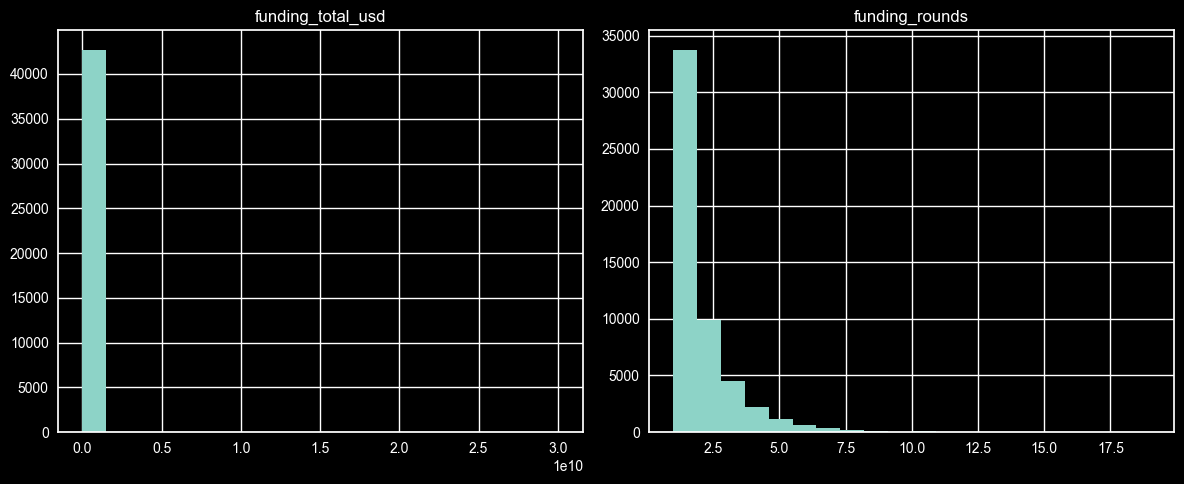

In [9]:
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns

df[numeric_columns].hist(bins=20, figsize=(12, 5))
plt.tight_layout()
plt.show()

Видно жирнохвостовое распределение в обоих признаках. Оба графика пока соотвествуют здравому смыслу.
- **Размер финансирования** - находится в пределах 3 млрд. USD, сумма большая, но вполне реальная. Медийное значение - 2 млн. USD, среднее - 19 млн. USD
- **Количество раундов финансирования** максимально значение 19 раундов является вполне возможным. Медийное значение - 1 раунд, среднее - 1.7.

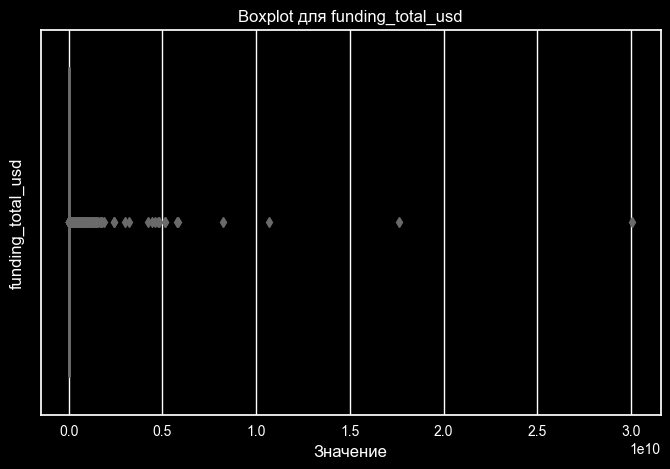

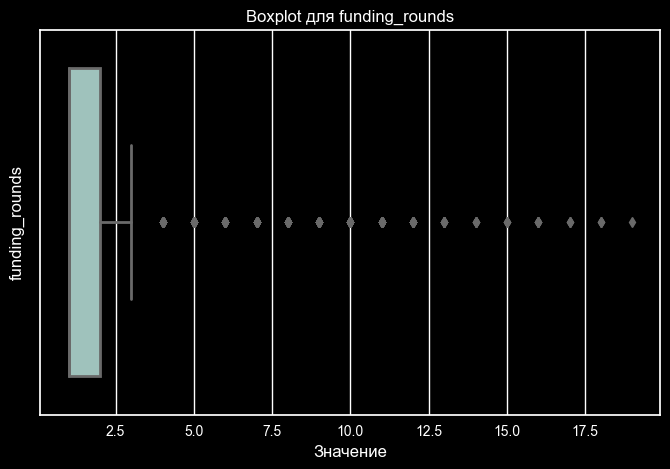

In [10]:
for column in numeric_columns:
    plt.figure(figsize=(8, 5))
    sns.boxplot(x=df[column], orient='h', linewidth=2, saturation=0.5)
    plt.title(f'Boxplot для {column}')
    plt.xlabel('Значение')
    plt.ylabel(column)
    plt.show()

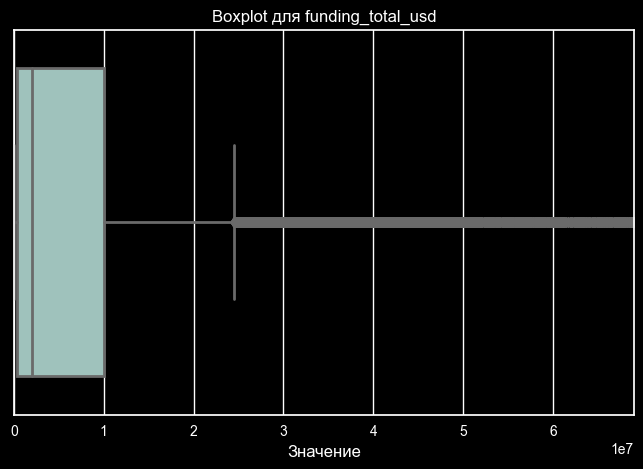

In [11]:
usd_col = numeric_columns[0]
plt.figure(figsize=(8, 5))
sns.boxplot(x=df[usd_col], orient='h', linewidth=2, saturation=0.5)
plt.title(f'Boxplot для {usd_col}')
plt.xlim(0,df[usd_col].quantile(0.95))
plt.xlabel('Значение')
plt.show()

Большинство значений общей суммы финансировнаия от 340 тыс. до 10 млн. USD.
Большинство стартапов имеют 1,2 раунда финансирования

Боксплот так же говорит о большом разбросе в числовых данных. При обучении моделей определённо нужно будет задействовать scaler.

In [12]:
rounds_group = (df[numeric_columns]
                .groupby(['funding_rounds'])['funding_total_usd']
                .agg(['mean','median','max','min','count']))
rounds_group

mean       median           max           min  count
funding_rounds                                                              
1               1.043620e+07     889386.0  1.760000e+10  1.000000e+00  24525
2               1.394991e+07    2954737.0  5.162513e+09  6.800000e+01   9156
3               2.266435e+07    7273407.0  4.240250e+09  5.000000e+03   4349
4               3.433287e+07   15000000.0  1.159803e+09  1.393300e+04   2161
5               7.680646e+07   25541542.0  3.007950e+10  9.000000e+04   1165
6               8.467591e+07   35886875.0  5.820000e+09  2.133000e+04    615
7               1.035474e+08   46670000.0  4.812000e+09  1.450000e+05    339
8               1.239461e+08   67438045.5  1.567504e+09  6.669530e+05    174
9               1.341547e+08   61600000.0  1.471000e+09  6.000000e+05    108
10              1.320792e+08   59463635.0  1.315500e+09  1.664000e+06     61
11              3.321862e+08  129821462.5  2.425700e+09  1.338750e+06     46
12              1.277473e+08   74016526.5  8.188000e+08  1.507200e+06     22
13              9.950292e+08   42027500.0  8.207450e+09  6.280622e+06      9
14              3.768629e+08  132787385.0  1.158040e+09  9.050000e+06      5
15              8.006212e+07   79209599.0  2.048921e+08  1.203266e+07      5
16              3.203274e+08   63505195.0  1.671557e+09  4.845320e+06      6
17              1.326086e+08  103662749.0  2.475458e+08  4.661711e+07      3
18              8.069141e+07   63997160.0  1.388451e+08  3.923199e+07      3
19              2.429488e+08  242948825.0  2.429488e+08  2.429488e+08      1

<Axes: xlabel='funding_rounds'>

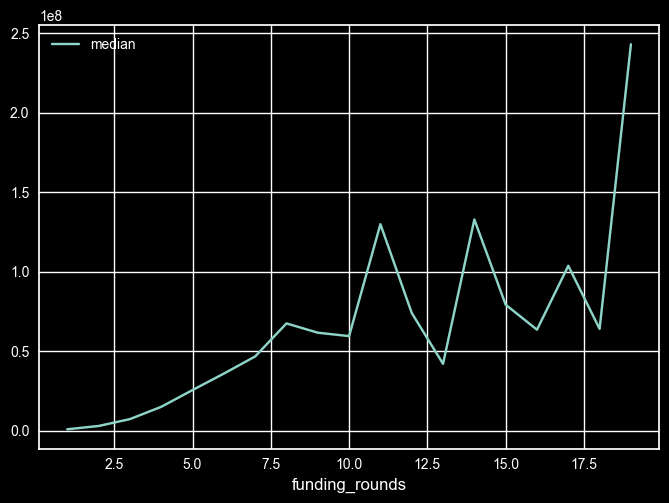

In [13]:
rounds_group[['median']].plot()

In [14]:
df[list(numeric_columns)+[target]]

funding_total_usd  funding_rounds     status
0               828626.0               2  operating
1             42935019.0               4  operating
2             35456381.0               3  operating
3             22250000.0               3  operating
4                    NaN               1  operating
...                  ...             ...        ...
52874                NaN               1  operating
52875           500000.0               1  operating
52876            50000.0               3  operating
52877         13000000.0               6  operating
52878           270820.0               1  operating

[52879 rows x 3 columns]

In [15]:
def groupby_target(df,cols_list,target='status',
                   group_cols=[],display_cols='funding_total_usd',
                   agg=['mean','median','max','min','count']):
    '''Функкция принимает на вход датафрейм, список колонок и название целевого признака'''
    return (df[cols_list+[target]]
                .groupby(group_cols)[display_cols]
                .agg(agg))

In [16]:
rounds_status_group = groupby_target(df,list(numeric_columns),group_cols=['funding_rounds']+[target])
rounds_status_group

mean       median           max  \
funding_rounds status                                               
1              closed     7.366714e+06     800000.0  9.150000e+08   
               operating  1.083612e+07     900000.0  1.760000e+10   
2              closed     1.387500e+07    2610000.0  8.705790e+08   
               operating  1.395601e+07    2999969.0  5.162513e+09   
3              closed     2.021492e+07    8592229.5  1.587000e+08   
               operating  2.279112e+07    7175000.0  4.240250e+09   
4              closed     3.387087e+07   23000000.0  3.740000e+08   
               operating  3.435458e+07   14536250.0  1.159803e+09   
5              closed     3.768301e+07   36069167.0  1.563045e+08   
               operating  7.834208e+07   25523512.0  3.007950e+10   
6              closed     4.931489e+07   22469238.5  3.658730e+08   
               operating  8.611189e+07   36962500.0  5.820000e+09   
7              closed     3.740508e+07   23138876.0  1.300035e+08   
               operating  1.053513e+08   47999920.5  4.812000e+09   
8              closed     1.871927e+08   36004847.0  1.567504e+09   
               operating  1.188392e+08   67576091.0  1.185585e+09   
9              closed     5.575902e+07   11554116.5  1.966641e+08   
               operating  1.371699e+08   63697590.5  1.471000e+09   
10             closed     5.946364e+07   59463635.0  5.946364e+07   
               operating  1.332895e+08   59723603.0  1.315500e+09   
11             closed     5.895340e+07   58953398.5  1.165680e+08   
               operating  3.446059e+08  131585890.5  2.425700e+09   
12             operating  1.277473e+08   74016526.5  8.188000e+08   
13             operating  9.950292e+08   42027500.0  8.207450e+09   
14             operating  3.768629e+08  132787385.0  1.158040e+09   
15             operating  8.006212e+07   79209599.0  2.048921e+08   
16             operating  3.203274e+08   63505195.0  1.671557e+09   
17             operating  1.326086e+08  103662749.0  2.475458e+08   
18             operating  8.069141e+07   63997160.0  1.388451e+08   
19             operating  2.429488e+08  242948825.0  2.429488e+08   

                                   min  count  
funding_rounds status                          
1              closed     2.000000e+00   2827  
               operating  1.000000e+00  21698  
2              closed     4.500000e+03    689  
               operating  6.800000e+01   8467  
3              closed     3.000000e+04    214  
               operating  5.000000e+03   4135  
4              closed     4.350000e+05     97  
               operating  1.393300e+04   2064  
5              closed     1.200000e+06     44  
               operating  9.000000e+04   1121  
6              closed     8.670000e+05     24  
               operating  2.133000e+04    591  
7              closed     4.572820e+05      9  
               operating  1.450000e+05    330  
8              closed     1.455000e+06     13  
               operating  6.669530e+05    161  
9              closed     3.263734e+06      4  
               operating  6.000000e+05    104  
10             closed     5.946364e+07      1  
               operating  1.664000e+06     60  
11             closed     1.338750e+06      2  
               operating  5.650000e+06     44  
12             operating  1.507200e+06     22  
13             operating  6.280622e+06      9  
14             operating  9.050000e+06      5  
15             operating  1.203266e+07      5  
16             operating  4.845320e+06      6  
17             operating  4.661711e+07      3  
18             operating  3.923199e+07      3  
19             operating  2.429488e+08      1

После 6го раунда финансирования количество закрытых стартапов стремиться к 0.

In [17]:
con_data = None
for t in target_values:
    d = (rounds_status_group.reset_index().set_index('funding_rounds')
     .query(f"{target} == '{t}'")[['median','count']])
    if con_data is None:
        con_data = d
        ft = f'_{t}'
    else:
        con_data = pd.merge(con_data,d,how='left',left_index=True,right_index=True,
                            suffixes=(ft, f'_{t}')).fillna(0)
con_data

median_operating  count_operating  median_closed  count_closed
funding_rounds                                                                
1                       900000.0            21698       800000.0        2827.0
2                      2999969.0             8467      2610000.0         689.0
3                      7175000.0             4135      8592229.5         214.0
4                     14536250.0             2064     23000000.0          97.0
5                     25523512.0             1121     36069167.0          44.0
6                     36962500.0              591     22469238.5          24.0
7                     47999920.5              330     23138876.0           9.0
8                     67576091.0              161     36004847.0          13.0
9                     63697590.5              104     11554116.5           4.0
10                    59723603.0               60     59463635.0           1.0
11                   131585890.5               44     58953398.5           2.0
12                    74016526.5               22            0.0           0.0
13                    42027500.0                9            0.0           0.0
14                   132787385.0                5            0.0           0.0
15                    79209599.0                5            0.0           0.0
16                    63505195.0                6            0.0           0.0
17                   103662749.0                3            0.0           0.0
18                    63997160.0                3            0.0           0.0
19                   242948825.0                1            0.0           0.0

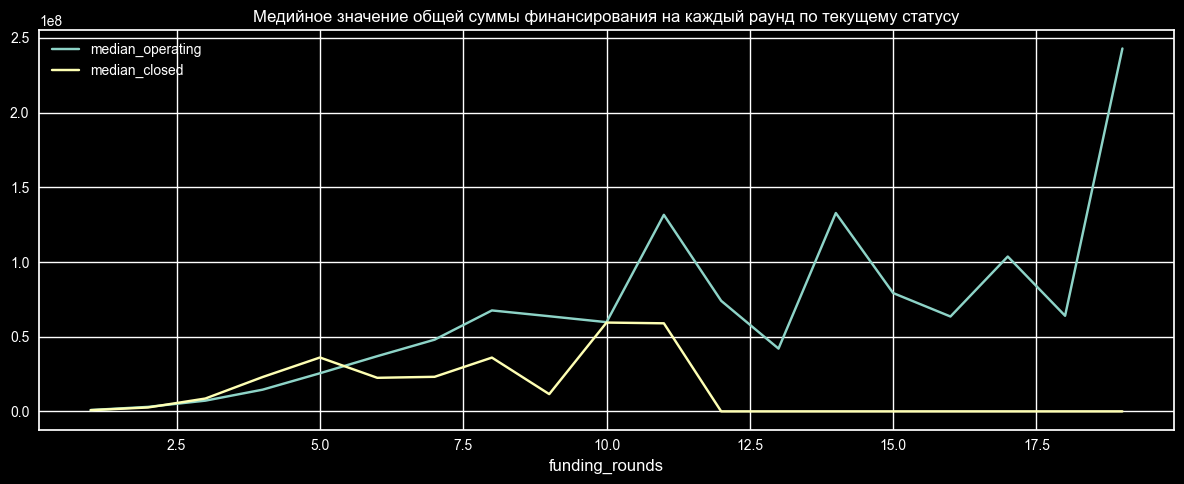

In [18]:
medians = ['median_' + v for v in target_values]
con_data[medians].plot(figsize=(12,5))
plt.title('Медийное значение общей суммы финансирования на каждый раунд по текущему статусу')
plt.tight_layout()
plt.show()

Общая сумма финансирования растёт с каждым раундом у рабочих проектов и перестаёт расти после 5го раунда у закрытых проектов.

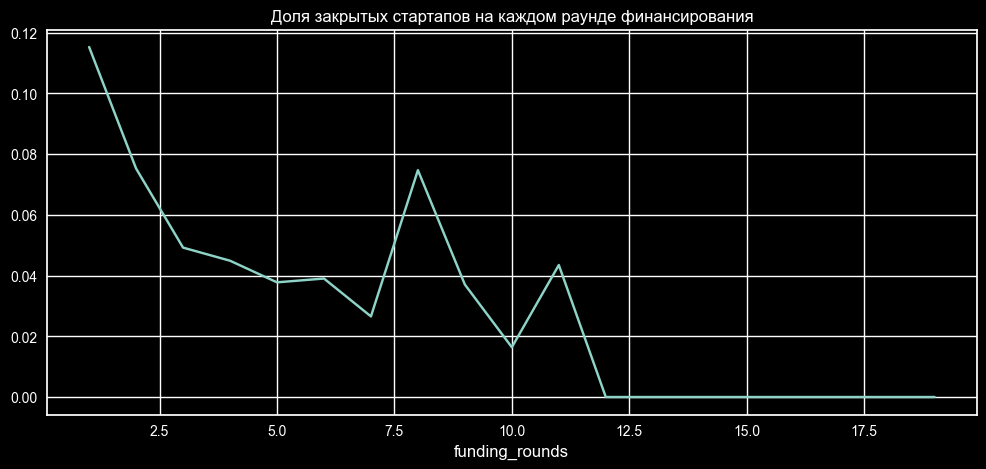

median_operating  count_operating  median_closed  \
funding_rounds                                                     
1                       900000.0            21698       800000.0   
2                      2999969.0             8467      2610000.0   
3                      7175000.0             4135      8592229.5   
4                     14536250.0             2064     23000000.0   
5                     25523512.0             1121     36069167.0   
6                     36962500.0              591     22469238.5   
7                     47999920.5              330     23138876.0   
8                     67576091.0              161     36004847.0   
9                     63697590.5              104     11554116.5   
10                    59723603.0               60     59463635.0   
11                   131585890.5               44     58953398.5   
12                    74016526.5               22            0.0   
13                    42027500.0                9            0.0   
14                   132787385.0                5            0.0   
15                    79209599.0                5            0.0   
16                    63505195.0                6            0.0   
17                   103662749.0                3            0.0   
18                    63997160.0                3            0.0   
19                   242948825.0                1            0.0   

                count_closed  closed_fraction  
funding_rounds                                 
1                     2827.0         0.115270  
2                      689.0         0.075251  
3                      214.0         0.049207  
4                       97.0         0.044887  
5                       44.0         0.037768  
6                       24.0         0.039024  
7                        9.0         0.026549  
8                       13.0         0.074713  
9                        4.0         0.037037  
10                       1.0         0.016393  
11                       2.0         0.043478  
12                       0.0         0.000000  
13                       0.0         0.000000  
14                       0.0         0.000000  
15                       0.0         0.000000  
16                       0.0         0.000000  
17                       0.0         0.000000  
18                       0.0         0.000000  
19                       0.0         0.000000

In [19]:
sum_data = None
for t in target_values:
    if sum_data is None:
        sum_data = con_data[f'count_{t}']
    else:
        sum_data = sum_data+con_data[f'count_{t}']
con_data['closed_fraction'] = con_data['count_closed'] / sum_data

con_data['closed_fraction'].plot(figsize=(12,5))
plt.title('Доля закрытых стартапов на каждом раунде финансирования')
plt.show()
con_data

Доля закрытых стартапов падает с количеством раундов финансирования, максимум закрытых стартапов после самого первого раунда - 11.5%.

#### Промежуточные выводы.

- **Этот признак является важным для обучения модели.**
- Доля закрытых стартапов падает с количеством раундов финансирования, максимум закрытых стартапов после самого первого раунда - 11.5%.
- Общая сумма финансирования растёт с каждым раундом у рабочих проектов и перестаёт расти после 5го раунда у закрытых проектов.
- После 6го раунда финансирования количество закрытых стартапов стремиться к 0.
- Размер финансирования - находится в пределах 3 млрд. USD, сумма большая, но вполне реальная. Медийное значение - 2 млн. USD, среднее - 19 млн. USD
- Количество раундов финансирования максимально значение 19 раундов является вполне возможным. Медийное значение - 1 раунд, среднее - 1.7.
- Большинство значений общей суммы финансировнаия от 340 тыс. до 10 млн. USD.
- Большинство стартапов имеют 1,2 раунда финансирования
- Боксплот так же говорит о большом разбросе в числовых данных. При обучении моделей определённо нужно будет задействовать scaler.

### Категориальные признаки

#### Status - целевой признак

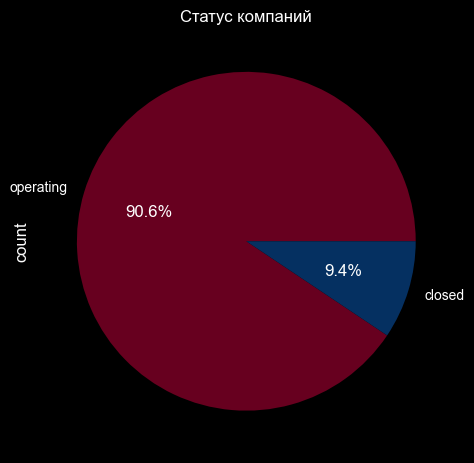

In [20]:
df.status.value_counts().plot(kind='pie', colormap='RdBu', autopct='%1.1f%%')
plt.title('Статус компаний')
plt.show()

Наблюдается сильный дисбаланс классов в соотношении примерно 1 к 10. При оптимизации модели нужно будет поработать с балансировкой (регулировка весов, порога или балансировка с помощью SMOTE)

#### Список категорий

Предобработаю список категорий для возможности интерпритации.

Перевожу формат из текста в лист с использованием разделителей | и +.

In [21]:
df['category_list'] = (df['category_list'].fillna('unknown'))
X_test['category_list'] = (X_test['category_list'].fillna('unknown'))
df.sample(5)

name                     category_list  funding_total_usd  \
43642   VZnet Netzwerke  Curated Web|Social Network Media                NaN   
1237            Bensata                      Social Media           225000.0   
34463   Rivanna Medical                       Health Care            50000.0   
35370  Escadrille, Inc.          Fashion|Lifestyle|Sports           419630.0   
18429     Quad Learning                         Education         25832058.0   

          status country_code state_code            region        city  \
43642  operating          NaN        NaN               NaN         NaN   
1237      closed          USA         TX           Houston     Houston   
34463  operating          USA         VA        VA - Other      Crozet   
35370  operating          NaN        NaN               NaN         NaN   
18429  operating          USA         DC  Washington, D.C.  Washington   

       funding_rounds founded_at first_funding_at last_funding_at  closed_at  
43642               1 2005-10-01       2005-01-01      2005-01-01        NaT  
1237                2 2007-01-01       2011-01-31      2011-02-28 2012-04-24  
34463               1 2011-03-02       2012-01-09      2012-01-09        NaT  
35370               1 2013-01-03       2014-12-31      2014-12-31        NaT  
18429               4 2012-01-01       2012-01-20      2015-08-07        NaT

Применяю One-Hot Encoding к колонке "category_list" для исследования данных. Заменять колокни в датасете не буду, потому что OHE будет использоваться в pipline при обучении модели.

In [22]:
df['category_list']

0               Online Reservations|Restaurants
1         Manufacturing|Medical|Medical Devices
2                                 Biotechnology
3                                   Health Care
4                                 Manufacturing
                          ...                  
52874                             Entertainment
52875                               Hospitality
52876     Email|Messaging|Productivity Software
52877                                  Security
52878    Online Rental|Parking|Price Comparison
Name: category_list, Length: 52879, dtype: object

In [23]:
category_dummies = df['category_list'].str.get_dummies()

In [24]:
print(f' Количество категорий: {category_dummies.shape[1]}')

 Количество категорий: 855


In [25]:
n = 20

top = pd.DataFrame(category_dummies.sum().sort_values(ascending=0).head(n),
             columns=['Количество стартапов'])
bottom = pd.DataFrame(category_dummies.sum().sort_values(ascending=1).head(n),
             columns=['Количество стартапов'])

print(f'Топ-{n} категорий')
display(top)
print(f'Нижние-{n} категорий')
display(bottom)

Топ-20 категорий


Количество стартапов
Software                             7033
Mobile                               4405
Biotechnology                        3683
E-Commerce                           3316
unknown                              2505
Curated Web                          2417
Social Media                         2287
Enterprise Software                  2197
Advertising                          1993
Health Care                          1895
Games                                1811
Internet                             1665
SaaS                                 1595
Education                            1544
Health and Wellness                  1526
Analytics                            1479
Apps                                 1468
Finance                              1462
Technology                           1448
Clean Technology                     1231

Нижние-20 категорий


Количество стартапов
Labor Optimization                                  1
Baby Boomers                                        1
Private Corrections                                 1
Fuel Cells                                          1
Elderly                                             1
Sex Industry                                        1
Biotechnology and Semiconductor                     1
Vulnerability Management                            1
Early Stage IT                                      1
EDA Tools                                           1
HDTV                                                1
First Aid                                           1
Quantitative Marketing                              1
Timeshares                                          1
TV Station                                          1
Notebooks                                           1
Cloud Gaming                                        1
Invention                                           1
Mothers                                             1
Hip Hop                                             1

In [26]:
df.iloc[category_dummies[category_dummies["Sex Industry"] == 1].index]

name         category_list  funding_total_usd     status  \
22071  Pornhub  Sex Industry|SexTech             4299.0  operating   

      country_code state_code  region         city  funding_rounds founded_at  \
22071          BLZ          1  Belize  Belize City               1 2014-05-05   

      first_funding_at last_funding_at closed_at  
22071       2015-06-10      2015-06-10       NaT

Ну да, кто бы сомневался )

In [27]:
category_dummies.sum()[category_dummies.sum()==1].count()

24

24 категории встречаются в датасете единожды, для обучения модели они не будут иметь ценности, нужно будет учесть это при обработке OHE или OE.

In [28]:
category_dummies = category_dummies.merge((df[target] == target_values[1]) *1,
                                           left_index=True, right_index=True)

In [29]:
top_category_status = None
for col in top.index[:]:
    d = pd.DataFrame({'Категория':[col],
        'Доля закрытых стратапов': [category_dummies[category_dummies[col]==1][target].mean()],
        'Количество в датасете': [category_dummies[category_dummies[col]==1][target].count()]})
    if top_category_status is not None:
        top_category_status = pd.concat([top_category_status,d])
    else:
        top_category_status = pd.concat([top_category_status,d])
top_category_status.sort_values('Доля закрытых стратапов',ascending=0).reset_index(drop=1)

Категория  Доля закрытых стратапов  Количество в датасете
0               unknown                 0.293812                   2505
1           Curated Web                 0.174183                   2417
2          Social Media                 0.127678                   2287
3                 Games                 0.115406                   1811
4              Internet                 0.111111                   1665
5           Advertising                 0.095334                   1993
6                  Apps                 0.090599                   1468
7                Mobile                 0.089898                   4405
8      Clean Technology                 0.085297                   1231
9            E-Commerce                 0.082328                   3316
10           Technology                 0.079420                   1448
11              Finance                 0.078659                   1462
12             Software                 0.075928                   7033
13        Biotechnology                 0.057562                   3683
14          Health Care                 0.057520                   1895
15  Enterprise Software                 0.052799                   2197
16                 SaaS                 0.052665                   1595
17            Education                 0.047927                   1544
18            Analytics                 0.043272                   1479
19  Health and Wellness                 0.040629                   1526

Как видно по топ-20 самых популярных категорий, этот признак влияет на успешность стартапа. К примеру категория Curated Web имеет 17.4% закрытых стартапов, а категория Health and Wellness всего 4%.

Теперь изчу самые успешные и неуспешные категории по всему датасету, исключу категории которые занимают менее 0.1% данных.

In [30]:
round(df.shape[0]*0.001)

53

In [31]:
good_catagory_cols = (category_dummies.drop(columns=target).sum()
                      [(category_dummies.sum() > round(df.shape[0]*0.001)) == True].index)

In [32]:
n = 20
category_status = None
for col in good_catagory_cols:
    d = pd.DataFrame({'Категория':[col],
        'Доля закрытых стратапов': [category_dummies[category_dummies[col]==1][target].mean()],
        'Количество в датасете': [category_dummies[category_dummies[col]==1][target].count()]})
    if category_status is not None:
        category_status = pd.concat([category_status,d])
    else:
        category_status = pd.concat([category_status,d])
# category_status.sort_values('Доля закрытых стратапов',ascending=0).reset_index(drop=1)

print(f'Топ-{n} самых успешных категорий')
display(category_status.sort_values('Доля закрытых стратапов').reset_index(drop=1).head(n))
print(f'Топ-{n} самых неудачных категорий')
category_status.sort_values('Доля закрытых стратапов',ascending=0).reset_index(drop=1).head(n)

Топ-20 самых успешных категорий


Категория  Доля закрытых стратапов  Количество в датасете
0      Business Analytics                 0.000000                     67
1          K-12 Education                 0.000000                     65
2           Mobile Health                 0.009434                    106
3         Home Automation                 0.009804                    102
4        Sales Automation                 0.015152                     66
5       Energy Management                 0.015625                     64
6           IT Management                 0.016667                     60
7             Agriculture                 0.017699                    113
8   Mobile Software Tools                 0.017857                    112
9         Computer Vision                 0.018182                     55
10       Data Integration                 0.019231                    104
11         Cyber Security                 0.019417                    103
12      Retail Technology                 0.022388                    134
13   Cloud Infrastructure                 0.022989                     87
14     Big Data Analytics                 0.025352                    355
15        Developer Tools                 0.025641                     78
16       Cloud Management                 0.025641                     78
17       Price Comparison                 0.026667                     75
18               Big Data                 0.026810                    746
19                 EdTech                 0.027397                    365

Топ-20 самых неудачных категорий


Категория  Доля закрытых стратапов  Количество в датасете
0                 unknown                 0.293812                   2505
1                 Coupons                 0.250000                    124
2                 Systems                 0.240741                     54
3           Social Buying                 0.218182                     55
4                Services                 0.201049                   1144
5                 Portals                 0.196429                     56
6             Promotional                 0.186667                     75
7                    VoIP                 0.180851                     94
8   Application Platforms                 0.178744                    207
9            Local Search                 0.175676                     74
10            Curated Web                 0.174183                   2417
11          Online Dating                 0.173077                    104
12              Discounts                 0.169811                    106
13       Public Relations                 0.168675                    249
14      Service Providers                 0.165165                    333
15   Social Network Media                 0.163664                    666
16  Facebook Applications                 0.163498                    263
17             Ediscovery                 0.162791                     86
18                  Local                 0.162162                    222
19               Shopping                 0.161017                    236

##### Промежуточные вывод

Как видно разброс достаточно большой, в некторых категория все стартапы успешные, а в некоторых и 25% провальные.
- Среди топ-20 самых успешных категорий находятся много IT направлений,в том числе Big Data, CV и автоматизация. Доля закрытых стартапов от 0 до 2.7 %
- Среди топ-20 самых провальных категорий доля закрытых стартапов от 16 до 25 %
- Среди стартапов с неуказанной категорией доля закрытых самая большая и составляет 29.4%
- **Этот признак определённо является важным для определения успешности стартапа**

#### Страна, штат, регион, город

In [33]:
categorical_columns = ['country_code', 'state_code', 'region','city']

Обработаю пропуски для более точного анализа.

In [34]:
df[categorical_columns] = df[categorical_columns].fillna('unknown')
X_test[categorical_columns] = X_test[categorical_columns].fillna('unknown')

In [35]:
print('Количество уникальных значений для каждого признака:')
for column in categorical_columns:
    print(column,': ',df[column].unique().shape[0])

Количество уникальных значений для каждого признака:
country_code :  135
state_code :  301
region :  1038
city :  4525


In [36]:
print('Количество значений, которые встречаються только 1 раз')
for column in categorical_columns[:]:
    print(column,': ',(df[column].value_counts() == 1).sum())

Количество значений, которые встречаються только 1 раз
country_code :  22
state_code :  44
region :  220
city :  2332


In [37]:
print('Количество значений, которые встречаються 5 раз или реже')
for column in categorical_columns[:]:
    print(column,': ',(df[column].value_counts() <= 5).sum())

Количество значений, которые встречаються 5 раз или реже
country_code :  54
state_code :  109
region :  584
city :  3680


Есть очень много значений, которые встречаются лишь единожды и очевидно, что они не несут ценности для обучения модели, во времи предобработки с помощью OHE нужно будут указать, чтобы такие значения пропускались, это позволит значительно ускорить процес обучения и предсказания модели. А так же стоит рассмотреть вариант урезать ещё сильнее и в OHE отфлитровать значения которые встречаются 5 раз или реже.

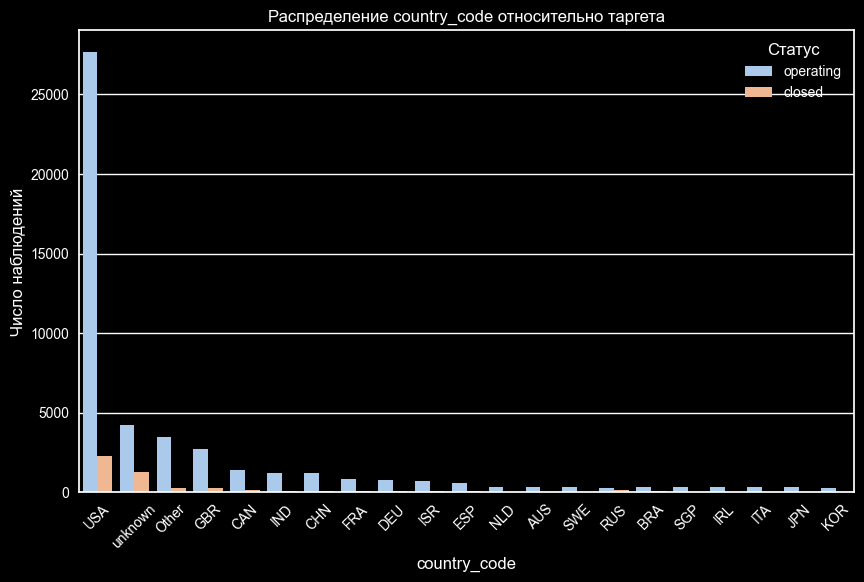

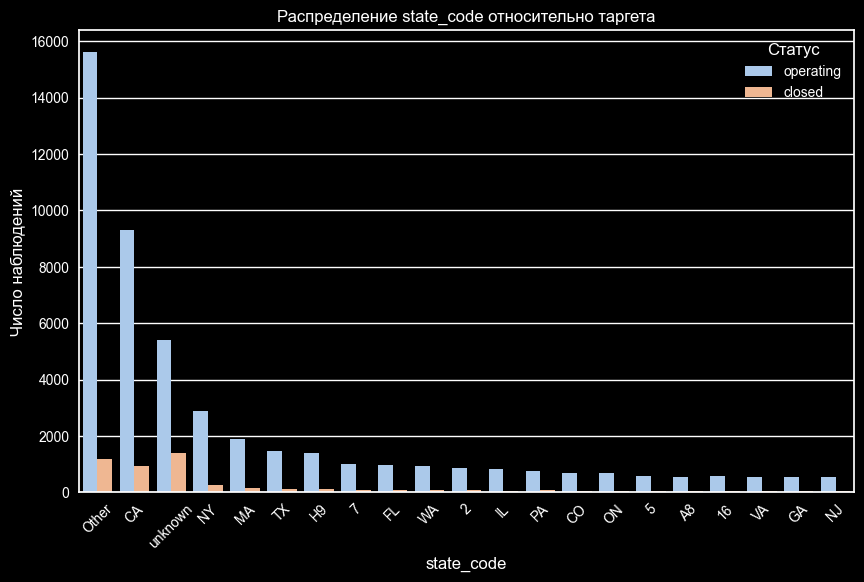

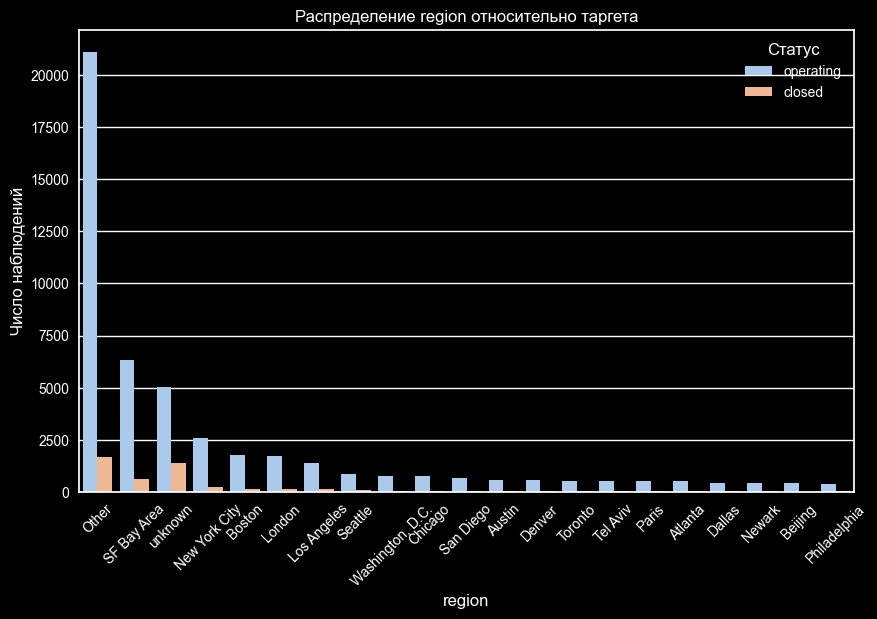

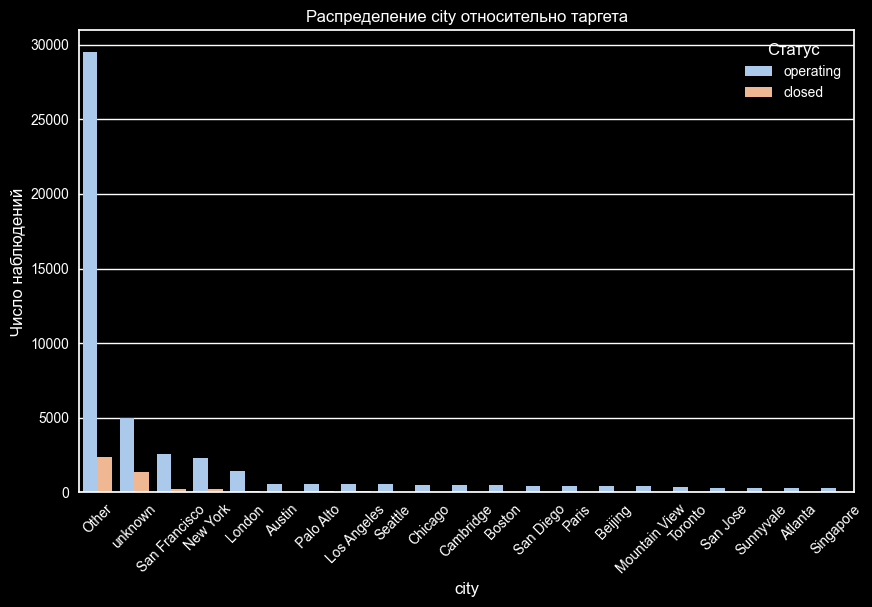

In [38]:
top_n = 20

def group_categories(df,column, top_n):
    top_categories = df[column].value_counts().head(top_n).index
    df[column] = df[column].apply(lambda x: x if x in top_categories else 'Other')
    return df

geo_df = df.copy()
for column in categorical_columns:
    geo_df = group_categories(geo_df,column, top_n)

for column in categorical_columns:
    plt.figure(figsize=(10, 6))
    order = geo_df[column].value_counts().index
    sns.countplot(data=geo_df, x=column, hue='status', palette='pastel', order=order)
    plt.title(f'Распределение {column} относительно таргета')
    plt.xlabel(column)
    plt.ylabel('Число наблюдений')
    plt.xticks(rotation=45)
    plt.legend(title='Статус', loc='upper right')
    plt.show()

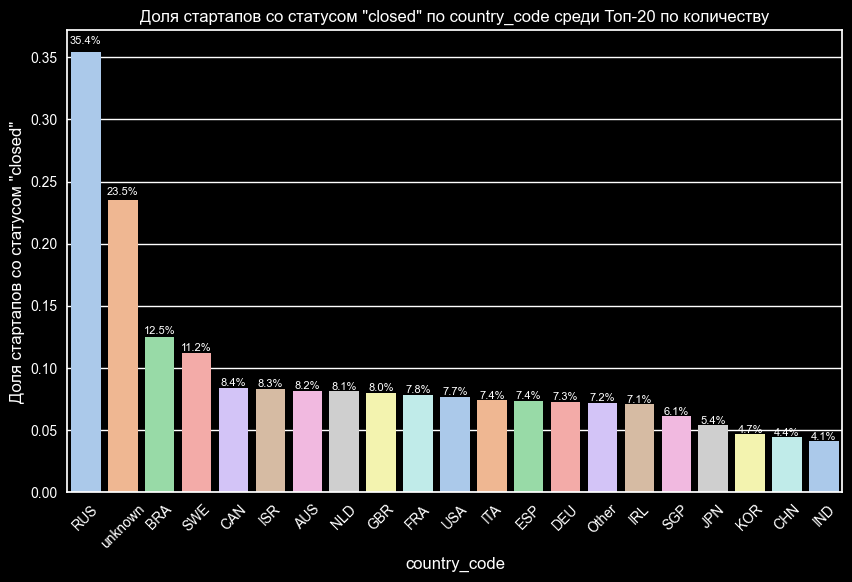

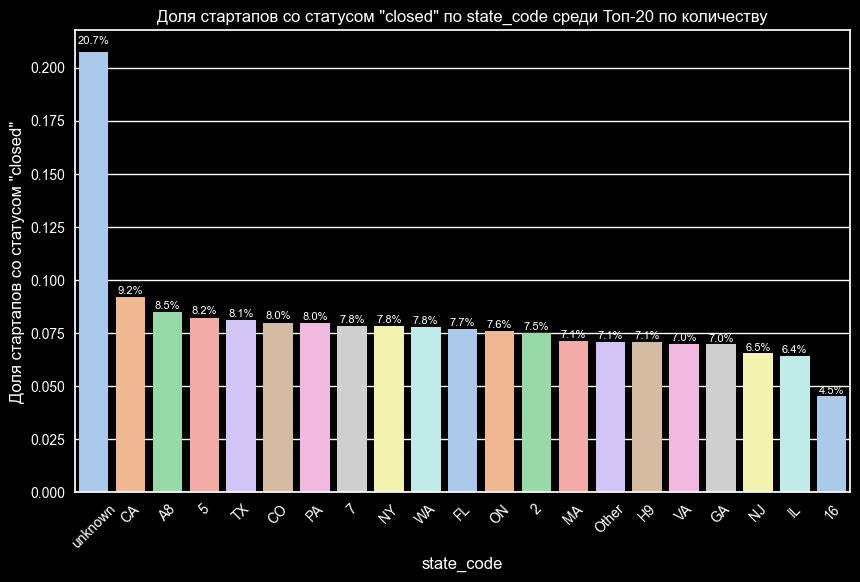

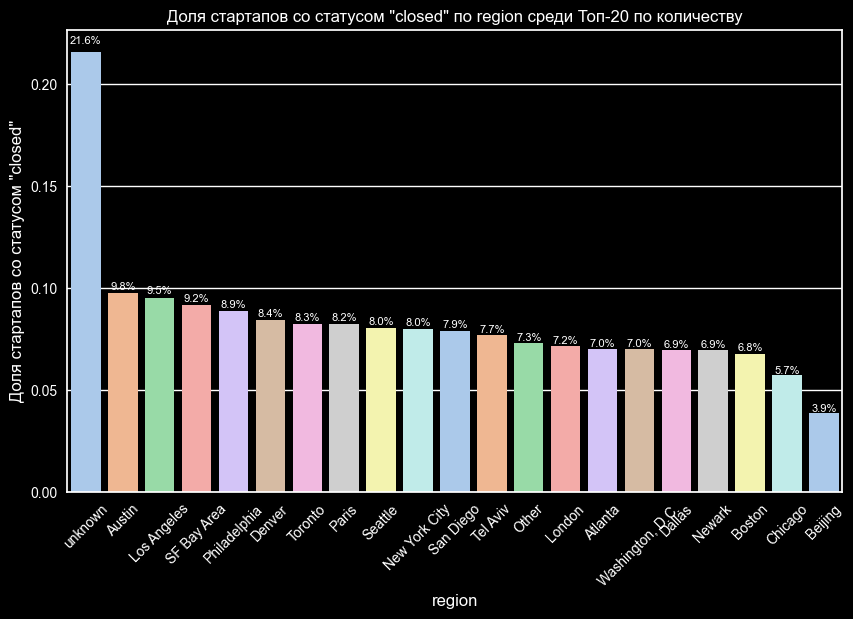

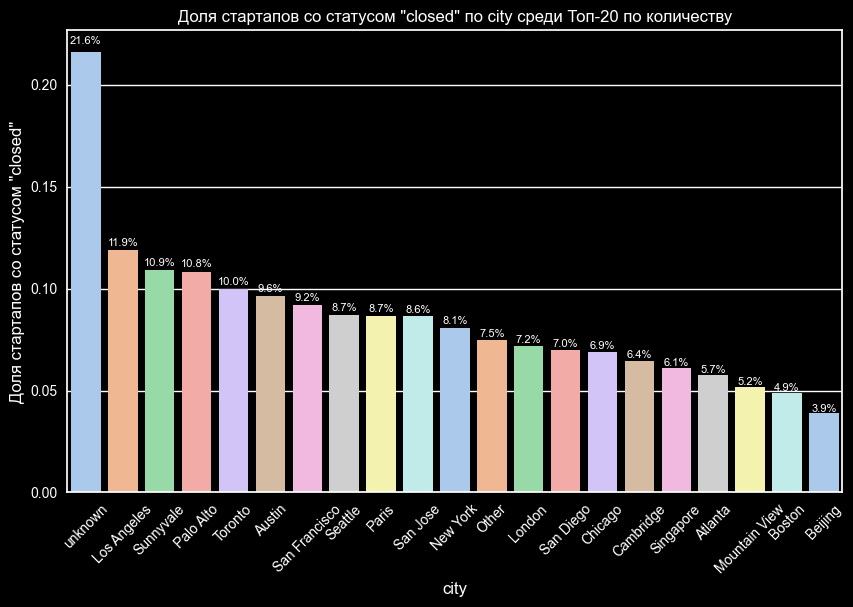

In [39]:
def plot_closed_ratio(df, column, top_n):
    # Объединяем редкие категории в одну общую категорию "Other"
    top_categories = df[column].value_counts().head(top_n).index
    df[column] = df[column].apply(lambda x: x if x in top_categories else 'Other')
    
    # Вычисляем долю стартапов со статусом 'closed' для каждой категории
    closed_ratio = df.groupby(column)['status'].apply(lambda x: (x == 'closed').mean()).reset_index(name='closed_ratio')

    # Сортируем значения по убыванию доли стартапов со статусом 'closed'
    closed_ratio = closed_ratio.sort_values(by='closed_ratio', ascending=False)

    # Построение графика
    plt.figure(figsize=(10, 6))
    ax = sns.barplot(data=closed_ratio, x=column, y='closed_ratio', palette='pastel')
    plt.title(f'Доля стартапов cо статусом "closed" по {column} среди Топ-{top_n} по количеству')
    plt.xlabel(column)
    plt.ylabel('Доля стартапов со статусом "closed"')
    plt.xticks(rotation=45)

    # Добавляем подписи процента закрытых стартапов над барами
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x() + p.get_width() / 2., height + 0.02*height, f'{height * 100:.1f}%', ha='center',fontsize=8)

    plt.show()

# Задаем количество топ N категорий, которые будем отображать
top_n = 20

# Построение графиков для категориальных признаков
for column in categorical_columns:
    plot_closed_ratio(df.copy(), column, top_n)

In [40]:
df.query('country_code == "RUS"').shape[0]

370

Расмотрим подробнее Россию


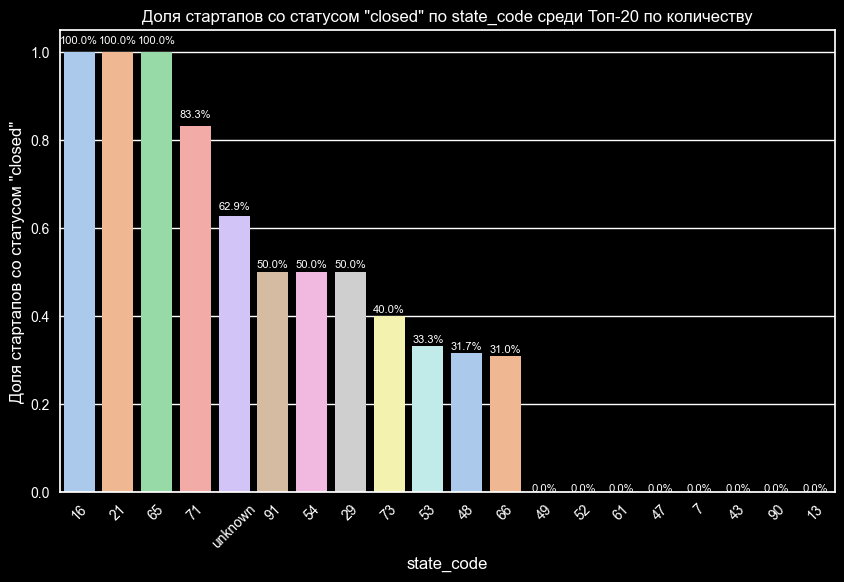

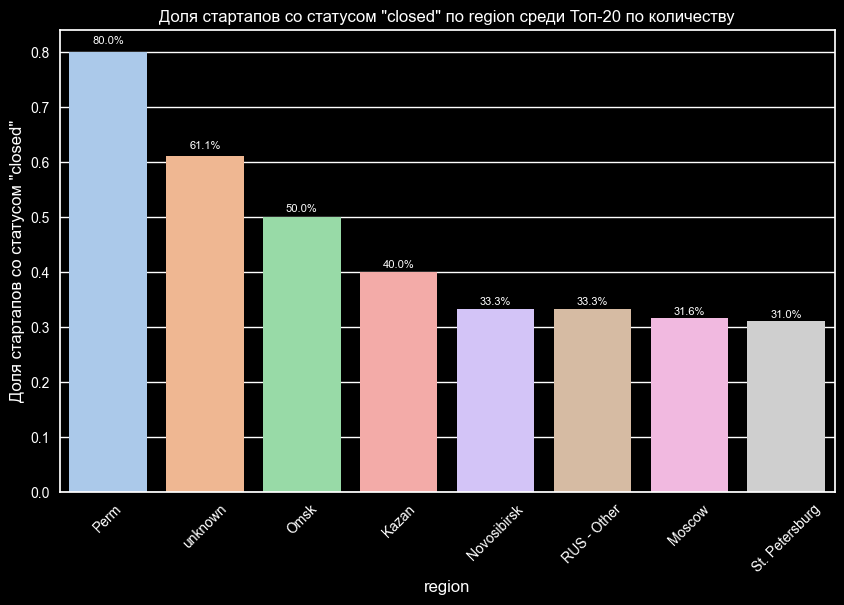

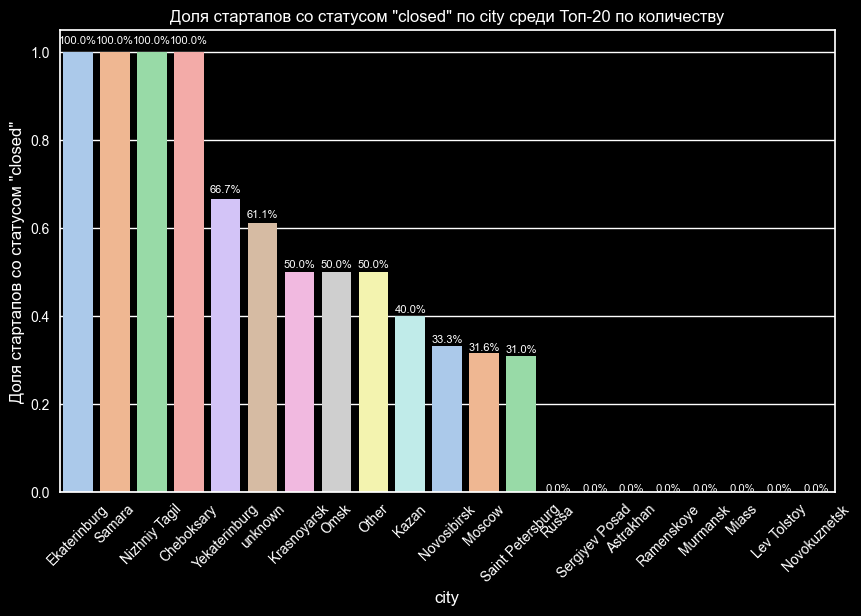

In [41]:
print('Расмотрим подробнее Россию')
for column in categorical_columns[1:]:
    plot_closed_ratio(df.query('country_code == "RUS"').copy(), column, top_n)

Печальная картина :)

Даже в столицах, доля закрытых стартапов 31.6 и 31%, что более чем в 3 раза больше доли закрытых стартапов по всем странам.

##### Вывод

**Видно что этот признак так же очень важен для обучения**, но есть много значений которые встречаются 1 раз и не будут нести ценности при обучении, а так же очень много значений, которые встречаются 5 раз или реже. Планирую добавить фильтрацию редких значений в OHE при предобработке, это позволит значительно ускорить процесс обучений, предсказания и оптимизации модели.

- Среди топ-20 стран по популяции в датасете Россия является топ 1 по количеству закрытых стартапов, с общей долей 35.4%
- В США открывалось больше всего стартапов.
- Неизвестные значения так же имеют высокую долю неудачных проектов - 20-24%

### Признаки с датами

In [42]:
for data in [df,X_test]:
    skimpy.skim(data)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 52879  │ │ string      │ 7     │                                                          │
│ │ Number of columns │ 13     │ │ datetime64  │ 4     │                                                          │
│ └───────────────────┴────────┘ │ float64     │ 1     │                                                          │
│                                │ int32       │ 1     │                                                          │
│                                └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━┳━━━━━━━┳━━━━━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━━┳━━━━┳━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━━━━┳━━━━━━━━┓  │
│ ┃ column_name  ┃ NA    ┃ NA %         ┃ mean     ┃ sd        ┃ p0 ┃ p25    ┃ p75      ┃ p100        ┃ hist   ┃  │
│ ┡━━━━━━━━━━━━━━╇━━━━━━━╇━━━━━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━━╇━━━━╇━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━━━━╇━━━━━━━━┩  │
│ │ funding_tota │ 10126 │ 19.149378770 │ 19000000 │ 210000000 │  1 │ 340000 │ 10000000 │ 30000000000 │   █    │  │
│ │ l_usd        │       │       400347 │          │           │    │        │          │             │        │  │
│ │ funding_roun │     0 │            0 │      1.7 │       1.4 │  1 │      1 │        2 │          19 │   █▁   │  │
│ │ ds           │       │              │          │           │    │        │          │             │        │  │
│ └──────────────┴───────┴──────────────┴──────────┴───────────┴────┴────────┴──────────┴─────────────┴────────┘  │
│                                                    datetime                                                     │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━┓  │
│ ┃ column_name           ┃ NA      ┃ NA %                      ┃ first          ┃ last          ┃ frequency   ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━┩  │
│ │ founded_at            │       0 │                         0 │   1749-01-01   │  2105-02-17   │ None        │  │
│ │ first_funding_at      │      21 │       0.03971330774031279 │   1960-01-01   │  2015-12-05   │ None        │  │
│ │ last_funding_at       │       0 │                         0 │   1971-01-01   │  2115-12-01   │ None        │  │
│ │ closed_at             │   47917 │          90.6163127139318 │   1972-12-19   │  2107-02-08   │ None        │  │
│ └───────────────────────┴─────────┴───────────────────────────┴────────────────┴───────────────┴─────────────┘  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name           ┃ NA   ┃ NA %                            ┃ words per row         ┃ total words       ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩  │
│ │ name                  │    1 │            0.001891109892395847 │                   1.6 │             85317 │  │
│ │ category_list         │    0 │                               0 │                   1.6 │             85317 │  │
│ │ status                │    0 │                      

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 13211  │ │ string      │ 6     │                                                          │
│ │ Number of columns │ 12     │ │ datetime64  │ 4     │                                                          │
│ └───────────────────┴────────┘ │ float64     │ 1     │                                                          │
│                                │ int32       │ 1     │                                                          │
│                                └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━┳━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━┳━━━━┳━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━┓  │
│ ┃ column_name   ┃ NA   ┃ NA %           ┃ mean     ┃ sd       ┃ p0 ┃ p25    ┃ p75      ┃ p100       ┃ hist   ┃  │
│ ┡━━━━━━━━━━━━━━━╇━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━╇━━━━╇━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━┩  │
│ │ funding_total │ 2595 │ 19.64272197411 │ 17000000 │ 93000000 │  1 │ 320000 │ 10000000 │ 4700000000 │   █    │  │
│ │ _usd          │      │           2483 │          │          │    │        │          │            │        │  │
│ │ funding_round │    0 │              0 │      1.7 │      1.3 │  1 │      1 │        2 │         15 │   █▁   │  │
│ │ s             │      │                │          │          │    │        │          │            │        │  │
│ └───────────────┴──────┴────────────────┴──────────┴──────────┴────┴────────┴──────────┴────────────┴────────┘  │
│                                                    datetime                                                     │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━┓  │
│ ┃ column_name            ┃ NA       ┃ NA %                   ┃ first          ┃ last           ┃ frequency   ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━┩  │
│ │ founded_at             │        0 │                      0 │   1766-01-01   │   2015-11-17   │ None        │  │
│ │ first_funding_at       │        0 │                      0 │   1973-04-15   │   2015-12-03   │ None        │  │
│ │ last_funding_at        │        0 │                      0 │   1973-04-15   │   2015-12-12   │ None        │  │
│ │ closed_at              │    11977 │       90.6592990689577 │   1981-04-17   │   2017-09-16   │ None        │  │
│ └────────────────────────┴──────────┴────────────────────────┴────────────────┴────────────────┴─────────────┘  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name                  ┃ NA     ┃ NA %       ┃ words per row               ┃ total words             ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━┩  │
│ │ name                         │      0 │          0 │                         1.6 │                   21436 │  │
│ │ category_list                │      0 │          0 │                         1.6 │                   21436 │  │
│ │ country_code                 │      0 │          0 │

In [43]:
datasets = [df,X_test]
dataset_names = ['Обучающая выборка', 'Тестовая выборка']
date_filters = ['< "1980-01-01"', '> "2018-01-01"']

#### Визуализация

Визуализируем данные дат.

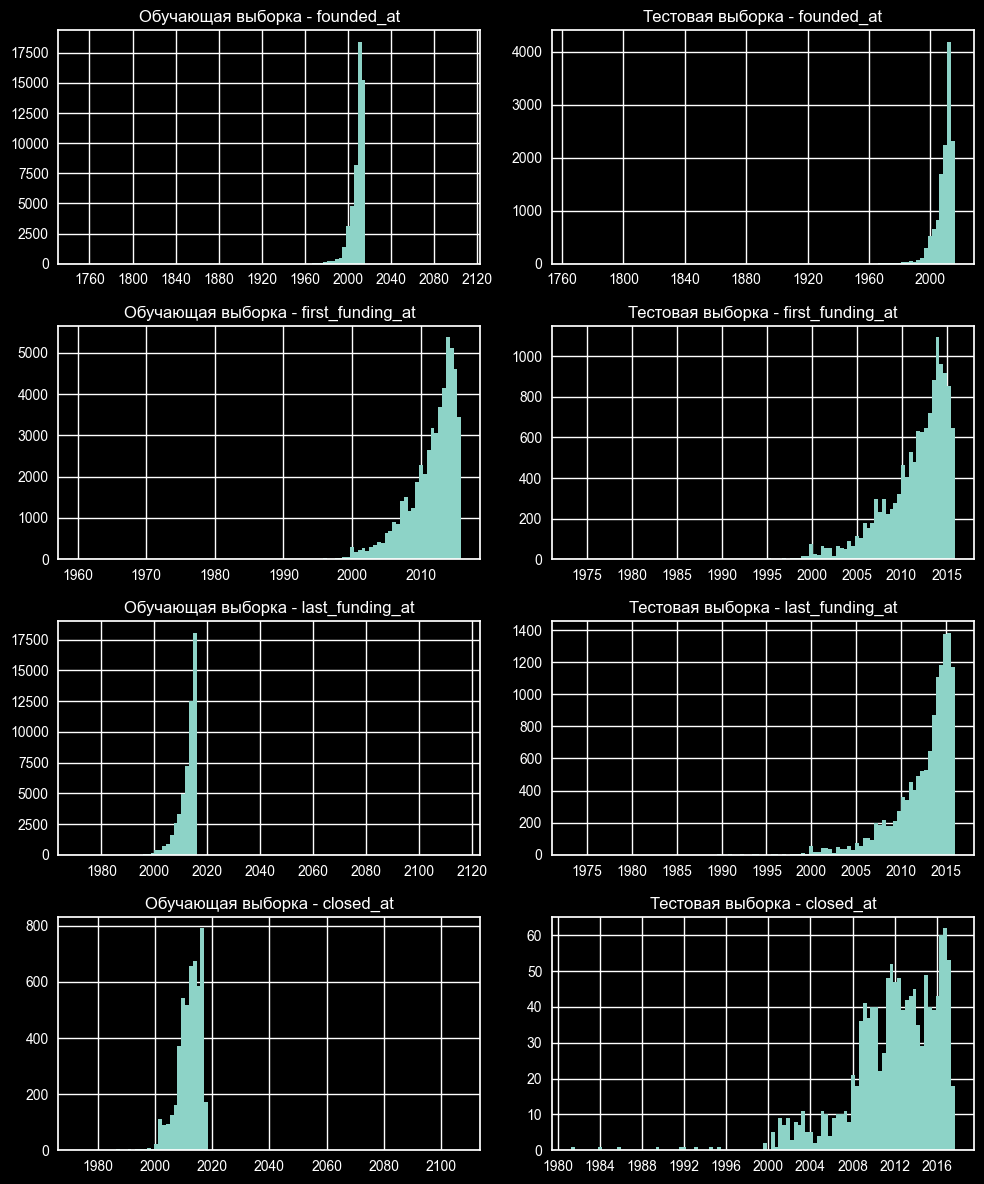

In [44]:
fig, axs = plt.subplots(len(date_columns), len(datasets), figsize=(10, 3*len(date_columns)))

for i in range(len(datasets)):
    data = datasets[i]
    for j, column in enumerate(date_columns):

        axs[j, i].hist(data[column], bins=100)
        axs[j, i].set_title(f'{dataset_names[i]} - {column}')
        
plt.tight_layout()
plt.show()

#### Выбросы

Теперь посмотрим только за выбросы - значения раньше чем 1980-01-01 и позже 2018-01-01.
- Начнём со значений меньше 1980 г.

##### Значения меньше 1980 г.

In [45]:
datasets[0].query(f'{date_columns[0]} {date_filters[0]}')

name  \
48                             Daniel's Jewelers   
76                                       Grupo A   
317                        Coleman Natural Foods   
404    Phnom Penh Water Supply Authority (PPWSA)   
615                      Mountain View Locksmith   
...                                          ...   
52278                              Since1910.com   
52343                                 Smit Ovens   
52703                         Pathology Holdings   
52760                                  GMR Group   
52763                                    Associa   

                           category_list  funding_total_usd     status  \
48                               unknown                NaN  operating   
76         E-Books|E-Commerce|Publishing          6772388.0  operating   
317                          Hospitality          9000000.0  operating   
404                              unknown                NaN  operating   
615                     Local Businesses                NaN  operating   
...                                  ...                ...        ...   
52278         E-Commerce|Fashion|Jewelry           100000.0  operating   
52343  Chemicals|Commercial Solar|Energy                NaN  operating   
52703                      Biotechnology         24654366.0  operating   
52760                         Consulting        398350000.0  operating   
52763                            unknown                NaN  operating   

      country_code state_code        region           city  funding_rounds  \
48             USA         CA   Los Angeles    Culver City               1   
76             BRA         23  Porto Alegre   Porto Alegre               1   
317            USA         NC     Asheville  Mountain Home               1   
404            KHM         11    Phnom Penh     Phnom Penh               1   
615            USA         CA   SF Bay Area  Mountain View               1   
...            ...        ...           ...            ...             ...   
52278          USA         NY   Long Island    Garden City               1   
52343          NLD          6   NLD - Other     Ekkersrijt               1   
52703          USA         CA   Los Angeles       Torrance               1   
52760          IND         19     Bangalore      Bangalore               1   
52763          USA         TX        Dallas         Dallas               1   

      founded_at first_funding_at last_funding_at closed_at  
48    1948-01-01       2014-11-24      2014-11-24       NaT  
76    1973-01-01       2009-09-30      2009-09-30       NaT  
317   1875-01-01       2003-08-20      2003-08-20       NaT  
404   1960-01-01       2012-04-01      2012-04-01       NaT  
615   1974-02-08       1984-07-23      1984-07-23       NaT  
...          ...              ...             ...       ...  
52278 1910-01-01       2007-01-01      2007-01-01       NaT  
52343 1936-01-01       2014-06-12      2014-06-12       NaT  
52703 1979-01-01       2009-10-20      2009-10-20       NaT  
52760 1978-01-01       2014-01-27      2014-01-27       NaT  
52763 1979-01-01       2008-06-11      2008-06-11       NaT  

[487 rows x 13 columns]

In [46]:
datasets[0].query(f'{date_columns[0]} == "{datasets[0][date_columns[0]].min()}"')

name category_list  funding_total_usd     status  \
17107  Scottish & Newcastle PLC       Brewing          4200000.0  operating   

      country_code state_code     region       city  funding_rounds  \
17107          GBR         U8  Edinburgh  Edinburgh               1   

      founded_at first_funding_at last_funding_at closed_at  
17107 1749-01-01       2003-10-10      2003-10-10       NaT

Да, та самая пивовареная компания. ))

Что касается дат основания до 1980 г. нет основания говорить что они не реальны. Я проверил первые и последние 5 наиминовений и дата создания оказалась реальной, вероятно даты от 1980 г до 2018 г. касаются только даты закрытия 'closed_at' и частично касаются дат преовго и последнего финансирования.

Даты же больше 2018г. очевидно подлежат предобработке, рассмотрю их подробнее.

##### Значения больше 2018 г.

In [47]:
for dataset,name in zip(datasets,dataset_names):
    big_date_errors = []
    for column in date_columns:
        big_date_errors += dataset.query(f'{column} {date_filters[1]}').index[:].to_list()
    print(f'{name} {date_filters[1]}')
    display(dataset.loc[pd.unique(big_date_errors)])    

Обучающая выборка > "2018-01-01"


name                                      category_list  \
16845        DugoutFC Ltd                                     Fantasy Sports   
48217              LIVAMP                          Entertainment|Music|Video   
7119         Rasyonel R&D  Embedded Hardware and Software|Internet of Thi...   
9415   Wigzo Technologies                           Advertising|Email|Mobile   

       funding_total_usd     status country_code state_code   region     city  \
16845           100000.0  operating      unknown    unknown  unknown  unknown   
48217           300000.0     closed      unknown    unknown  unknown  unknown   
7119            220000.0     closed          TUR         35    Izmir    Izmir   
9415            600000.0  operating      unknown    unknown  unknown  unknown   

       funding_rounds founded_at first_funding_at last_funding_at  closed_at  
16845               1 2105-02-17       2015-01-01      2015-01-01        NaT  
48217               1 2041-09-21       2015-08-31      2015-08-31 2017-02-04  
7119                3 2013-03-20       2013-04-05      2105-05-01 2107-02-08  
9415                2 2012-12-23       2014-08-18      2115-12-01        NaT

Тестовая выборка > "2018-01-01"


Empty DataFrame
Columns: [name, category_list, funding_total_usd, country_code, state_code, region, city, funding_rounds, founded_at, first_funding_at, last_funding_at, closed_at]
Index: []

- В начале я предположил что даты относящиеся к 2100 году и более являются опечаткой и нужно вычесть 100 лет из даты. Но изучив подробнее выяснил что помимо этой ошибке, в году так же могут быть перепутаны 2,3,4 цифры местами.
- Так как опечатки многообразны, а тестовые данные не имееют таких ошибок и в тренировочных данных всего 4 таких выброса, то я изменю даты вручную, вместо того чтобы писать громадный блок кода для обработки.

In [48]:
df.loc[16845,'founded_at'] = '2015-02-17'
df.loc[16845,['first_funding_at','last_funding_at']] = '2016-01-01'

df.loc[48217,'founded_at'] = '2014-09-21'

df.loc[7119,'last_funding_at'] = '2015-05-01'
df.loc[7119,'closed_at'] = '2016-07-30'

df.loc[9415,'last_funding_at'] = '2015-12-01'

for dataset,name in zip(datasets,dataset_names):
    big_date_errors = []
    for column in date_columns:
        big_date_errors += dataset.query(f'{column} {date_filters[1]}').index[:].to_list()
    print(f'{name} {date_filters[1]}')
    display(dataset.loc[pd.unique(big_date_errors)])

Обучающая выборка > "2018-01-01"


Empty DataFrame
Columns: [name, category_list, funding_total_usd, status, country_code, state_code, region, city, funding_rounds, founded_at, first_funding_at, last_funding_at, closed_at]
Index: []

Тестовая выборка > "2018-01-01"


Empty DataFrame
Columns: [name, category_list, funding_total_usd, country_code, state_code, region, city, funding_rounds, founded_at, first_funding_at, last_funding_at, closed_at]
Index: []

##### Первый раунд финансирования раньше даты основания стратапа.

Проверим теперь случаи когда первый раунд финансирования раньше даты создания стартапа.

In [49]:
incorrect_ff_date_df = df.query('founded_at > first_funding_at')
incorrect_ff_date_df[['founded_at','first_funding_at']]

founded_at first_funding_at
34    2013-08-13       2013-07-09
75    2014-04-01       2013-12-09
97    2005-11-01       2005-10-10
111   2009-10-09       2009-09-09
114   2011-08-01       2006-04-01
...          ...              ...
52728 2007-02-01       2007-01-01
52737 2014-10-01       2014-09-23
52790 2013-11-12       2013-11-01
52804 2011-10-01       2011-01-01
52876 2010-07-01       2009-06-14

[2961 rows x 2 columns]

In [50]:
X_test.query('founded_at > first_funding_at').shape[0]

772

In [51]:
(incorrect_ff_date_df['first_funding_at'] - incorrect_ff_date_df['founded_at']).dt.days.describe()

count    2961.000000
mean     -297.460655
std       572.142957
min     -9465.000000
25%      -307.000000
50%      -116.000000
75%       -31.000000
max        -1.000000
dtype: float64

В основном значения от 1 до 10 месяцев, но есть и более экстремальные случаи.

- С чем это может быть связано? 
    - В некоторых случаях инвесторы могут предоставить финансирование на основе идеи или предварительного концепта, до того как компания будет официально основана. Также могут быть случаи, когда дата первого финансирования задается задним числом, например, после того, как стартап уже начал свою деятельность.

- Что делать?
    - Это не типичная ситуация, и в большинстве случаев первый раунд финансирования обычно происходит после даты основания стартапа. Но так как такое поведение имеет место быть и занимает значительную часть данных (больше 5%), то я предпочту ***не вносить изминения на данном этапе***.

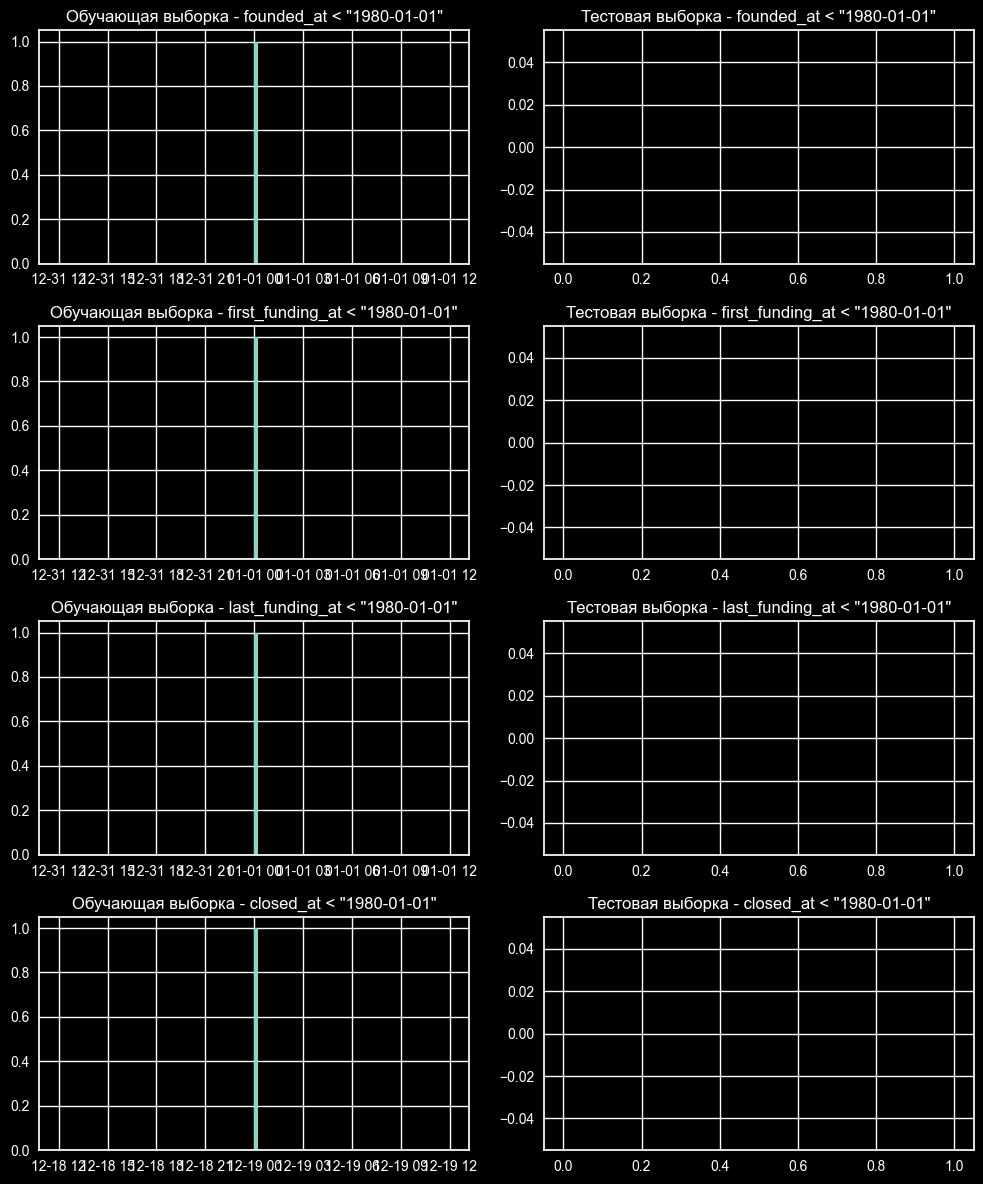

<Figure size 800x550 with 0 Axes>

In [52]:
fig, axs = plt.subplots(len(date_columns), len(datasets), figsize=(10, 3*len(date_columns)))

for date_filter in date_filters:
    for i in range(len(datasets)):
        data = datasets[i].query(f'{column} {date_filter}')
        for j, column in enumerate(date_columns):

            axs[j, i].hist(data[column], bins=100)
            axs[j, i].set_title(f'{dataset_names[i]} - {column} {date_filter}')
        
    plt.tight_layout()
    plt.show()

#### Визуализация после обработки выбросов

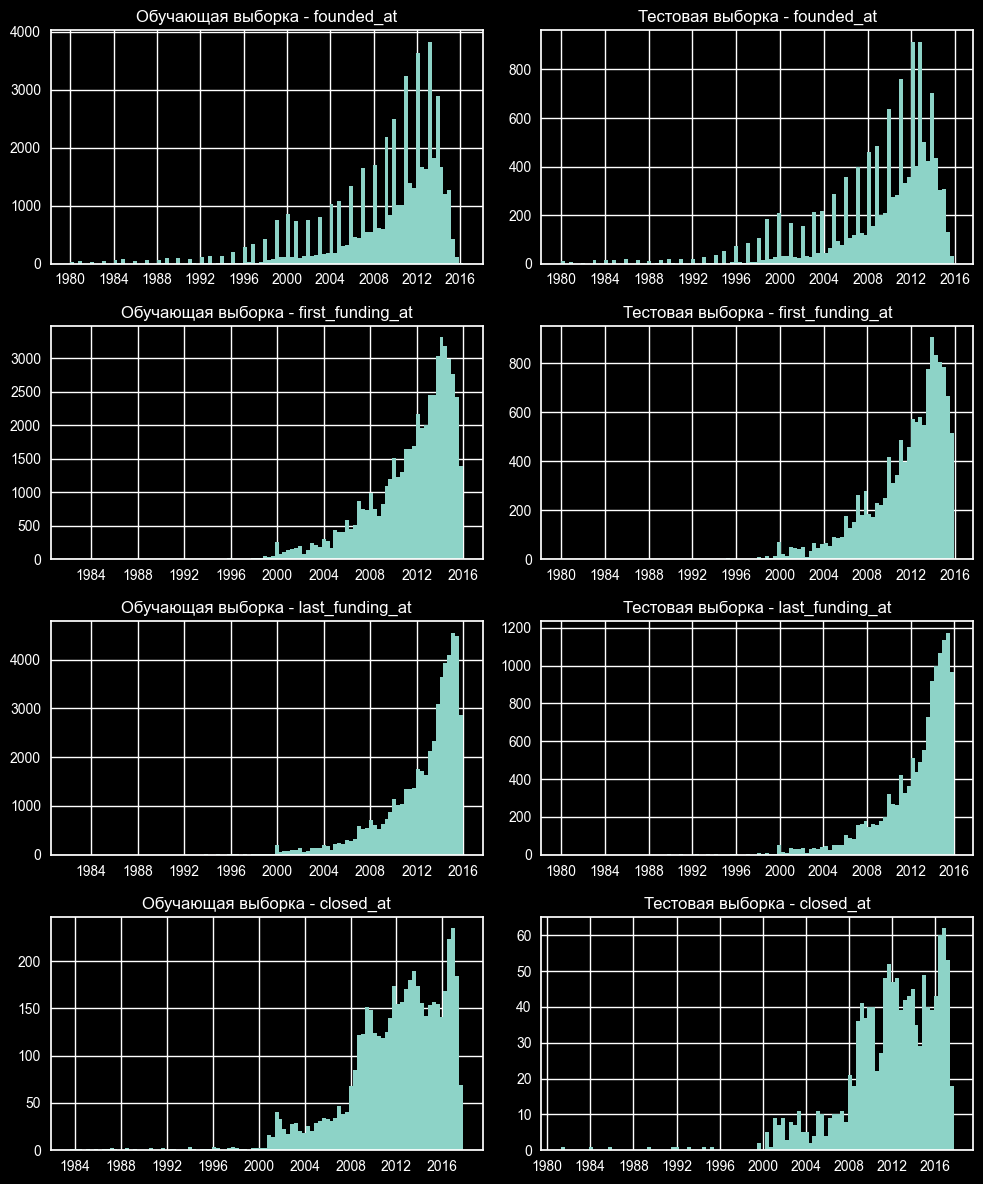

In [53]:
fig, axs = plt.subplots(len(date_columns), len(datasets), figsize=(10, 3*len(date_columns)))

for i in range(len(datasets)):
    data = datasets[i]
    for j, column in enumerate(date_columns):

        axs[j, i].hist(data.query(f'{column}>="1980-01-01"')[column], bins=100)
        axs[j, i].set_title(f'{dataset_names[i]} - {column}')

plt.tight_layout()
plt.show()

#### Пропуски

##### first_funding_at
Восполню пропуски в *first_funding_at*, использую для этого следующую логику:
- Дата первого финансирования = Дата основания + (Дата последнего финансирования - Дата основания) / Количество раундов

Т.е Дата первого финансирования = Дата основания + среднее арифметическое количество дней между раундами финансирования.

In [54]:
for data in datasets:
    missing_first_funding = data[data['first_funding_at'].isnull()]
    missing_first_funding['mean_time_between_rounds'] = ((missing_first_funding['last_funding_at'] -
                                                        missing_first_funding['founded_at']) / 
                                                        missing_first_funding['funding_rounds'])
    missing_first_funding['first_funding_at'] = (missing_first_funding['founded_at'] +
                                                missing_first_funding['mean_time_between_rounds'])
    
    data.update(missing_first_funding)

##### closed_at

Заполню пропуски датой выгрузки - '2018-01-01', по сути в данном случае более корректное название этого признака будет 'last_date' - "последняя дата получения информации о статусе стартапа".

In [55]:
for dataset in datasets:
    dataset.closed_at.fillna('2018-01-01',inplace=True)
    display(dataset[date_columns].info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52879 entries, 0 to 52878
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   founded_at        52879 non-null  datetime64[ns]
 1   first_funding_at  52879 non-null  datetime64[ns]
 2   last_funding_at   52879 non-null  datetime64[ns]
 3   closed_at         52879 non-null  datetime64[ns]
dtypes: datetime64[ns](4)
memory usage: 1.6 MB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13211 entries, 0 to 13210
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   founded_at        13211 non-null  datetime64[ns]
 1   first_funding_at  13211 non-null  datetime64[ns]
 2   last_funding_at   13211 non-null  datetime64[ns]
 3   closed_at         13211 non-null  datetime64[ns]
dtypes: datetime64[ns](4)
memory usage: 413.0 KB


None

#### Генерация признаков.

Сгенерирую признаки отражающие разницу между датами.

In [56]:
def generate_date_features(dataset):
    """
    Генерирует синтетические признаки на основе разницы между датами.

    Аргументы:
    dataset (DataFrame): Датасет с колонками 'founded_at', 'first_funding_at', 'last_funding_at', 'closed_at' в формате datetime64[ns].

    Возвращает:
    DataFrame: Датасет с добавленными колонками, отображающими разницу в днях между различными комбинациями дат.
    """

    # Разница между датой основания и датой получения информации (lifetime)
    dataset['lifetime'] = (dataset['closed_at'] - dataset['founded_at']).dt.days

    # Разница между датой основания и датой первого финансирования
    dataset['founded_to_first_funding'] = (dataset['first_funding_at'] - dataset['founded_at']).dt.days
    
    # Разница между датой первого и последнего финансирования
    dataset['first_to_last_funding'] = (dataset['last_funding_at'] - dataset['first_funding_at']).dt.days
    
    # Разница между датой первого финансирования и датой получения информации
    dataset['first_to_closed'] = (dataset['closed_at'] - dataset['first_funding_at']).dt.days

    # Разница между датой последнего финансирования и датой получения информации
    dataset['last_to_closed'] = (dataset['closed_at'] - dataset['first_funding_at']).dt.days

    return dataset

In [57]:
new_features_from_dates = ['lifetime','founded_to_first_funding','first_to_last_funding','first_to_closed','last_to_closed']
df = generate_date_features(df)
X_test = generate_date_features(X_test)

#### Исследования зависимости status от сгенерированных признаков даты.

In [58]:
def add_dates_information(data,date_columns = date_columns[:-1], return_list = False):
    """
    Генерирует синтетические признаки из даты: месяц, день недели, неделя в году, день в году, день в месяце, год.

    Аргументы:
    dataset (DataFrame): Датасет.
    date_columns (list): Список с колонками в формате datetime64[ns].
    return_list (bool): Если True кроме датасета возвращает так же и список с названиями новых полей.

    Возвращает:
    DataFrame: Датасет с добавленными колонками, отображающими разницу в днях между различными комбинациями дат.
    """
    if return_list:
        new_columns_list = []
        names = ['month','day_of_week','week_of_year',
                 'day_of_year','day_of_month','year']

    for feature in date_columns:
        data[f'{feature}_month'] = data[feature].dt.month
        data[f'{feature}_day_of_week'] = data[feature].dt.dayofweek
        data[f'{feature}_week_of_year'] = data[feature].dt.isocalendar().week
        data[f'{feature}_day_of_year'] = data[feature].dt.dayofyear
        data[f'{feature}_day_of_month'] = data[feature].dt.day
        data[f'{feature}_year'] = data[feature].dt.year
        if return_list:
            new_columns_list += [f'{feature}_{name}' for name in names]

    if return_list == False:
        return data
    else:
        return data, new_columns_list

In [59]:
dates_data = df.copy()
dates_data, new_dates_columns = add_dates_information(dates_data,return_list=True)
dates_data['is_closed'] = (dates_data['status'] == 'closed') * 1
dates_data.sample(3)

name           category_list  funding_total_usd  \
3870             Avensus  Information Technology                NaN   
35438          Photoways             Photography         21560790.0   
52783  Deutsche Startups           News|Startups                NaN   

          status country_code state_code       region          city  \
3870      closed          NLD         16    Amsterdam        Almere   
35438  operating          FRA         A8  FRA - Other  Sartrouville   
52783  operating      unknown    unknown      unknown       unknown   

       funding_rounds founded_at  ... first_funding_at_day_of_year  \
3870                1 2000-01-01  ...                          153   
35438               3 1999-01-01  ...                           92   
52783               1 2006-07-15  ...                           98   

      first_funding_at_day_of_month first_funding_at_year  \
3870                              1                  2008   
35438                             1                  2000   
52783                             8                  2007   

       last_funding_at_month  last_funding_at_day_of_week  \
3870                       6                            6   
35438                      7                            3   
52783                      4                            6   

       last_funding_at_week_of_year  last_funding_at_day_of_year  \
3870                             22                          153   
35438                            29                          200   
52783                            14                           98   

       last_funding_at_day_of_month  last_funding_at_year  is_closed  
3870                              1                  2008          1  
35438                            19                  2007          0  
52783                             8                  2007          0  

[3 rows x 37 columns]

##### Дата основания

In [60]:
n = 0
for col in new_dates_columns[6*n:6*n+6]:
    display(dates_data[dates_data['founded_at']>'1971'].groupby(col)['is_closed'].agg(['mean','count']))

mean  count
founded_at_month                 
1                 0.071761  23843
2                 0.127990   2508
3                 0.110043   2808
4                 0.114009   2684
5                 0.121691   2720
6                 0.111613   2876
7                 0.115030   2495
8                 0.110594   2577
9                 0.109818   2577
10                0.104421   2624
11                0.100907   2537
12                0.112847   2304

mean  count
founded_at_day_of_week                 
0                       0.097854   6898
1                       0.092538   8537
2                       0.090275   7023
3                       0.096749   7814
4                       0.099448   7240
5                       0.089089   7644
6                       0.093011   7397

mean  count
founded_at_week_of_year                 
1                        0.068613  12330
2                        0.111753    519
3                        0.117886    492
4                        0.119617    418
5                        0.119318   1232
6                        0.133333    435
7                        0.133745    486
8                        0.155738    366
9                        0.097332   1387
10                       0.133652    419
11                       0.125523    478
12                       0.113456    379
13                       0.095683    857
14                       0.110048    836
15                       0.116854    445
16                       0.130751    413
17                       0.114007    614
18                       0.104599   1109
19                       0.132170    401
20                       0.148148    432
21                       0.132124    386
22                       0.096943   1341
23                       0.126761    568
24                       0.104121    461
25                       0.140777    412
26                       0.109415    786
27                       0.118404    777
28                       0.111111    423
29                       0.107895    380
30                       0.145740    446
31                       0.105936   1095
32                       0.102190    411
33                       0.106095    443
34                       0.121827    394
35                       0.094320    986
36                       0.101721    639
37                       0.099323    443
38                       0.162371    388
39                       0.117825    662
40                       0.106776    974
41                       0.092269    401
42                       0.107399    419
43                       0.119891    367
44                       0.093829   1183
45                       0.101896    422
46                       0.111607    448
47                       0.106329    395
48                       0.092723    852
49                       0.122137    524
50                       0.101810    442
51                       0.126866    402
52                       0.066449   6742
53                       0.079874   3493

mean  count
founded_at_day_of_year                 
1                       0.067289  21757
2                       0.093750     96
3                       0.151786    112
4                       0.083333     60
5                       0.129412     85
...                          ...    ...
362                     0.194444     36
363                     0.080000     50
364                     0.133333     45
365                     0.166667     48
366                     0.080000     25

[366 rows x 2 columns]

mean  count
founded_at_day_of_month                 
1                        0.076938  31844
2                        0.116438    730
3                        0.130986    710
4                        0.116951    761
5                        0.144628    726
6                        0.112654    648
7                        0.111588    699
8                        0.091514    601
9                        0.118076    686
10                       0.118998    958
11                       0.094928    769
12                       0.105769    728
13                       0.125191    655
14                       0.118825    749
15                       0.123615   1173
16                       0.109890    637
17                       0.137143    700
18                       0.116667    720
19                       0.098361    610
20                       0.152520    754
21                       0.130499    682
22                       0.125203    615
23                       0.106750    637
24                       0.126036    603
25                       0.116013    612
26                       0.100649    616
27                       0.153846    611
28                       0.134933    667
29                       0.121528    576
30                       0.129573    656
31                       0.114286    420

mean  count
founded_at_year                 
1971             0.000000      1
1972             0.117647     17
1973             0.076923     13
1974             0.000000     11
1975             0.062500     16
1976             0.150000     20
1977             0.000000     18
1978             0.076923     26
1979             0.051282     39
1980             0.147059     34
1981             0.133333     45
1982             0.078947     38
1983             0.094340     53
1984             0.068493     73
1985             0.131579     76
1986             0.052632     57
1987             0.058824     68
1988             0.088608     79
1989             0.093750     96
1990             0.073684     95
1991             0.052083     96
1992             0.069231    130
1993             0.095890    146
1994             0.061350    163
1995             0.060748    214
1996             0.072289    332
1997             0.048346    393
1998             0.140940    596
1999             0.138254    962
2000             0.116496   1073
2001             0.110537    968
2002             0.121302   1014
2003             0.121823   1141
2004             0.116329   1384
2005             0.134278   1765
2006             0.140148   2162
2007             0.134873   2684
2008             0.122645   2813
2009             0.099777   3588
2010             0.098310   4496
2011             0.086195   5708
2012             0.057267   6653
2013             0.045291   6955
2014             0.080786   4939
2015             0.205995   1301
2016             0.500000      2

Визуализация количества всех стартапов и доли закрытых стратапов по признакам даты

- Дата Основания

-- Доля закрывшихся стартапов



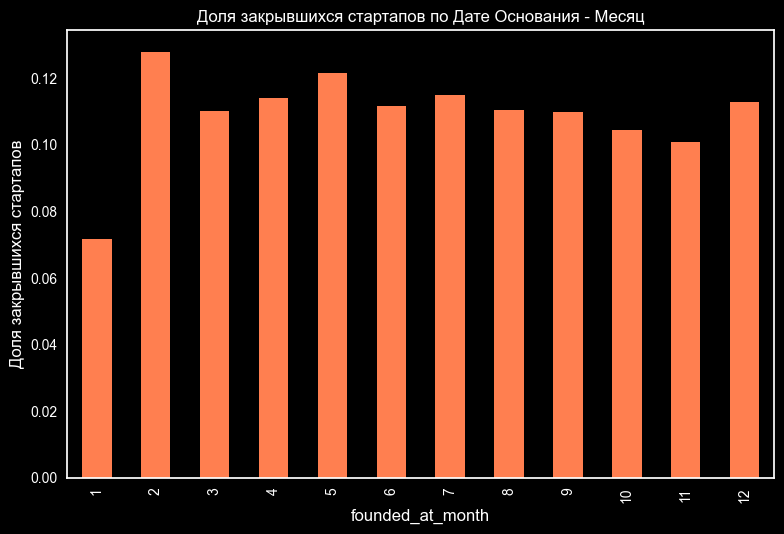

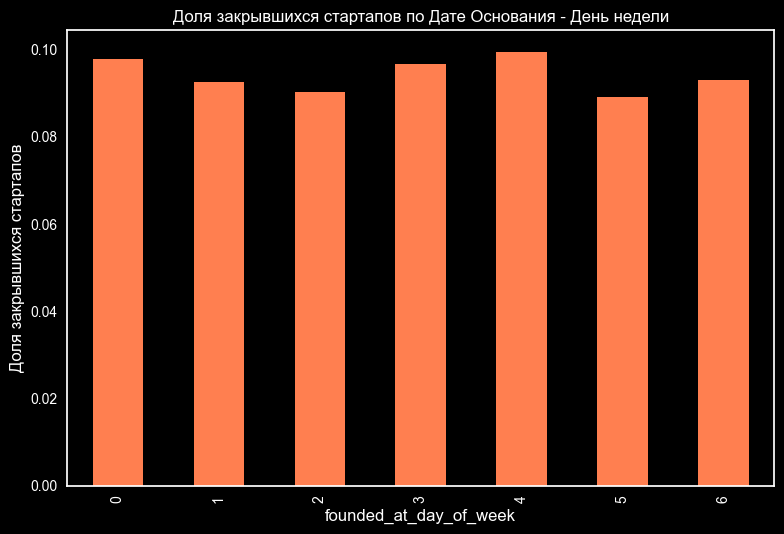

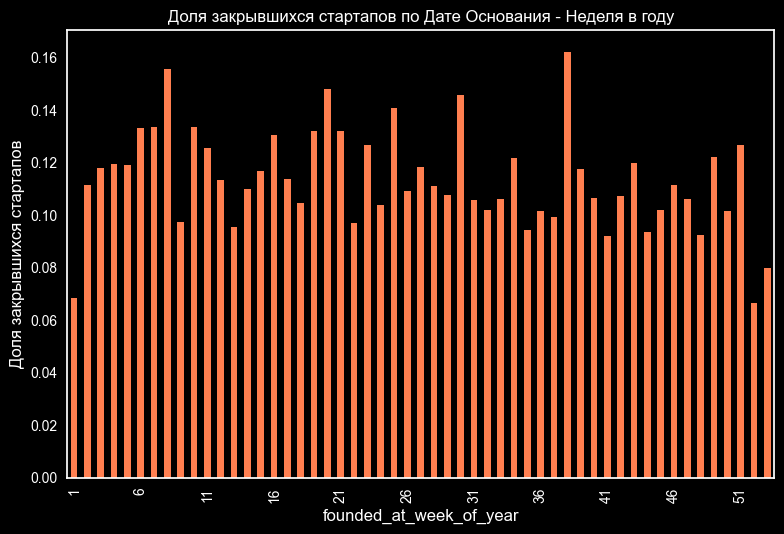

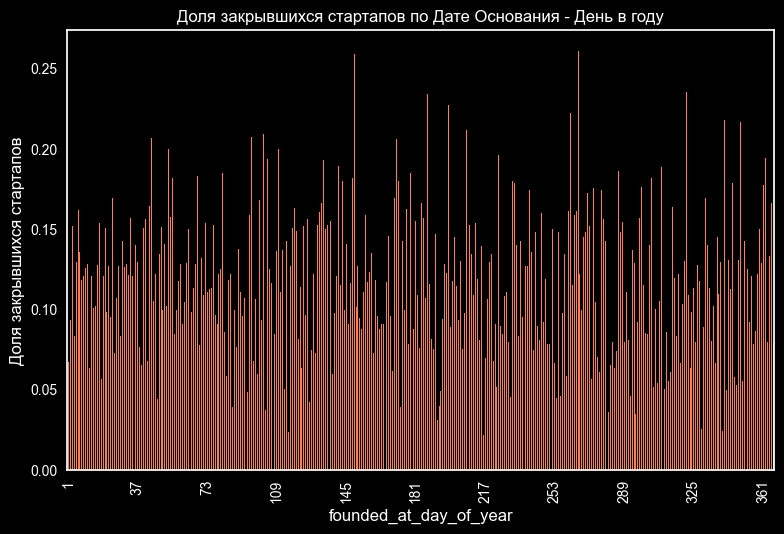

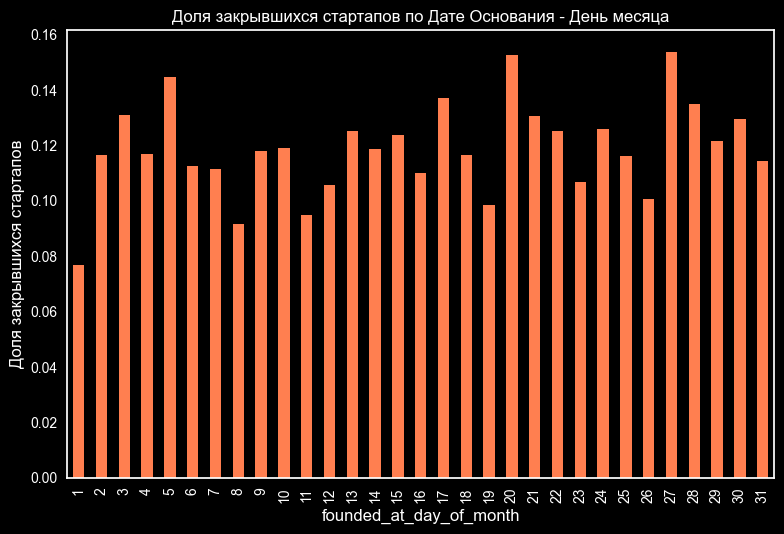

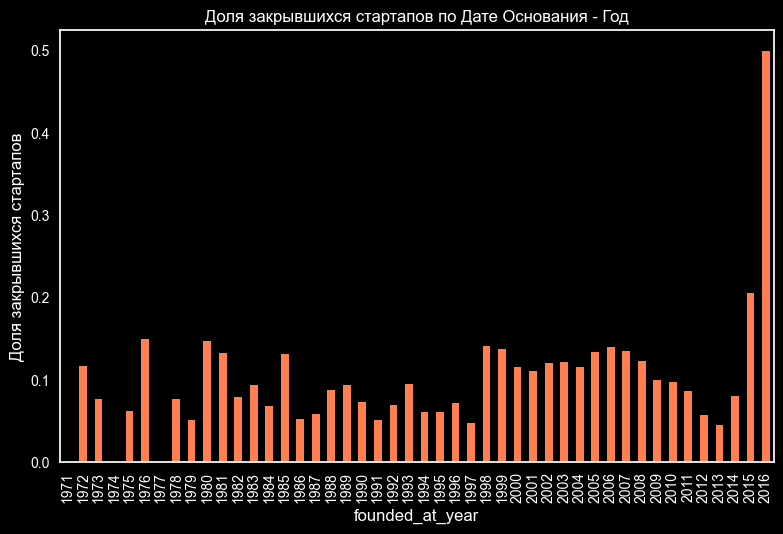

-- Количество стартапов



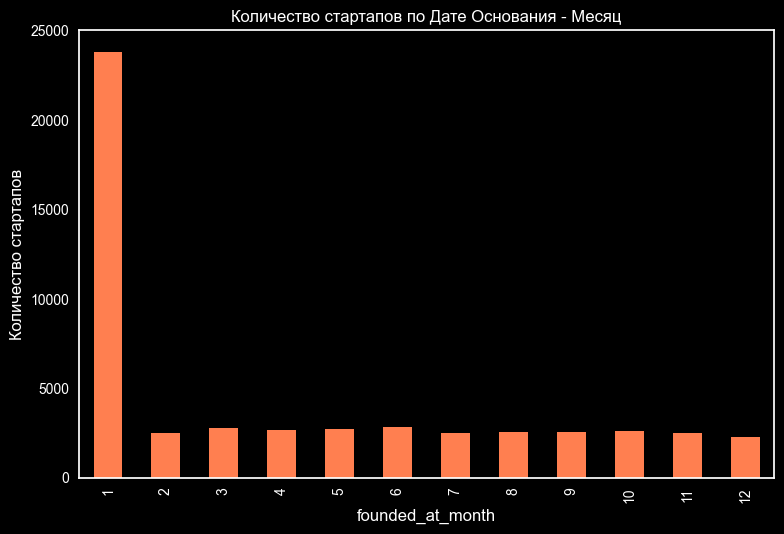

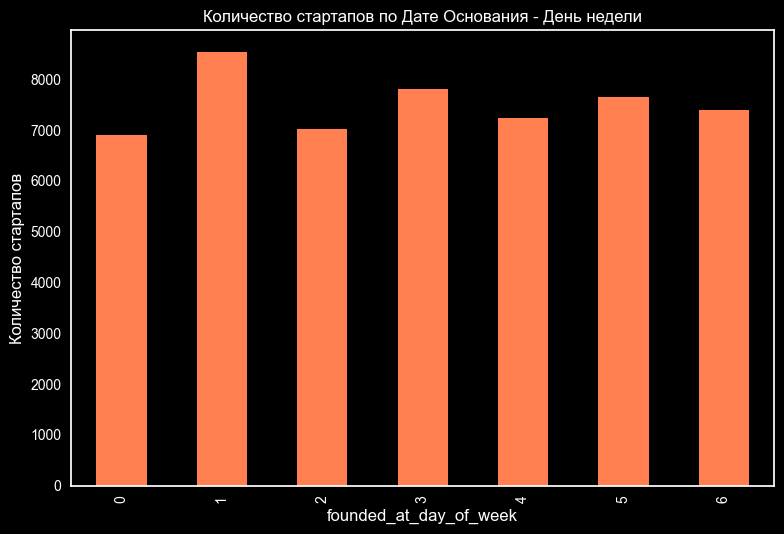

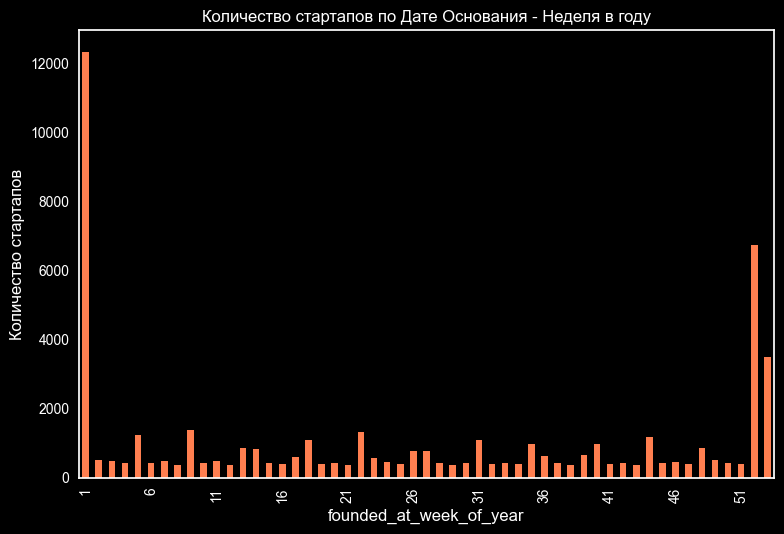

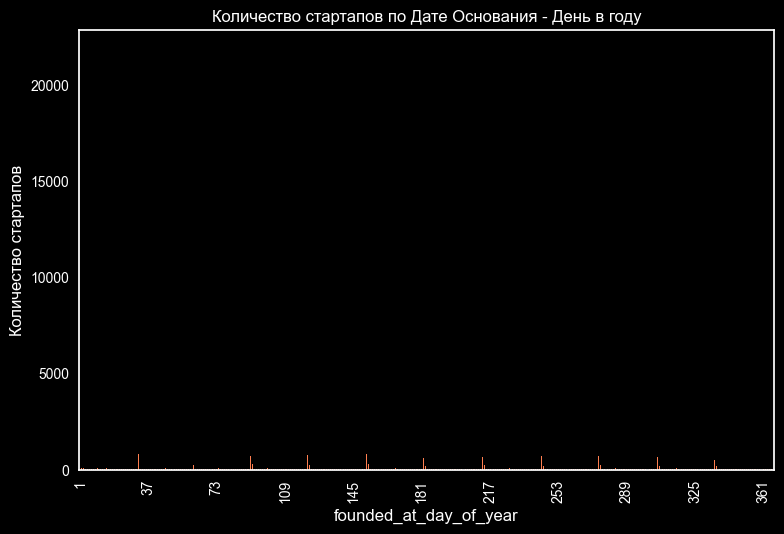

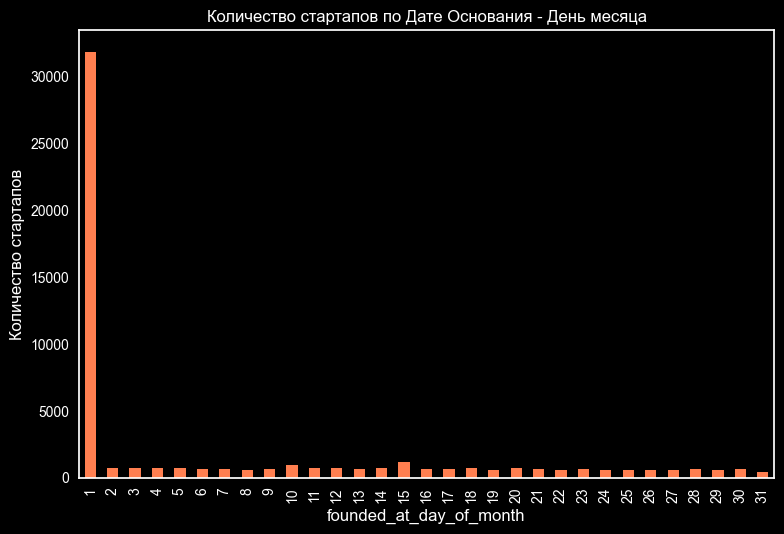

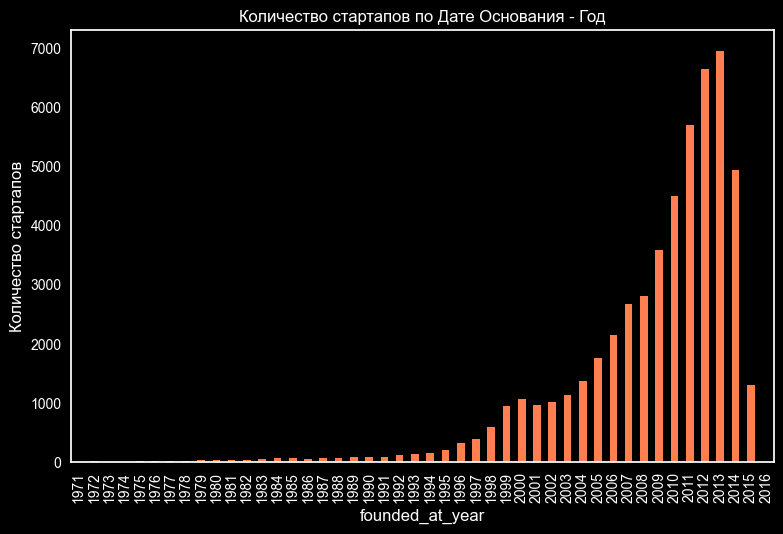

- Дата Первого финансирования

-- Доля закрывшихся стартапов



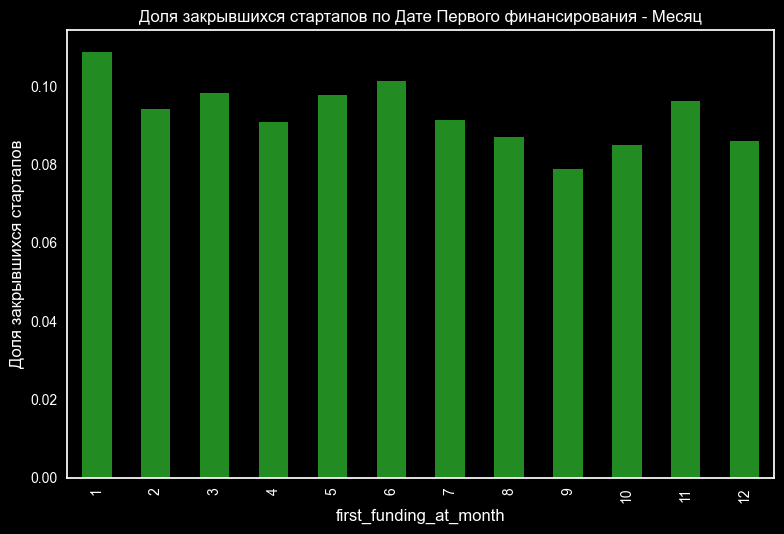

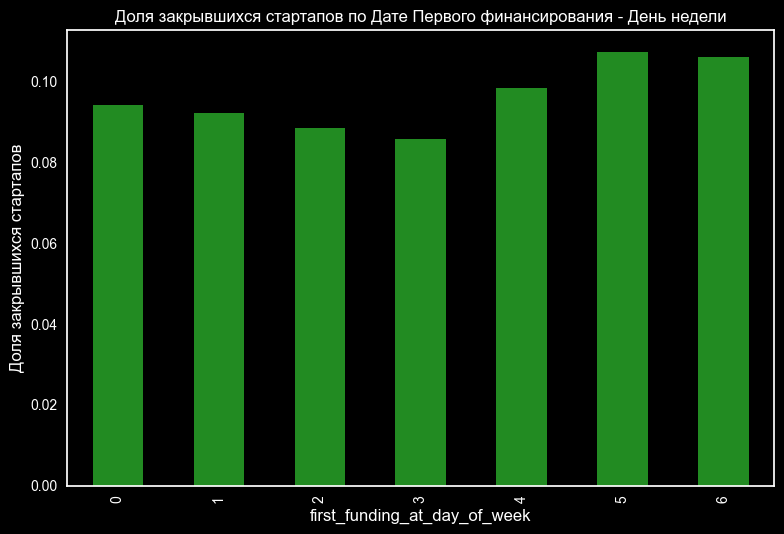

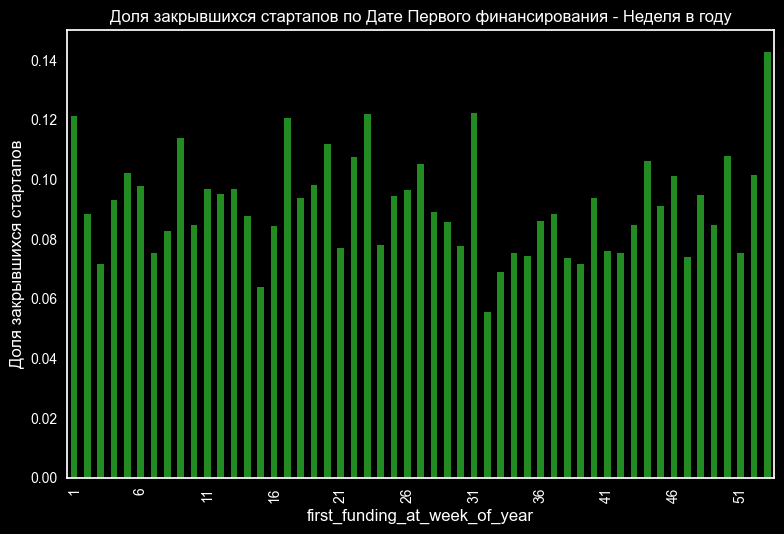

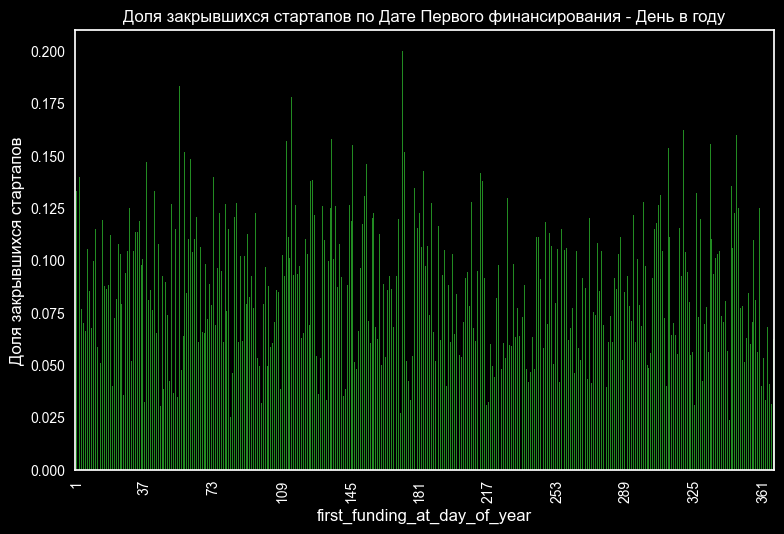

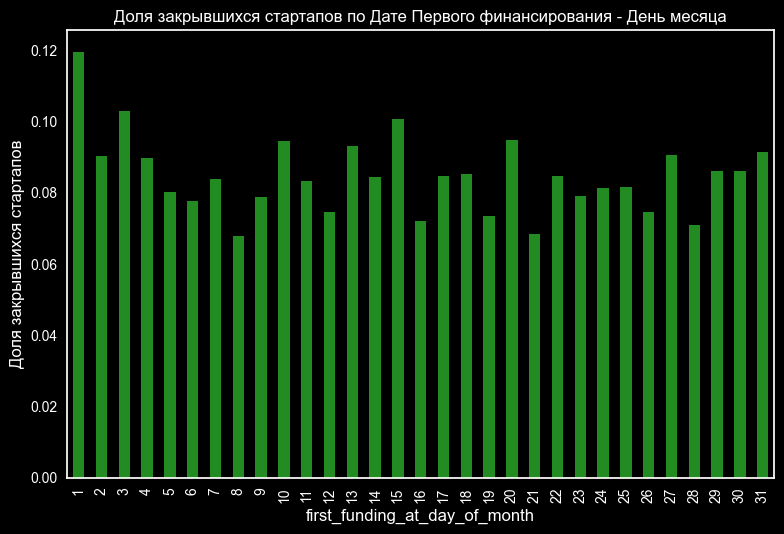

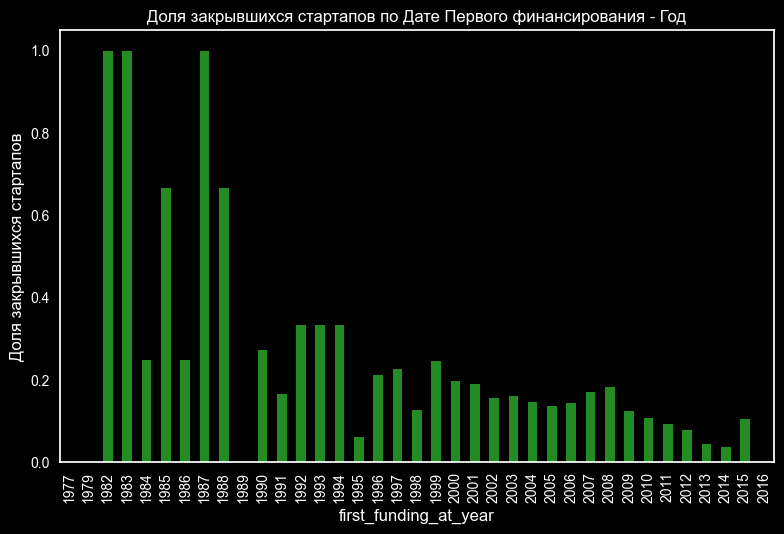

-- Количество стартапов



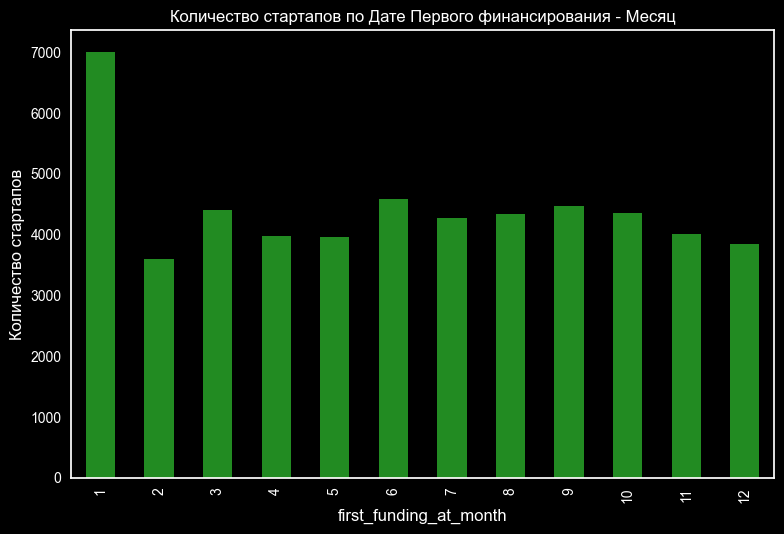

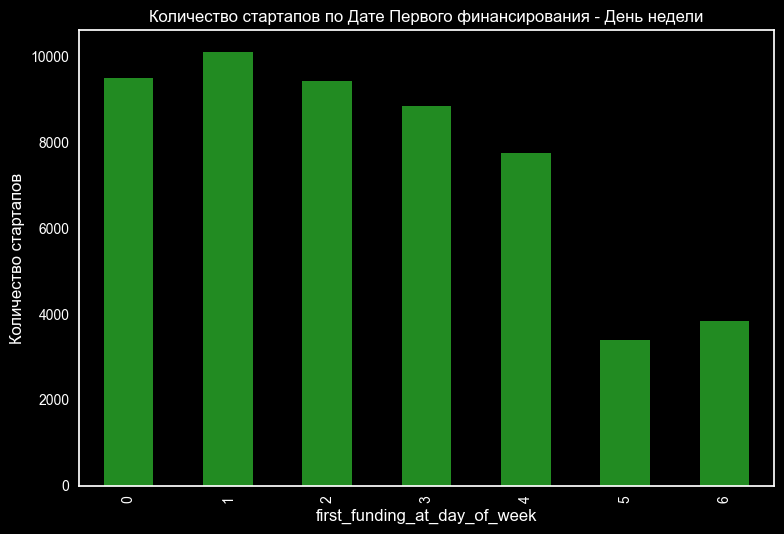

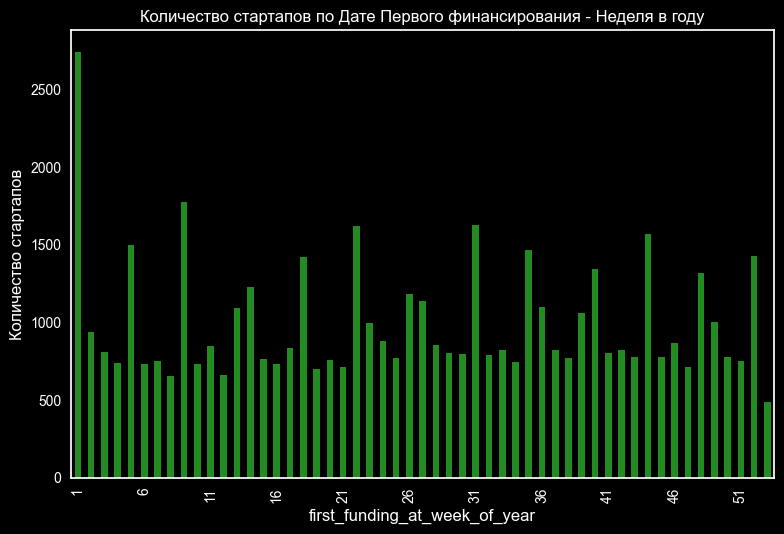

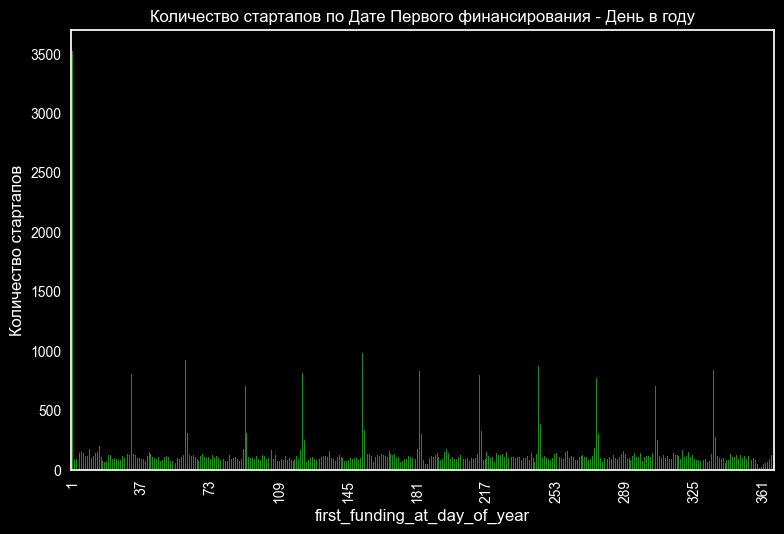

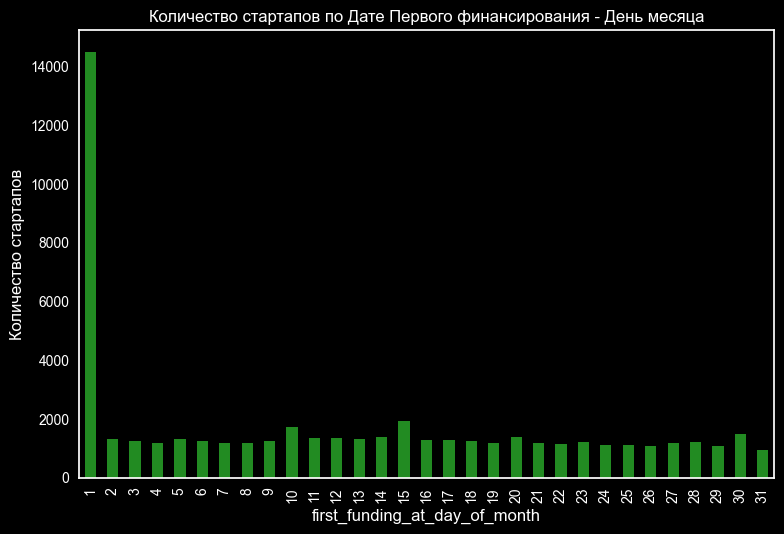

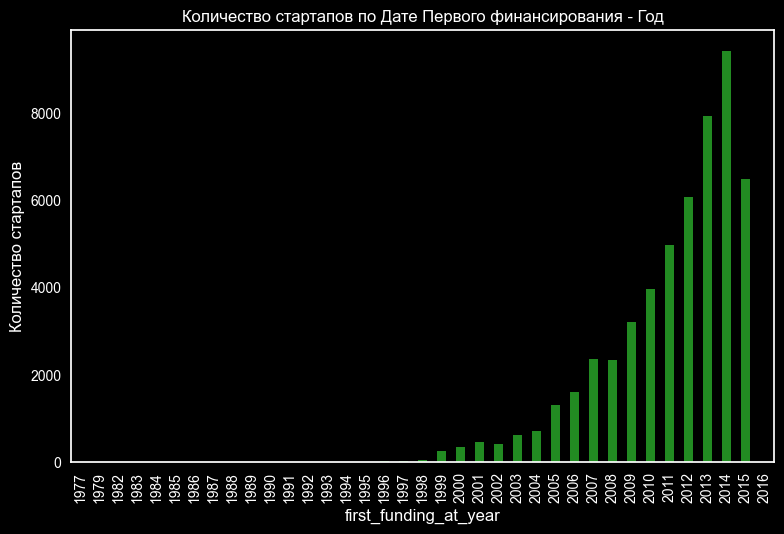

- Дата Последнего финансирования

-- Доля закрывшихся стартапов



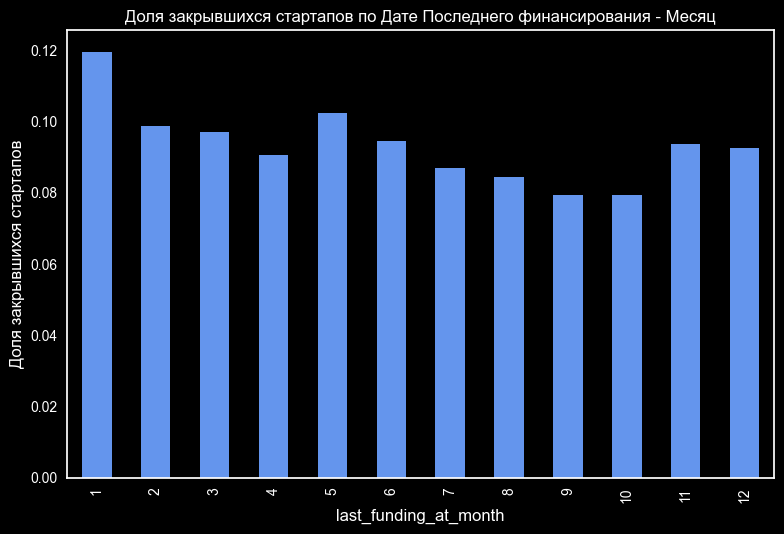

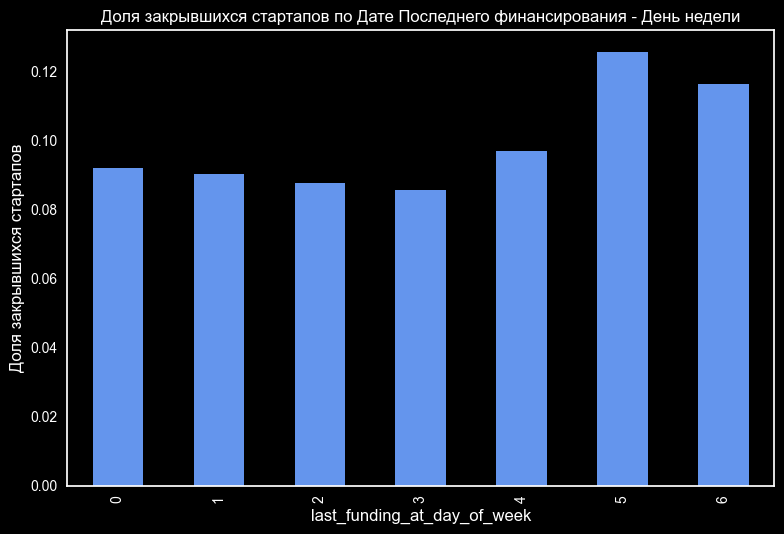

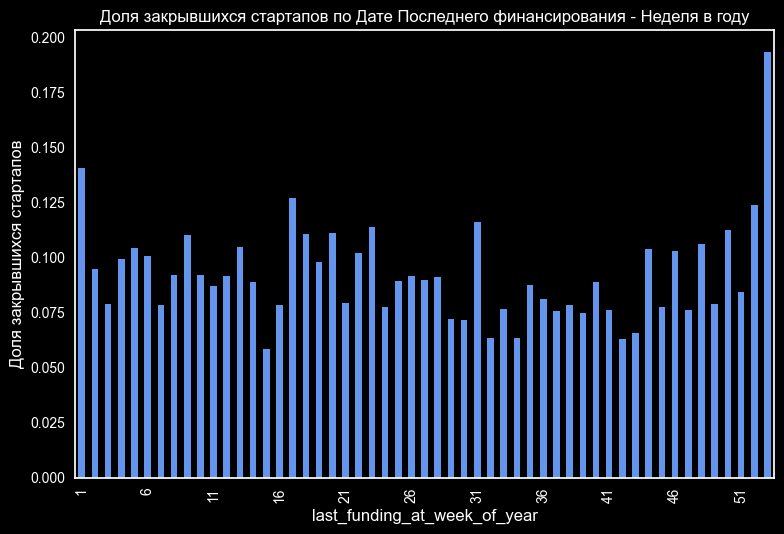

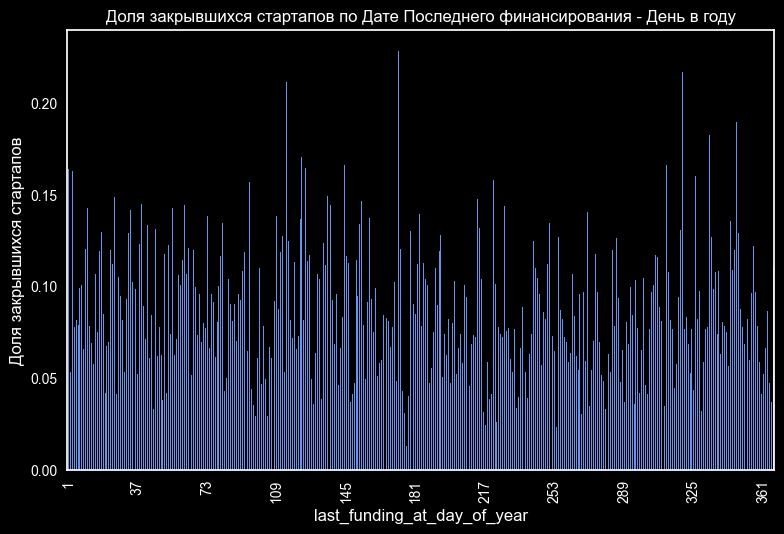

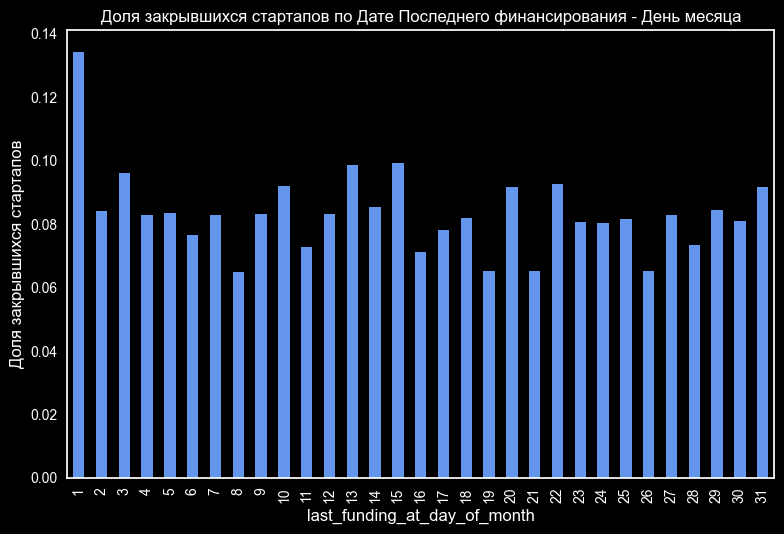

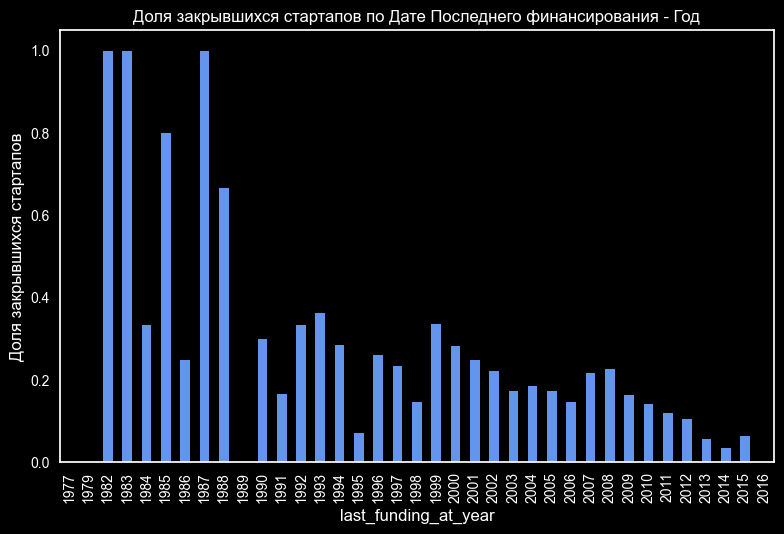

-- Количество стартапов



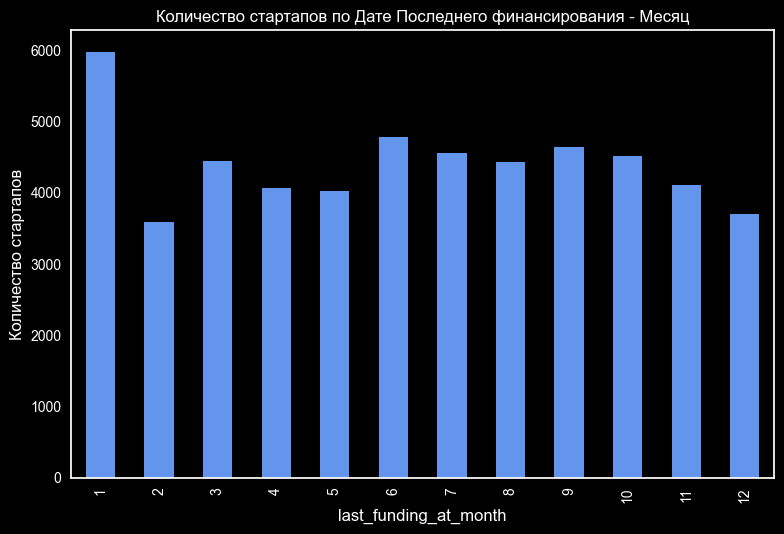

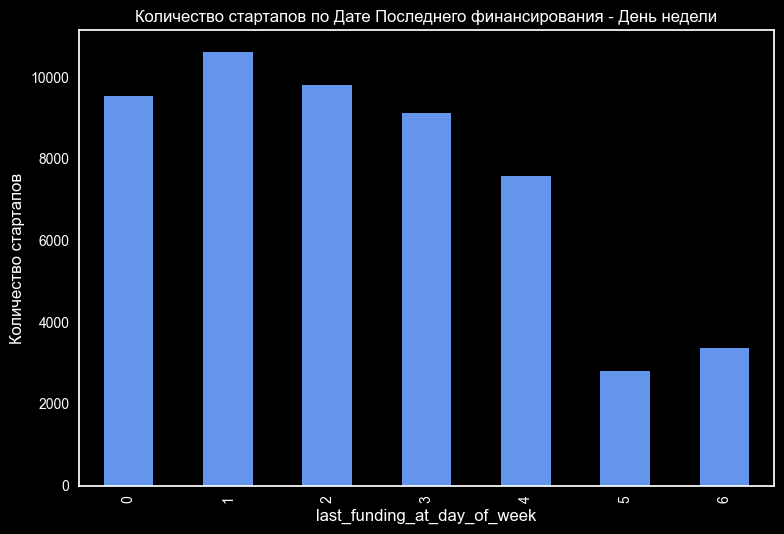

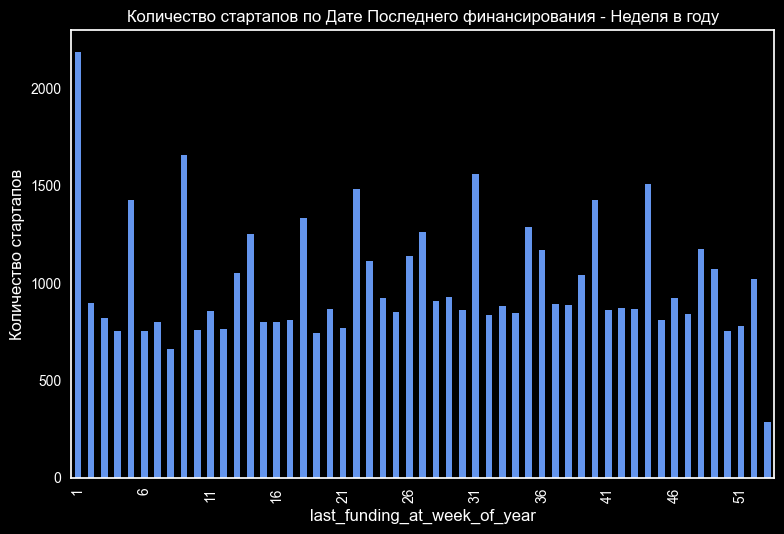

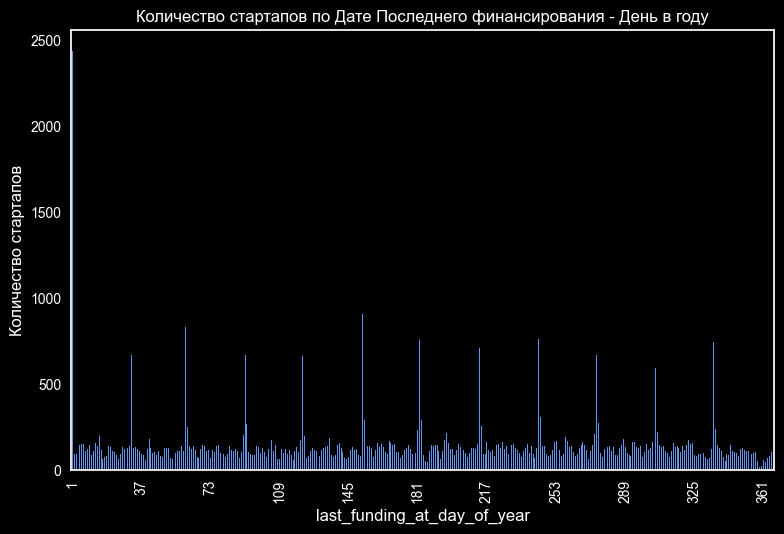

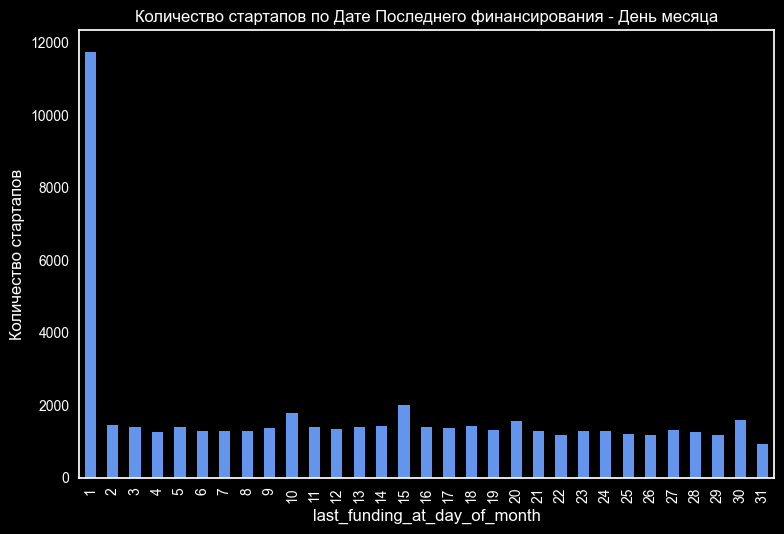

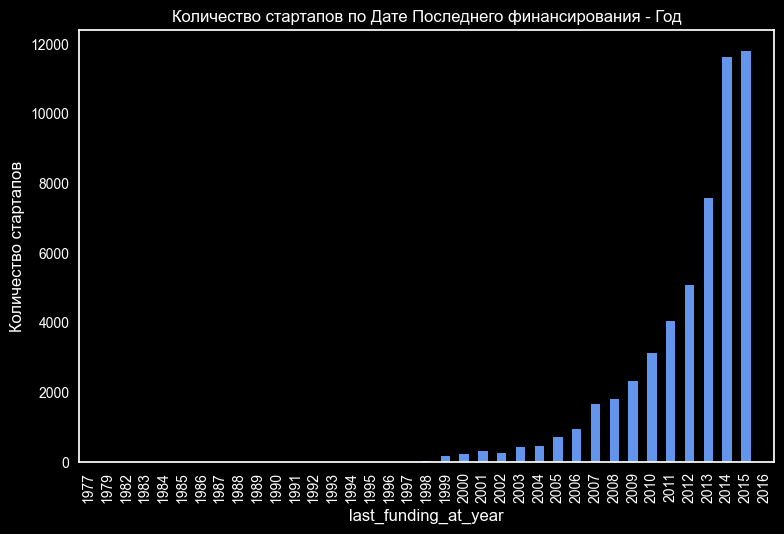

In [61]:
translate_cols = ['Основания','Первого финансирования','Последнего финансирования']
translate_features = ['Месяц','День недели','Неделя в году','День в году', 'День месяца','Год']
titles = ['Доля закрывшихся стартапов', 'Количество стартапов']
funcs = ['mean','count']
colors = ['coral','forestgreen','cornflowerblue']

print(f'Визуализация количества всех стартапов и доли закрытых стратапов по признакам даты')
print()
for n, date_culumn,translate,color in zip(range(len(date_columns[:-1])),
                                    date_columns[:-1],
                                    translate_cols,
                                    colors):
    print(f'- Дата {translate}')
    print()
    for func,title in zip(funcs,titles):
        print(f'-- {title}')
        print()
        for col,date_tranlate in zip(new_dates_columns[6*n:6*n+6],
                                     translate_features):

            groupbed_data = (dates_data.query(f'{date_culumn} > "1971" and {date_culumn} < "2018"')
                                        .groupby(col)['is_closed']
                                        .agg(func))
            groupbed_data.plot(kind='bar',grid=False,color=color)
            
            plt.title(f'{title} по Дате {translate} - {date_tranlate}')
            plt.ylabel(title)
            if groupbed_data.shape[0] > 50:
                step = max(len(groupbed_data) // 10, 1)
                plt.xticks(range(0, len(groupbed_data), step), groupbed_data.index[::step])
            plt.tight_layout()
            plt.show()

### Другие признаки

Столбец 'name', содержащий названия стартапов, заслуживает упоминания. На первый взгляд, он не кажется важным для обучения модели, однако необходимо учитывать его потенциальное влияние как текстового признака. Существует вероятность того, что успешность стартапа может быть связана с его названием как с результатом маркетинга. Однако, предполагается, что название будет сильно коррелировать с категориями из столбца 'category_list'. В контексте данного исследования я решил исключить использование этого признака, однако оставляю возможность включения его в дальнейшем для улучшения проекта и более глубокого анализа.

# Предобработка

## Пропуски

In [62]:
for data,name in zip(datasets,dataset_names):
    missing_values = data.isnull().sum()
    print(f"{name} Пропущенные значения по признакам:")
    display(missing_values[missing_values > 0])

Обучающая выборка Пропущенные значения по признакам:


name                     1
funding_total_usd    10126
dtype: int64

Тестовая выборка Пропущенные значения по признакам:


funding_total_usd    2595
dtype: int64

In [63]:
df.loc[df.funding_total_usd.isna() == True, df.columns[:13]]

name    category_list  funding_total_usd     status  \
4      WireTough Cylinders    Manufacturing                NaN  operating   
10             Indie Vinos         Software                NaN  operating   
16                Salesjob          unknown                NaN     closed   
24                 Savasti          unknown                NaN     closed   
25               Brightree         Software                NaN  operating   
...                    ...              ...                ...        ...   
52862           StockRadar  Finance|FinTech                NaN  operating   
52865                Zura!       E-Commerce                NaN  operating   
52870    Proactive Comfort          Medical                NaN  operating   
52871            ScramCard          unknown                NaN  operating   
52874          Videostream    Entertainment                NaN  operating   

      country_code state_code            region           city  \
4              USA         VA        VA - Other        Bristol   
10             USA         OR  Portland, Oregon       Portland   
16         unknown    unknown           unknown        unknown   
24         unknown    unknown           unknown        unknown   
25             USA         GA           Atlanta  Lawrenceville   
...            ...        ...               ...            ...   
52862          CHN         22           Beijing        Beijing   
52865          BRA         27       BRA - Other         Brasil   
52870          USA         MD         Baltimore    Centreville   
52871          HKG    unknown         Hong Kong      Hong Kong   
52874          CAN         ON           Toronto      Kitchener   

       funding_rounds founded_at first_funding_at last_funding_at  closed_at  
4                   1 2011-03-05       2012-02-01      2012-02-01 2018-01-01  
10                  1 2009-01-01       2013-04-21      2013-04-21 2018-01-01  
16                  1 2013-01-01       2013-10-22      2013-10-22 2015-01-01  
24                  1 2015-01-01       2015-01-01      2015-01-01 2016-05-01  
25                  1 2006-09-13       2008-07-15      2008-07-15 2018-01-01  
...               ...        ...              ...             ...        ...  
52862               3 2011-01-01       2011-12-01      2015-09-22 2018-01-01  
52865               1 2006-06-15       2008-01-01      2008-01-01 2018-01-01  
52870               1 2009-10-16       2011-01-20      2011-01-20 2018-01-01  
52871               1 2013-01-01       2015-11-20      2015-11-20 2018-01-01  
52874               1 2012-01-01       2014-03-01      2014-03-01 2018-01-01  

[10126 rows x 13 columns]

Пропуски будем обрабатывать в pipline, заменяя их на фиксированные значения.

# Матрица корреляций

In [64]:
import phik
from phik.report import plot_correlation_matrix

In [65]:
%%time
%%chime

df.funding_total_usd.fillna(-1, inplace=True)
df.name.fillna('unknown', inplace=True)

phik_overview = df.sample(1000).phik_matrix()

interval columns not set, guessing: ['funding_total_usd', 'funding_rounds', 'lifetime', 'founded_to_first_funding', 'first_to_last_funding', 'first_to_closed', 'last_to_closed']
CPU times: total: 797 ms
Wall time: 3min 3s


## Матрица всех признаков

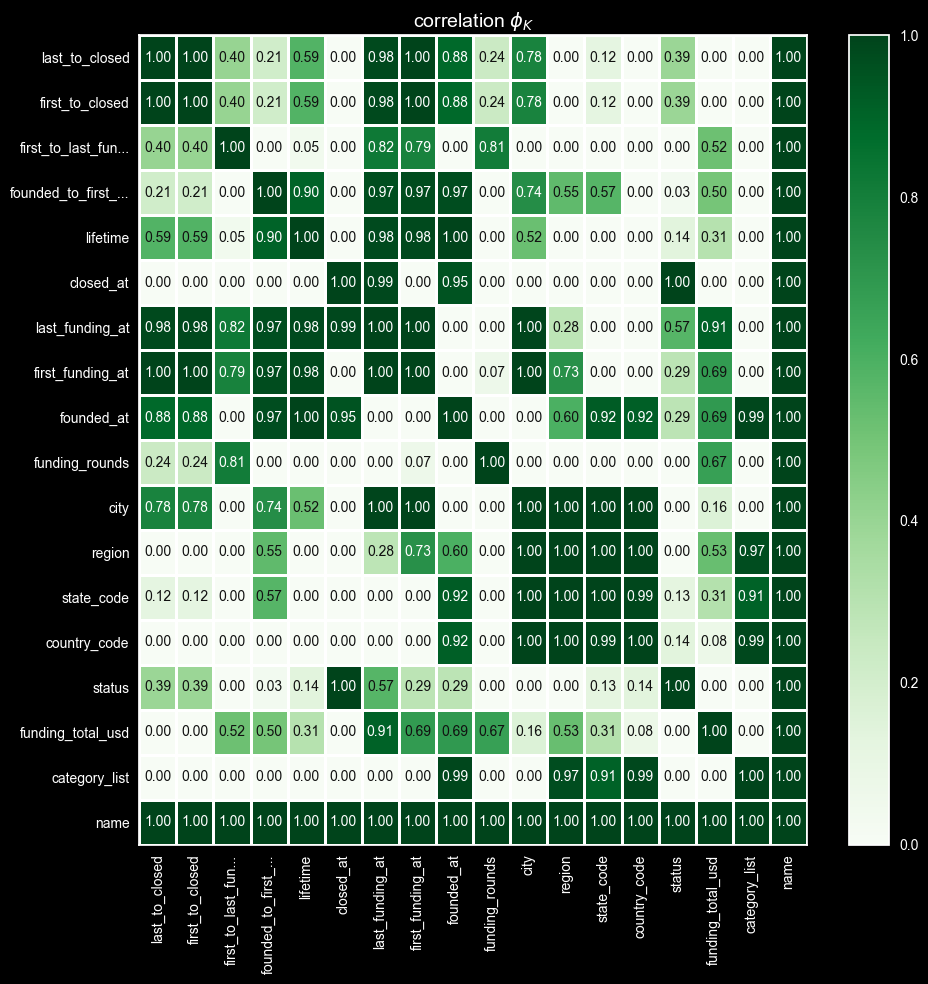

In [66]:
plot_correlation_matrix(phik_overview.values, x_labels=phik_overview.columns, y_labels=phik_overview.index, 
                        vmin=0, vmax=1, color_map='Greens', title=r'correlation $\phi_K$', fontsize_factor=1,
                        figsize=(10,10))
plt.tight_layout()

## Только с целевым признаком

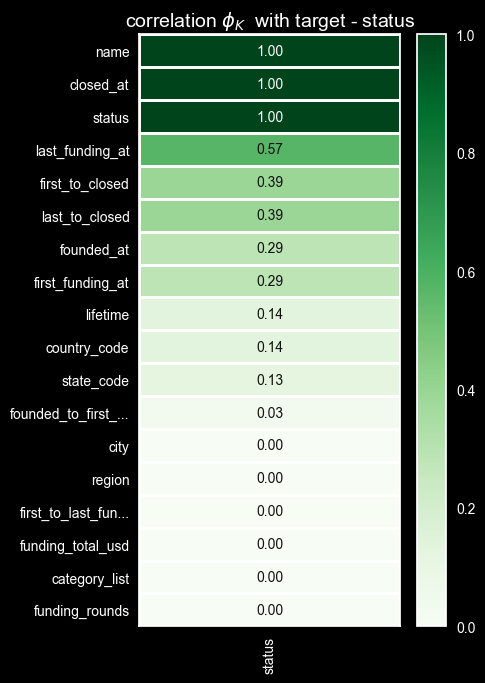

In [67]:
phik_only_status = phik_overview[[target]].sort_values(ascending=True,by=target)
plot_correlation_matrix(phik_only_status.values, x_labels=phik_only_status.columns, y_labels=phik_only_status.index, 
                        vmin=0, vmax=1, color_map='Greens', title=r'correlation $\phi_K$  with target - status', 
                        fontsize_factor=1, figsize=(5,7))
plt.tight_layout()

## Новые признаки даты

In [68]:
%%time
%%chime

dates_data.funding_total_usd.fillna(-1, inplace=True)
dates_data.name.fillna('unknown', inplace=True)

phik_new_dates = dates_data.iloc[:,2:].sample(1000).phik_matrix()

interval columns not set, guessing: ['funding_total_usd', 'funding_rounds', 'lifetime', 'founded_to_first_funding', 'first_to_last_funding', 'first_to_closed', 'last_to_closed', 'founded_at_month', 'founded_at_day_of_week', 'founded_at_week_of_year', 'founded_at_day_of_year', 'founded_at_day_of_month', 'founded_at_year', 'first_funding_at_month', 'first_funding_at_day_of_week', 'first_funding_at_week_of_year', 'first_funding_at_day_of_year', 'first_funding_at_day_of_month', 'first_funding_at_year', 'last_funding_at_month', 'last_funding_at_day_of_week', 'last_funding_at_week_of_year', 'last_funding_at_day_of_year', 'last_funding_at_day_of_month', 'last_funding_at_year', 'is_closed']


CPU times: total: 1.16 s
Wall time: 2min 23s


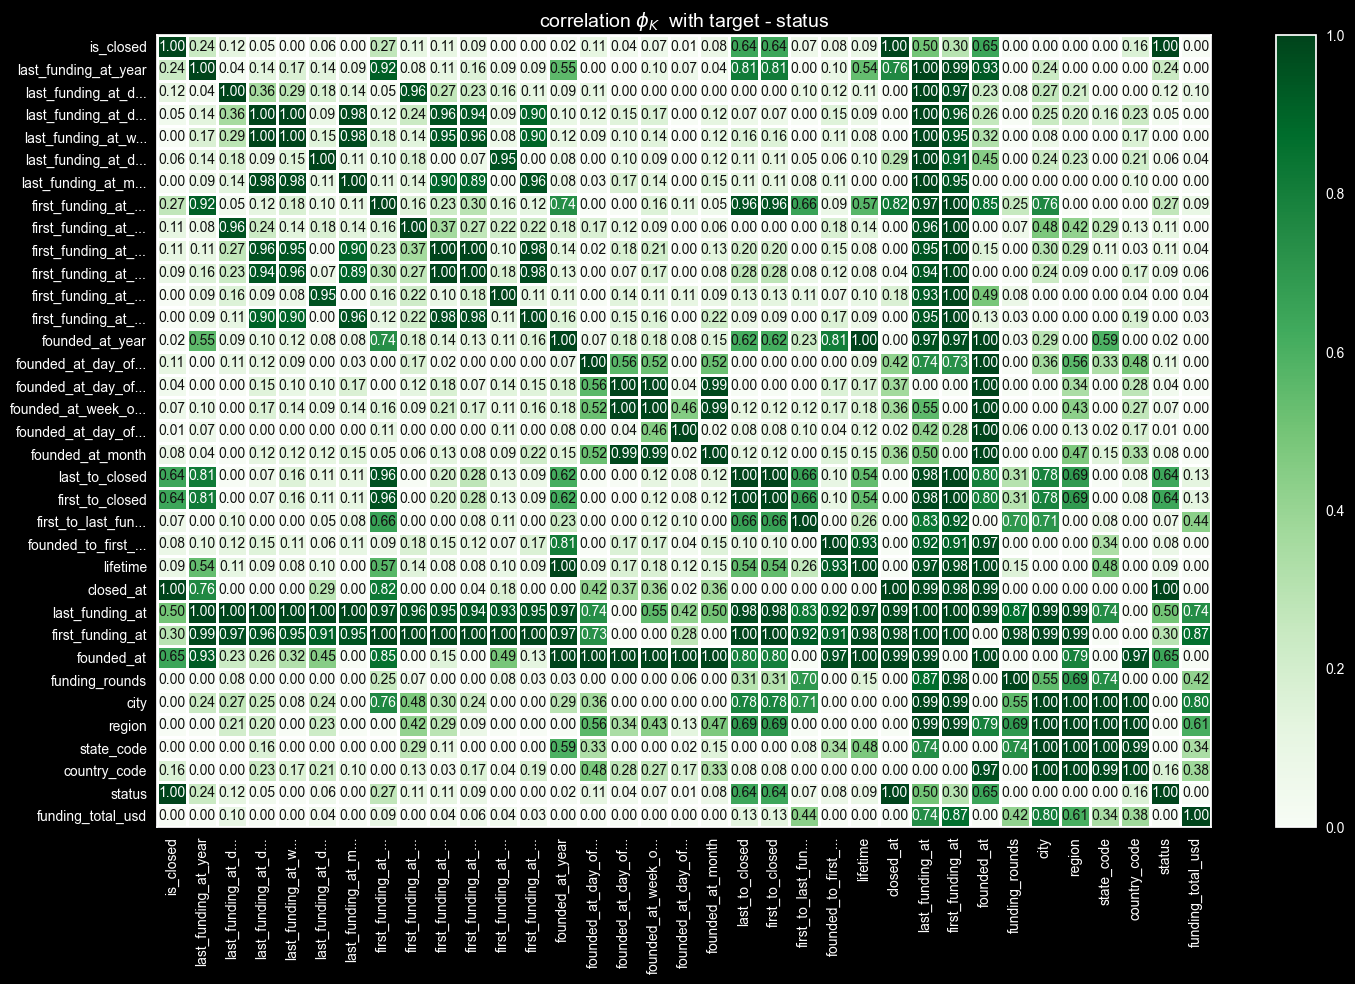

In [69]:
plot_correlation_matrix(phik_new_dates.values, x_labels=phik_new_dates.columns, y_labels=phik_new_dates.index, 
                        vmin=0, vmax=1, color_map='Greens', title=r'correlation $\phi_K$  with target - status', 
                        fontsize_factor=1, figsize=(15,10))

plt.tight_layout()

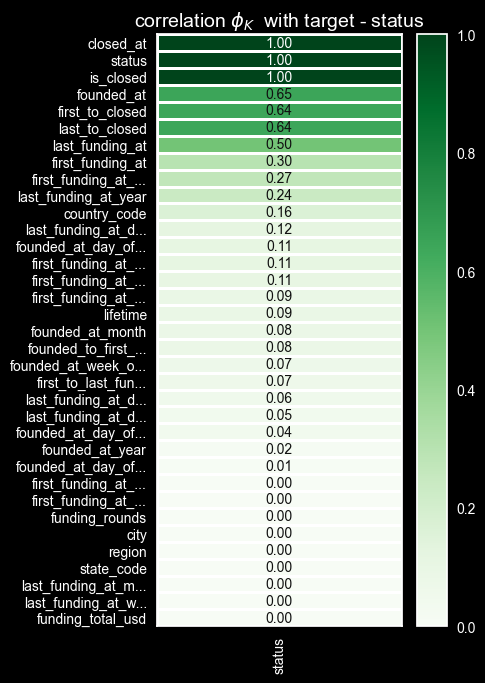

In [70]:
phik_new_dates_status = phik_new_dates[[target]].sort_values(ascending=True,by=target)
plot_correlation_matrix(phik_new_dates_status.values, x_labels=phik_new_dates_status.columns, y_labels=phik_new_dates_status.index, 
                        vmin=0, vmax=1, color_map='Greens', title=r'correlation $\phi_K$  with target - status', 
                        fontsize_factor=1, figsize=(5,7))
plt.tight_layout()

- Признаки даты и географии (страна, штат, регион, город) имеют сильную корреляцию в своих категориях, возможно стоит рассмотреть удаление не эффективных признаков
- Сильнее всего с таргетом коррелируют разница в днях между датой (первого или последнего) финансирования и датой выгрузки.

## Закодированный category_list

In [71]:
import category_encoders as ce

# Создание объекта TargetEncoder
encoder = ce.TargetEncoder(cols=['category_list'])

In [72]:
categories = df[['category_list']+[target]]
categories['category_list_encoded'] = encoder.fit_transform(X=categories['category_list'],
                                                            y=(categories[target] == 'closed')*1)

In [73]:
categories

category_list     status  \
0             Online Reservations|Restaurants  operating   
1       Manufacturing|Medical|Medical Devices  operating   
2                               Biotechnology  operating   
3                                 Health Care  operating   
4                               Manufacturing  operating   
...                                       ...        ...   
52874                           Entertainment  operating   
52875                             Hospitality  operating   
52876   Email|Messaging|Productivity Software  operating   
52877                                Security  operating   
52878  Online Rental|Parking|Price Comparison  operating   

       category_list_encoded  
0                   0.081628  
1                   0.095494  
2                   0.063764  
3                   0.081333  
4                   0.043974  
...                      ...  
52874               0.032009  
52875               0.038596  
52876               0.080526  
52877               0.075235  
52878               0.081628  

[52879 rows x 3 columns]

In [74]:
%%time
%%chime

phik_overview = (categories[['category_list_encoded',target]].sample(1000)
                 .phik_matrix().sort_values(ascending=True,by=target))

interval columns not set, guessing: ['category_list_encoded']
CPU times: total: 15.6 ms
Wall time: 43 ms


In [75]:
phik_overview

category_list_encoded    status
category_list_encoded               1.000000  0.718351
status                              0.718351  1.000000

- Так же высокую корреляцию показывает список категорий, закодированный с помощью TargetEncoder

## Корреляция гео признаков и таргета

In [78]:
categorical_columns

['country_code', 'state_code', 'region', 'city']

In [82]:
%%time
%%chime

phik_overview = (df[categorical_columns+[target]].sample(1000)
                 .phik_matrix().sort_values(ascending=True,by=target))

CPU times: total: 93.8 ms
Wall time: 8.88 s


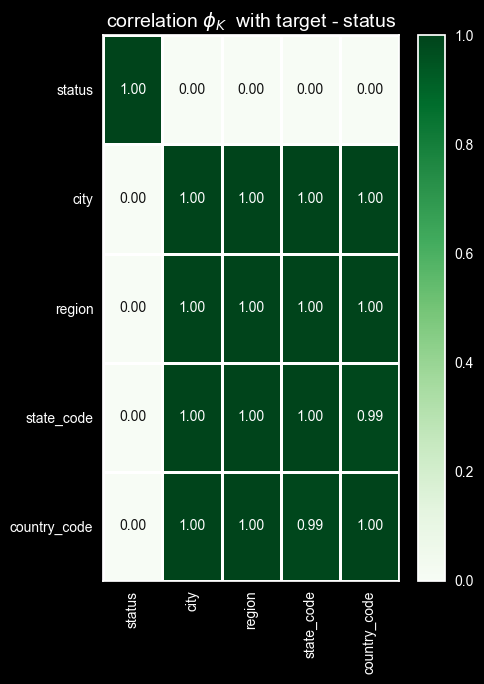

In [83]:
plot_correlation_matrix(phik_overview.values, x_labels=phik_overview.columns, y_labels=phik_overview.index, 
                        vmin=0, vmax=1, color_map='Greens', title=r'correlation $\phi_K$  with target - status', 
                        fontsize_factor=1, figsize=(5,7))
plt.tight_layout()

# Обучение модели

Задаю random_state для возможности повторного эксперемента.

In [76]:
S = 100500

## Обучение и выбор модели на кросс-валидации при помощи Pycaret.

In [85]:
categorical_features = ['category_list'] + categorical_columns 
ignore_features = ['name'] + date_columns

train = df.drop(ignore_features,axis=1)
train[target] = (train[target] == 'closed') * 1

train.sample(3)

category_list  funding_total_usd  \
9421   Entertainment|Internet Radio Market|Location B...          9750000.0   
28748          Big Data|Electronics|Predictive Analytics          2000000.0   
974    Credit|Developer APIs|E-Commerce|E-Commerce Pl...        282074000.0   

       status country_code state_code      region               city  \
9421        0          USA         CT  CT - Other  South Glastonbury   
28748       0          USA         IL     Chicago            Chicago   
974         0      unknown    unknown     unknown            unknown   

       funding_rounds  lifetime  founded_to_first_funding  \
9421                2      3287                      1162   
28748               1      1615                       397   
974                 6      4707                       -41   

       first_to_last_funding  first_to_closed  last_to_closed  
9421                     753             2125            2125  
28748                      0             1218            1218  
974                     3359             4748            4748

### Без информации о датах

In [176]:
%%time
%%chime

experement = setup(train,target = target,train_size = 0.8,fold=5, categorical_imputation = 'unknown',
                   numeric_imputation = -1, rare_to_value = 0.001, session_id=S,
                   categorical_features = categorical_features,max_encoding_ohe=1000)

CPU times: total: 21.1 s
Wall time: 27.7 s


In [177]:
%%time
%%chime

best_model = experement.compare_models(sort='AUC',exclude=['dummy','nb','svm','lr','lda','qda','knn','ridge'])

CPU times: total: 57.3 s
Wall time: 24min 17s


In [178]:
%%time
%%chime

final_model = experement.finalize_model(best_model)

CPU times: total: 1min 10s
Wall time: 1min 11s


In [179]:
final_model

Pipeline(memory=Memory(location=None),
         steps=[('numerical_imputer',
                 TransformerWrapper(exclude=None,
                                    include=['funding_total_usd',
                                             'funding_rounds', 'lifetime',
                                             'founded_to_first_funding',
                                             'first_to_last_funding',
                                             'first_to_closed',
                                             'last_to_closed'],
                                    transformer=SimpleImputer(add_indicator=False,
                                                              copy=True,
                                                              fill_value=-1,
                                                              keep_empty_features=False,
                                                              missing_valu...
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=-1,
                               num_parallel_tree=None,
                               objective='binary:logistic', ...))],
         verbose=False)

0.9918765231519091
              precision    recall  f1-score   support

      closed       0.99      0.99      0.99      1233
   operating       1.00      1.00      1.00     11977

    accuracy                           1.00     13210
   macro avg       1.00      0.99      1.00     13210
weighted avg       1.00      1.00      1.00     13210



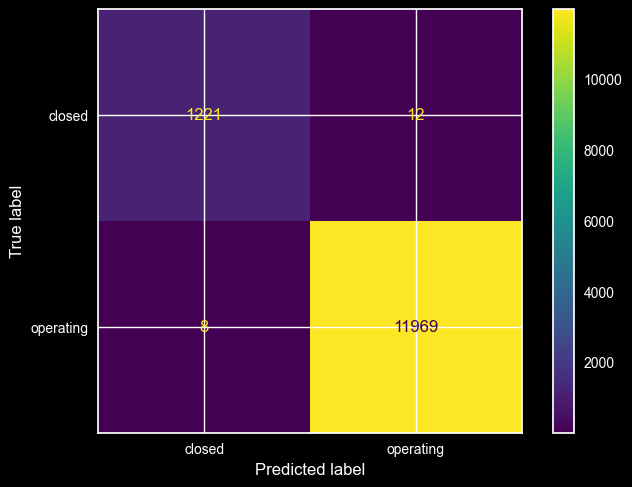

In [244]:
plt.style.use('dark_background')

predict = final_model.predict(X_test.drop(ignore_features,axis=1))
pred = np.where(predict==1, 'closed', 'operating').tolist()
print(f1_score(y_test[target], pred, pos_label='closed'))
print(classification_report(y_test[target], pred))
ConfusionMatrixDisplay.from_predictions(y_test[target], pred)

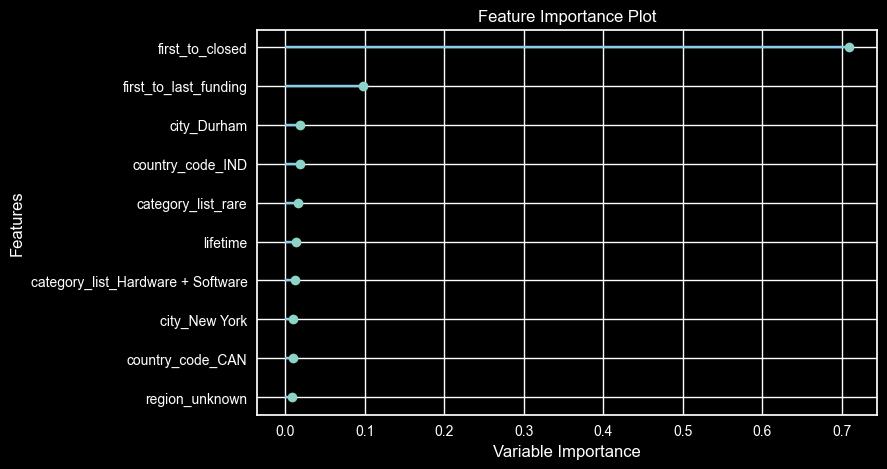

In [245]:
experement.plot_model(best_model,'feature')

- Самым важным признаком с важностью 0.7 -  количество дней между первым раундом финансирования и датой получения послежней информации. 

- Второй по важности признак с важностью 0.1 - количество дней между первым и последним раундом финансирования.

In [246]:
submit_predict = pd.DataFrame()
submit_predict['name'] = X_test['name']
submit_predict['status'] = pred
submit_predict.to_csv('submit_prediction_01.csv', index=False)
experement.save_experiment('experement_without_dates')
experement.save_model(final_model,'model_without_dates')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['funding_total_usd',
                                              'funding_rounds', 'lifetime',
                                              'founded_to_first_funding',
                                              'first_to_last_funding',
                                              'first_to_closed',
                                              'last_to_closed'],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               copy=True,
                                                               fill_value=-1,
                                                               keep_empty_features=False,
                                                               missing_valu...
                                importance_type

### С добавлением информации о годах

Этот вариант должен показать более точные результаты при предсказании на kaggle в рамках соревнования. Но так как в реальных данных у нас не будет старых дат, то этот признак может оказаться не эффектнивным при предсказании новых стартапов, открывшихся после 2019 г. Зато более точно определит к примеру стартапы закрывшыиеся из-за бума доткомов в 2000 г.

In [86]:
base_df = df.copy()

In [87]:
for data in datasets:
    for feature in date_columns[:-1]:
        data[f'{feature}_month'] = data[feature].dt.month
        data[f'{feature}_day_of_week'] = data[feature].dt.dayofweek
        data[f'{feature}_week_of_year'] = data[feature].dt.isocalendar().week
        data[f'{feature}_day_of_year'] = data[feature].dt.dayofyear
        data[f'{feature}_day_of_month'] = data[feature].dt.day
        data[f'{feature}_year'] = data[feature].dt.year

In [88]:
train = df.drop(ignore_features,axis=1)
train[target] = (train[target] == 'closed') * 1

train.sample(3)

category_list  funding_total_usd  \
38640  Information Services|Information Technology|Te...         31568890.0   
49202                                     Semiconductors         14920000.0   
48883             Apps|E-Commerce|Mobile|Mobile Commerce          1350000.0   

       status country_code state_code            region              city  \
38640       1      unknown    unknown           unknown           unknown   
49202       0          USA         CO  Colorado Springs  Colorado Springs   
48883       0          USA         TX            Austin            Austin   

       funding_rounds  lifetime  founded_to_first_funding  ...  \
38640               1       553                         0  ...   
49202               2     11688                      7303  ...   
48883               3      1918                       266  ...   

       first_funding_at_week_of_year  first_funding_at_day_of_year  \
38640                              1                             1   
49202                             52                           364   
48883                             26                           175   

       first_funding_at_day_of_month  first_funding_at_year  \
38640                              1                   1996   
49202                             30                   2005   
48883                             24                   2013   

       last_funding_at_month  last_funding_at_day_of_week  \
38640                      1                            0   
49202                      9                            4   
48883                      7                            1   

       last_funding_at_week_of_year  last_funding_at_day_of_year  \
38640                             1                            1   
49202                            38                          265   
48883                            29                          196   

       last_funding_at_day_of_month  last_funding_at_year  
38640                             1                  1996  
49202                            22                  2006  
48883                            15                  2014  

[3 rows x 31 columns]

In [249]:
%%time
%%chime

experement = setup(train,target = target,train_size = 0.8,fold=5,categorical_imputation = 'unknown',
                   numeric_imputation = -1, rare_to_value = 0.001, session_id=S,
                   categorical_features = categorical_features,max_encoding_ohe=1000)

CPU times: total: 1min 8s
Wall time: 1min 24s


In [250]:
%%time
%%chime

best_model = experement.compare_models(sort='AUC',exclude=['dummy','nb','svm','lr','lda','qda','knn','ridge'])

Initiated  . . . . . . . . . . . . . . . . . .                  20:18:17
Status     . . . . . . . . . . . . . . . . . .         Loading Estimator
Estimator  . . . . . . . . . . . . . . . . . .  Decision Tree Classifier

CPU times: total: 53.6 s
Wall time: 28min 43s


In [251]:
%%time
%%chime

final_model = experement.finalize_model(best_model)

CPU times: total: 1min 20s
Wall time: 1min 33s


In [252]:
final_model

Pipeline(memory=Memory(location=None),
         steps=[('numerical_imputer',
                 TransformerWrapper(exclude=None,
                                    include=['funding_total_usd',
                                             'funding_rounds', 'lifetime',
                                             'founded_to_first_funding',
                                             'first_to_last_funding',
                                             'first_to_closed',
                                             'last_to_closed',
                                             'founded_at_month',
                                             'founded_at_day_of_week',
                                             'founded_at_week_of_year',
                                             'founded_at_day_of_year',
                                             'founded_at_da...
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=-1,
                               num_parallel_tree=None,
                               objective='binary:logistic', ...))],
         verbose=False)

0.9983753046303818
              precision    recall  f1-score   support

      closed       1.00      1.00      1.00      1233
   operating       1.00      1.00      1.00     11977

    accuracy                           1.00     13210
   macro avg       1.00      1.00      1.00     13210
weighted avg       1.00      1.00      1.00     13210



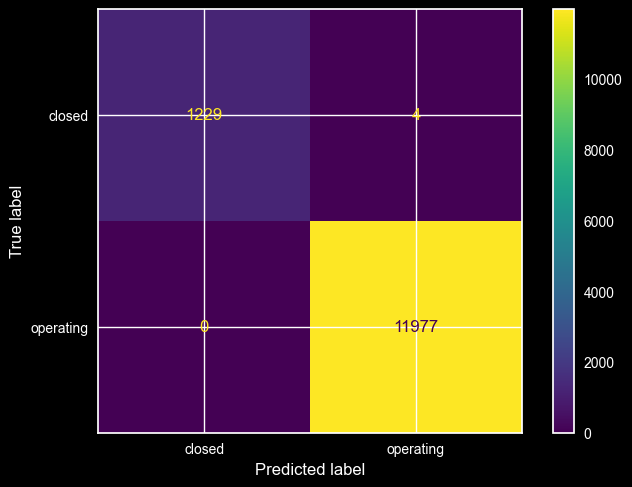

In [253]:
plt.style.use('dark_background')

predict = final_model.predict(X_test.drop(ignore_features,axis=1))
pred = np.where(predict==1, 'closed', 'operating').tolist()
print(f1_score(y_test[target], pred, pos_label='closed'))
print(classification_report(y_test[target], pred))
ConfusionMatrixDisplay.from_predictions(y_test[target], pred)

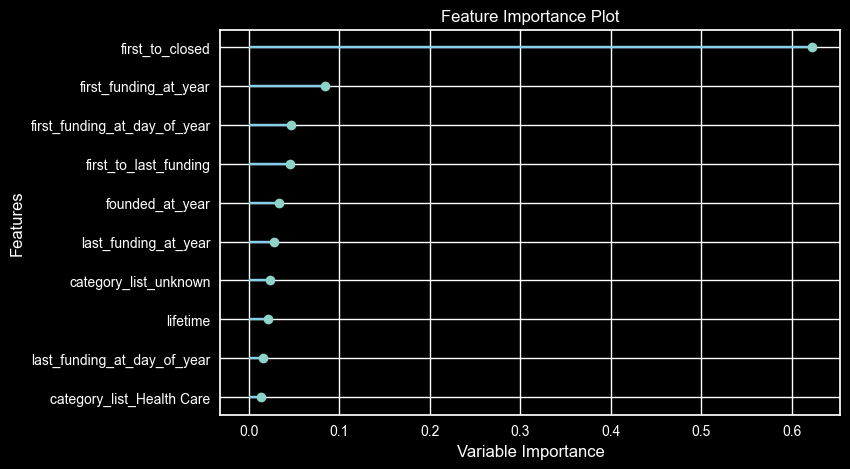

In [254]:
experement.plot_model(best_model,'feature')

Как и предполагалось информация о датах улучшила целевую метрику f1.

In [255]:
submit_predict = pd.DataFrame()
submit_predict['name'] = X_test['name']
submit_predict['status'] = pred
submit_predict.to_csv('submit_prediction_02.csv', index=False)
experement.save_experiment('experement_with_dates')
experement.save_model(final_model,'model_with_dates')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['funding_total_usd',
                                              'funding_rounds', 'lifetime',
                                              'founded_to_first_funding',
                                              'first_to_last_funding',
                                              'first_to_closed',
                                              'last_to_closed',
                                              'founded_at_month',
                                              'founded_at_day_of_week',
                                              'founded_at_week_of_year',
                                              'founded_at_day_of_year',
                                              'founded_at_da...
                                importance_type=None,
                                interaction_constrai

### С упрощённой обработкой категориальных  признаков

In [89]:
%%time
%%chime

experement = setup(train,target = target, train_size = 0.8, fold=5, categorical_imputation = 'unknown',session_id=S)

CPU times: total: 3.97 s
Wall time: 4.53 s


In [90]:
%%time
%%chime

best_model = experement.compare_models(sort='AUC',exclude=['dummy','nb','svm','lr','lda','qda','knn','ridge'])

CPU times: total: 7.78 s
Wall time: 2min 43s


Целевые метрики остались высокими, время сократилось в 12 раз. Дальше буду использовать этот вариант.

In [92]:
%%time
%%chime

final_model = experement.finalize_model(best_model)

CPU times: total: 3.44 s
Wall time: 2.13 s


In [93]:
final_model

Pipeline(memory=Memory(location=None),
         steps=[('numerical_imputer',
                 TransformerWrapper(exclude=None,
                                    include=['funding_total_usd',
                                             'funding_rounds', 'lifetime',
                                             'founded_to_first_funding',
                                             'first_to_last_funding',
                                             'first_to_closed',
                                             'last_to_closed',
                                             'founded_at_month',
                                             'founded_at_day_of_week',
                                             'founded_at_week_of_year',
                                             'founded_at_day_of_year',
                                             'founded_at_da...
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=-1,
                               num_parallel_tree=None,
                               objective='binary:logistic', ...))],
         verbose=False)

0.9975629569455727
              precision    recall  f1-score   support

      closed       1.00      1.00      1.00      1234
   operating       1.00      1.00      1.00     11977

    accuracy                           1.00     13211
   macro avg       1.00      1.00      1.00     13211
weighted avg       1.00      1.00      1.00     13211



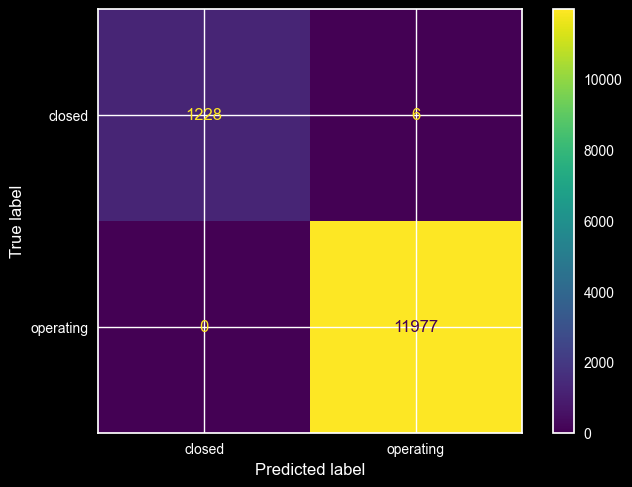

In [94]:
plt.style.use('dark_background')

predict = final_model.predict(X_test.drop(ignore_features,axis=1))
pred = np.where(predict==1, 'closed', 'operating').tolist()
print(f1_score(y_test[target], pred, pos_label='closed'))
print(classification_report(y_test[target], pred))
ConfusionMatrixDisplay.from_predictions(y_test[target], pred)

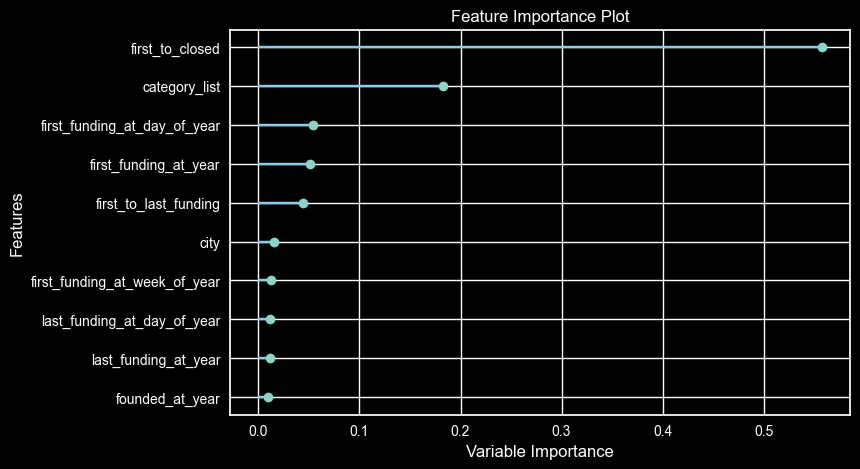

In [95]:
experement.plot_model(best_model,'feature')

Список категорий вышел на 2 место, но первое как и раньше занимает срок жизни.

### lifetime only

В качестве срока жизни рассмотрим:
- 1) время от закрытия до последней даты
- 2) время от первого рануда финансирования до последней даты

In [ ]:
lifetimes = ['lifetime','first_to_closed']

In [103]:
%%time
%%chime
cols = train.columns[:8].to_list()
lifetimes = ['lifetime','first_to_closed']

for lifetime_col in lifetimes:
    experement = setup(train[cols+[lifetime_col]],target = target, train_size = 0.8, fold=5,
                        categorical_imputation = 'unknown',session_id=S)

    best_model = experement.compare_models(sort='AUC',exclude=['dummy','nb','svm','lr','lda','qda','knn','ridge'])

CPU times: total: 1min
Wall time: 3min 36s


In [104]:
%%time
%%chime
cols = train.columns[:8].to_list()
lifetimes = ['lifetime','first_to_closed']

for lifetime_col in lifetimes:
    experement = setup(train[cols+[lifetime_col]],target = target, train_size = 0.8, fold=5,
                        categorical_imputation = 'unknown',session_id=S)

    best_model = experement.compare_models(sort='F1',exclude=['dummy','nb','svm','lr','lda','qda','knn','ridge'])

CPU times: total: 58.8 s
Wall time: 3min 14s


Использование first_to_closed и вправду показывает намного большую эффективность чем lifetime (F1 0.9 против 0.67)

### lifetime + перебор разницы дат.
Теперь выясним какие ещё признаки разницы дат оказывают большее влияние на метрику.

In [107]:
new_features_from_dates

['lifetime',
 'founded_to_first_funding',
 'first_to_last_funding',
 'first_to_closed',
 'last_to_closed']

In [111]:
for feature in new_features_from_dates:
    if feature != 'first_to_closed':
        print(feature)
        experement = setup(train[cols+['first_to_closed',feature]],target = target, train_size = 0.8, fold=5,
                            categorical_imputation = 'unknown',session_id=S,verbose=False)

        best_model = experement.compare_models(sort='F1',exclude=['dummy','nb','svm','lr','lda','qda','knn','ridge'])

lifetime


founded_to_first_funding


first_to_last_funding


last_to_closed


In [116]:
%%time
%%chime

for feature in new_dates_columns:
    print(feature)
    experement = setup(train[cols+['first_to_closed','first_to_last_funding',feature]],target = target, train_size = 0.8, fold=5,
                        categorical_imputation = 'unknown',session_id=S,verbose=False)
    best_model = experement.compare_models(sort='F1',include=['lightgbm','rf','xgboost'])

founded_at_month


founded_at_day_of_week


founded_at_week_of_year


founded_at_day_of_year


founded_at_day_of_month


founded_at_year


first_funding_at_month


first_funding_at_day_of_week


first_funding_at_week_of_year


first_funding_at_day_of_year


first_funding_at_day_of_month


first_funding_at_year


last_funding_at_month


last_funding_at_day_of_week


last_funding_at_week_of_year


last_funding_at_day_of_year


last_funding_at_day_of_month


last_funding_at_year


CPU times: total: 2min 19s
Wall time: 7min 58s


Самое сильное влияние из признаков информации о дате является "год первого финансирования" first_funding_at_year, что доводит метрику f1 до 0.9922, этот показатель практически равен показателю 0.9923, который достигался с помощью всех метрик.

### Перебор гео-признаков и их влияние на метрику.

In [120]:
categorical_columns

['country_code', 'state_code', 'region', 'city']

In [121]:
%%time
%%chime
best_dates = ['first_to_closed','first_to_last_funding','first_funding_at_year']
cols=['category_list','funding_total_usd','status','funding_rounds']

for feature in categorical_columns:
    print(feature)
    experement = setup(train[cols+best_dates+[feature]],target = target, train_size = 0.8, fold=5,
                        categorical_imputation = 'unknown',session_id=S,verbose=False)
    best_model = experement.compare_models(sort='F1',include=['lightgbm','rf','xgboost'])

country_code


state_code


region


city


CPU times: total: 27 s
Wall time: 1min 38s


region - оказывает самое сильное влияние на метрику, его можно одного.

### category_list

In [130]:
best_geo = ['region']
category_flag = [True,False]

for flag in category_flag:
    if flag:
        print('With categories')
        cols=['category_list','funding_total_usd','status','funding_rounds']
    else:
        print('Without categories')
        cols=['funding_total_usd','status','funding_rounds']

    experement = setup(train[cols+best_dates+best_geo],target = target, train_size = 0.8, fold=20,
                        categorical_imputation = 'unknown',session_id=S,verbose=False)
    best_model = experement.compare_models(sort='F1',include=['lightgbm','rf','xgboost'])

With categories


Without categories


### Обучение модели по разным временным периодам

In [131]:
final_cols = cols+best_dates+best_geo
final_cols

['funding_total_usd',
 'status',
 'funding_rounds',
 'first_to_closed',
 'first_to_last_funding',
 'first_funding_at_year',
 'region']

In [146]:
period_1 = train.query('first_funding_at_year < 1999').copy()
period_2 =  train.query('first_funding_at_year >= 1999 and first_funding_at_year <= 2002').copy()
period_3 =  train.query('first_funding_at_year >= 2003 and first_funding_at_year <= 2009').copy()
period_4 =  train.query('first_funding_at_year >= 2010 and first_funding_at_year <= 2012').copy()
period_5 =  train.query('first_funding_at_year >= 2013 and first_funding_at_year <= 2014').copy()
period_6 =  train.query('first_funding_at_year >= 2015').copy()

0.24528301886792453

In [187]:
descriptions = []
periods = {}
for i, (start_year, end_year) in enumerate([(None, 1999), 
                                            (1999, 2002), 
                                            (2003, 2009),
                                            (2010, 2012),
                                            (2013, 2014),
                                            (2015, None)], start=1):
    if end_year is not None:
        description = f'С {start_year} по {end_year}' if start_year else f'До {end_year}'
    else:
        description = f'С {start_year}'
    descriptions.append(description)

    query = f'first_funding_at_year >= {start_year}' if start_year else ''
    query += f'{" and " if query else ""}first_funding_at_year <= {end_year}' if end_year else ''
    periods[f'period_{i}'] = train.query(query).copy()

In [190]:
print('Размер выборок')
for description,period in zip(descriptions, periods.keys()):
    print(f'{description}: {periods[period].shape[0]}')

print()
print('Доля закрытых стартапов')
for description, period in zip(descriptions, periods.keys()):
    print(f'{description}: {periods[period][target].mean()}')

Размер выборок
До 1999: 475
С 1999 по 2002: 1530
С 2003 по 2009: 12209
С 2010 по 2012: 15065
С 2013 по 2014: 17365
С 2015: 6498

Доля закрытых стартапов
До 1999: 0.2463157894736842
С 1999 по 2002: 0.19281045751633988
С 2003 по 2009: 0.1518551887951511
С 2010 по 2012: 0.09107202124128776
С 2013 по 2014: 0.04094442844802764
С 2015: 0.10433979686057249


In [193]:
%%time
%%chime

for description, period in zip(descriptions, periods.keys()):

    print(description)
    experement = setup(periods[period][final_cols],target = target, train_size = 0.8, fold=20,
                        categorical_imputation = 'unknown',session_id=S,verbose=False)
    best_model = experement.compare_models(sort='F1',include=['lightgbm','rf','xgboost'])

До 1999


С 1999 по 2002


С 2003 по 2009


С 2010 по 2012


С 2013 по 2014


С 2015


CPU times: total: 28.1 s
Wall time: 1min 36s


Высокий показатель F1-меры на всех временных периодах

### Обучение модели по разным категориям lifetime

In [206]:
lifetimes

['lifetime', 'first_to_closed']

In [208]:
descriptions = ['Меньше 1 года', 'От 1-го года до 2-х', 'От 2-х лет до 3-х',
                 'От 3-х лет до 4-х', 'От 4-х до 5', 'Больше 5 лет']
periods = {}
for time in lifetimes:
    print(f'- Разделение выборок по {time}')
    print()
    for i, (start_year, end_year) in enumerate([(None, 365), 
                                                (365+1, 365*2),
                                                (365*2+1, 365*3),
                                                (365*3+1, 365*4), 
                                                (365*4+1, 365*5),
                                                (365*5+1, None)], start=1):

        query = f'{time} >= {start_year}' if start_year else ''
        query += f'{" and " if query else ""}{time} <= {end_year}' if end_year else ''
        periods[f'period_{i}'] = train.query(query).copy()

    print('-- Размер выборок')
    for description,period in zip(descriptions, periods.keys()):
        print(f'{description}: {periods[period].shape[0]}')

    print()
    print('-- Доля закрытых стартапов')
    for description, period in zip(descriptions, periods.keys()):
        print(f'{description}: {periods[period][target].mean()}')
    print()

- Разделение выборок по lifetime

-- Размер выборок
Меньше 1 года: 120
От 1-го года до 2-х: 1118
От 2-х лет до 3-х: 2308
От 3-х лет до 4-х: 4581
От 4-х до 5: 6256
Больше 5 лет: 38496

-- Доля закрытых стартапов
Меньше 1 года: 1.0
От 1-го года до 2-х: 1.0
От 2-х лет до 3-х: 0.7101386481802426
От 3-х лет до 4-х: 0.19690024012224405
От 4-х до 5: 0.04635549872122762
Больше 5 лет: 0.023197215295095594

- Разделение выборок по first_to_closed

-- Размер выборок
Меньше 1 года: 65
От 1-го года до 2-х: 3950
От 2-х лет до 3-х: 6029
От 3-х лет до 4-х: 9028
От 4-х до 5: 7725
Больше 5 лет: 26082

-- Доля закрытых стартапов
Меньше 1 года: 1.0
От 1-го года до 2-х: 1.0
От 2-х лет до 3-х: 0.060043124896334385
От 3-х лет до 4-х: 0.02525476295968099
От 4-х до 5: 0.01838187702265372
Больше 5 лет: 0.008243232880914041



### Построение модели предсказания стартапов с сроком жизни больше 2-х лет 

В предоставленном наборе данных все стартапы с временем жизни менее 2-х лет являются закрытыми. Для повышения точности модели, было принято решение исключить эти данные из анализа. Следовательно, бизнес-задача формулируется следующим образом: "Построение модели предсказания закрытия стартапов, существующих более 2-х лет."
Данная модель позволит инвесторам и предпринимателям принимать более обоснованные решения, оценивая риски и потенциал долгосрочного развития стартапов.

* За lifetime в данном случае принимается количество дней между датой первого финансирования и датой выгрузки (first_to_closed).

In [215]:
train_2_years = train.query(f'first_to_closed > {365*2}').copy()
print(f'Размер выборки {train_2_years.shape[0]}')
print(f'Доля в % от исходных данных: {round((train_2_years.shape[0]/train.shape[0])*100,2)}')
print(f'Доля закрытых стартапов (баланс классов): {round(train_2_years.status.mean(),4)}')

Размер выборки 48864
Доля в % от исходных данных: 92.41
Доля закрытых стартапов (баланс классов): 0.0194


Теперь положительный класс составляет около 2% вместо 9%.

Проведу обучение модели с использованием отобранных признаков.

In [216]:
experement = setup(train_2_years[final_cols],target = target, train_size = 0.8, fold=20,
                    categorical_imputation = 'unknown',session_id=S,verbose=False)
best_model = experement.compare_models(sort='F1',include=['lightgbm','rf','xgboost'])

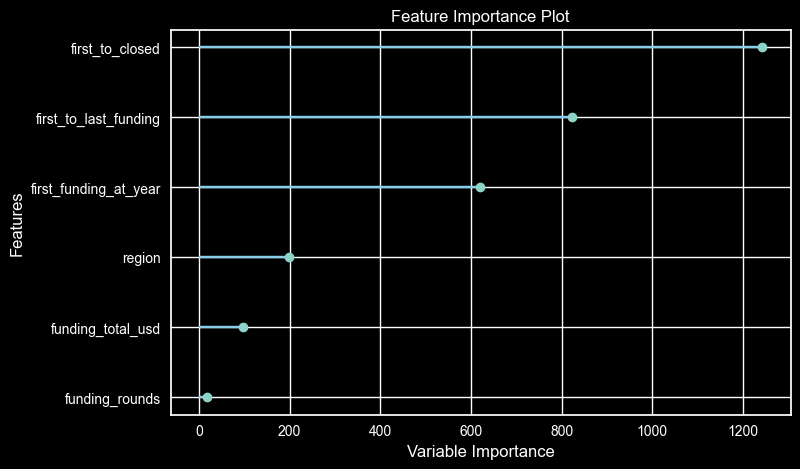

In [217]:
plot_model(best_model,'feature')

Поробуем вернуть все признаки и посмотреть на результат.

In [226]:
experement_all = setup(train_2_years, target = target, train_size = 0.8, fold=20,
                    categorical_imputation = 'unknown',session_id=S,verbose=False)
best_model_all = experement_all.compare_models(sort='F1',include=['lightgbm','rf','xgboost'])

Ухудшились метрики и просела скрорость обучения. Значит первый варивнт будет более оптимальным.

Теперь попробуем добавить заполнение пропусков в числовых переменных значением -1 и посомтрим на результат.

In [229]:
experement = setup(train_2_years[final_cols],target = target, train_size = 0.8, fold=20,
                    categorical_imputation = 'unknown',session_id=S,verbose=False,
                    numeric_imputation = -1)

best_model = experement.compare_models(sort='F1',include=['lightgbm','rf','xgboost'])

Результат не изменился, попробуем итеративное заполнение.

Результат не изменился.

Лучшей получилась модель на базе Light Gradient Boosting Machine c метрикой F1 = 0.9845.

### Создание и сохранение финальной модели.

In [234]:
experement = setup(train[final_cols], target = target, train_size = 0.8, fold=20,
                    categorical_imputation = 'unknown', session_id=S, verbose=False)

best_model = experement.compare_models(sort='F1',include=['lightgbm','rf','xgboost'])

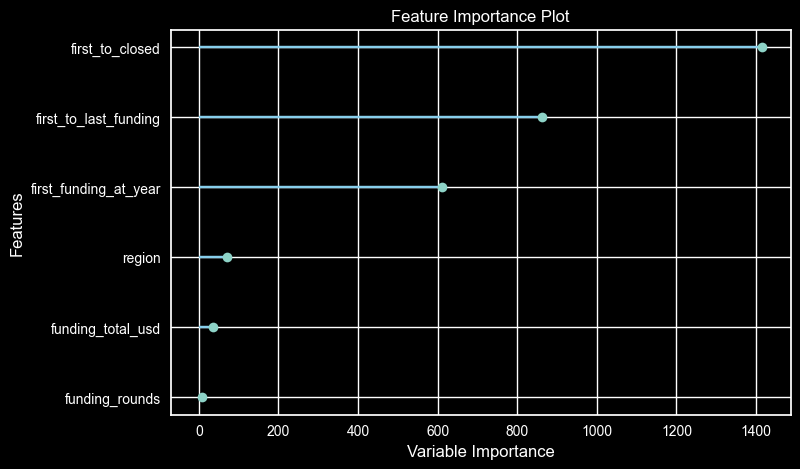

In [242]:
plot_model(best_model, 'feature')

In [235]:
final_model = experement.finalize_model(best_model)

In [237]:
final_model

Pipeline(memory=Memory(location=None),
         steps=[('numerical_imputer',
                 TransformerWrapper(exclude=None,
                                    include=['funding_total_usd',
                                             'funding_rounds',
                                             'first_to_closed',
                                             'first_to_last_funding',
                                             'first_funding_at_year'],
                                    transformer=SimpleImputer(add_indicator=False,
                                                              copy=True,
                                                              fill_value=None,
                                                              keep_empty_features=False,
                                                              missing_values=nan,
                                                              strategy='mean',
                                                              verbos...
                 LGBMClassifier(boosting_type='gbdt', class_weight=None,
                                colsample_bytree=1.0, importance_type='split',
                                learning_rate=0.1, max_depth=-1,
                                min_child_samples=20, min_child_weight=0.001,
                                min_split_gain=0.0, n_estimators=100, n_jobs=-1,
                                num_leaves=31, objective=None,
                                random_state=100500, reg_alpha=0.0,
                                reg_lambda=0.0, subsample=1.0,
                                subsample_for_bin=200000, subsample_freq=0))],
         verbose=False)

Полная структура финального pipeline

```python
[('numerical_imputer',
  TransformerWrapper(exclude=None,
                     include=['funding_total_usd', 'funding_rounds',
                              'first_to_closed', 'first_to_last_funding',
                              'first_funding_at_year'],
                     transformer=SimpleImputer(add_indicator=False, copy=True,
                                               fill_value=None,
                                               keep_empty_features=False,
                                               missing_values=nan,
                                               strategy='mean',
                                               verbose='deprecated'))),
 ('categorical_imputer',
  TransformerWrapper(exclude=None, include=['region'],
                     transformer=SimpleImputer(add_indicator=False, copy=True,
                                               fill_value='unknown',
                                               keep_empty_features=False,
                                               missing_values=nan,
                                               strategy='constant',
                                               verbose='deprecated'))),
 ('rest_encoding',
  TransformerWrapper(exclude=None, include=['region'],
                     transformer=TargetEncoder(cols=['region'],
                                               drop_invariant=False,
                                               handle_missing='return_nan',
                                               handle_unknown='value',
                                               hierarchy=None,
                                               min_samples_leaf=20,
                                               return_df=True, smoothing=10,
                                               verbose=0))),
 ('actual_estimator',
  LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
                 importance_type='split', learning_rate=0.1, max_depth=-1,
                 min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
                 n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
                 random_state=100500, reg_alpha=0.0, reg_lambda=0.0,
                 subsample=1.0, subsample_for_bin=200000, subsample_freq=0))]
```

In [238]:
experement.save_experiment('final_experement')
experement.save_model(final_model,'final_model')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['funding_total_usd',
                                              'funding_rounds',
                                              'first_to_closed',
                                              'first_to_last_funding',
                                              'first_funding_at_year'],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               copy=True,
                                                               fill_value=None,
                                                               keep_empty_features=False,
                                                               missing_values=nan,
                                                               strategy='mean',
                                        

## Проверка на тестовых данных

In [245]:
final_cols = ['funding_total_usd',
                'funding_rounds',
                'first_to_closed',
                'first_to_last_funding',
                'first_funding_at_year',
                'region']

F1 score:  0.9996
              precision    recall  f1-score   support

      closed       1.00      1.00      1.00      1234
   operating       1.00      1.00      1.00     11977

    accuracy                           1.00     13211
   macro avg       1.00      1.00      1.00     13211
weighted avg       1.00      1.00      1.00     13211



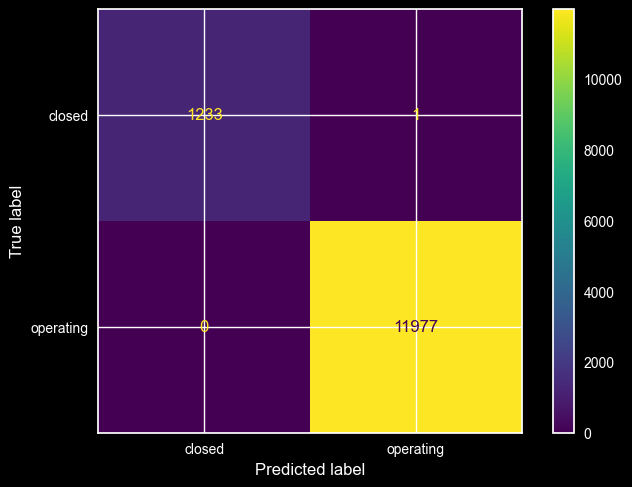

In [246]:
# plt.style.use('dark_background')

predict = final_model.predict(X_test[final_cols])
pred = np.where(predict==1, 'closed', 'operating').tolist()
print('F1 score: ',round(f1_score(y_test[target], pred, pos_label='closed'),4))
print(classification_report(y_test[target], pred))
ConfusionMatrixDisplay.from_predictions(y_test[target], pred)

# Финальный отчёт

## Анализ данных

### Обзор данных и предобработка

Исходный набор данных содержит информацию о стартапах, включая название, категорию, общую сумму финансирования, статус (закрыт или действующий), местоположение (страна, штат, регион, город), количество раундов финансирования и даты (основания, первого и последнего финансирования, закрытия).

Первичный анализ данных выявил следующие особенности:

* **Пропуски:** Присутствуют во всех колонках, кроме статуса (целевой признак), даты последнего финансирования и даты основания. Большая часть пропусков в дате закрытия связана с действующими стартапами.
* **Выбросы:** Обнаружены некорректные даты в будущем, которые были скорректированы вручную.
* **Дисбаланс классов:** Наблюдается сильный дисбаланс между закрытыми и действующими стартапами (примерно 1 к 10).

### Исследовательский анализ данных (EDA)

**Числовые признаки:**

* **Количество раундов финансирования и общая сумма финансирования:** Анализ показал, что доля закрытых стартапов уменьшается с увеличением количества раундов финансирования. Общая сумма финансирования растёт с каждым раундом у рабочих проектов и перестаёт расти после 5-го раунда у закрытых проектов.
* **Размер финансирования:** Наблюдается большой разброс в данных, что требует применения методов масштабирования при обучении модели.

**Категориальные признаки:**

* **Список категорий:** Анализ выявил категории с высокой и низкой долей закрытых стартапов, что указывает на важность этого признака для прогнозирования.
* **Страна, штат, регион, город:** Эти признаки также важны для обучения, но требуют фильтрации редких значений для повышения эффективности модели.

**Признаки с датами:**

* **Обработка некорректных дат:** Даты в будущем были скорректированы вручную.
* **Пропуски в датах:** Пропуски в дате первого финансирования были заполнены с помощью интерполяции, а пропуски в дате закрытия - датой выгрузки данных.
* **Генерация новых признаков:** Были созданы признаки, отражающие разницу между различными датами, например, срок жизни стартапа (lifetime).

**Анализ корреляций:**

* Выявлена сильная корреляция между признаками даты и географии, а также между признаками и целевой переменной.

## Методология

Для подготовки данных к обучению модели была проведена предобработка, включающая:

* **Обработку пропусков:** Пропуски в числовых признаках были заполнены средними значениями, а в категориальных - специальным значением "unknown".
* **Кодирование категориальных признаков:** Для кодирования категориальных признаков, таких как список категорий и регион, был использован метод TargetEncoder, учитывающий связь признака с целевой переменной.
* **Масштабирование числовых признаков:** Учитывая большой разброс в данных, вероятно, было применено масштабирование для нормализации числовых признаков (добавьте информацию о методе масштабирования, если он применялся).

В качестве основной модели был выбран LightGBM из-за его эффективности и скорости работы с большими наборами данных. Гиперпараметры модели были оптимизированы с помощью встроенной оптимизации в Pycaret. Для оценки обобщающей способности модели была использована кросс-валидация.

В качестве основной метрики оценки эффективности модели была выбрана F1-мера, учитывающая баланс между точностью и полнотой. Также были проанализированы точность и полнота для более полного анализа модели.

## Результаты

### Анализ важности признаков

Анализ важности признаков показал, что наиболее сильное влияние на прогнозирование закрытия стартапов оказывают следующие факторы:

* **Количество дней между первым раундом финансирования и датой получения последней информации (first\_to\_closed):** Этот признак имеет наибольшую важность, что указывает на значимость устойчивого финансирования и продолжительности существования стартапа для его успеха.
* **Количество дней между первым и последним раундом финансирования (first\_to\_last\_funding):** Этот признак отражает темпы развития стартапа и может указывать на важность своевременного привлечения инвестиций.
* **Год первого финансирования (first\_funding\_at\_year):** Этот признак может отражать влияние экономических циклов или технологических трендов на успех стартапов.
* **Регион (region):** Географическое положение стартапа может играть роль из-за различий в инвестиционном климате, доступности ресурсов и уровне конкуренции.

### Эффективность модели на разных временных периодах

Модель была протестирована на данных из разных временных периодов, чтобы оценить её стабильность и надежность. Результаты показали, что F1-мера оставалась высокой на всех временных периодах, что свидетельствует о хорошей обобщающей способности модели.

### Эффективность модели для различных категорий lifetime

Особое внимание было уделено анализу эффективности модели для стартапов с разным сроком жизни (lifetime), где lifetime определяется как количество дней между первым раундом финансирования и датой получения последней информации. Модель показала высокую эффективность для стартапов с lifetime более 2 лет, достигнув F1-меры 0.9845.

### Описание финальной модели

Финальная модель представляет собой LightGBM с отобранными признаками (funding\_total\_usd, funding\_rounds, first\_to\_closed, first\_to\_last\_funding, first\_funding\_at\_year, region) и оптимизированными гиперпараметрами. Pipeline модели включает обработку пропусков, кодирование категориальных признаков с помощью TargetEncoder и обучение модели LightGBM.

## Выводы

В данном исследовании была разработана модель машинного обучения на основе LightGBM для прогнозирования закрытия стартапов. Модель продемонстрировала высокую эффективность, особенно для стартапов с lifetime более 2 лет, достигнув F1-меры 0.9845.

Анализ важности признаков выявил, что ключевыми факторами, влияющими на успех стартапа, являются устойчивое финансирование, темпы развития, год первого финансирования и регион. Модель оставалась стабильной и надежной на разных временных периодах, что подтверждает её обобщающую способность.

Результаты исследования могут быть использованы инвесторами и предпринимателями для оценки рисков и принятия обоснованных решений. Фокус на стартапах с lifetime более 2 лет делает модель особенно ценной для анализа долгосрочного потенциала.

В качестве направлений для дальнейшей работы можно рассмотреть:
- Использование дополнительных данных, особенно добавление последних актуальных данных (недостающих данных за 2016-2017 год, а так же новых данных после 2018 г.)
- Исследование других моделей машинного обучения и методов ансамблирования.
- Преобразование датасета с дублированием строк долгоживущих стартапов с указанием разного lifetime.
- Рассмотреть задачу как задачу временных рядов ("Сколько проживёт стартап?","Закроется-ли стартап в течении следующих 3-х лет?")